In [ ]:
# Install necessary packages
install.packages("corrplot")
install.packages("ggplot2")
install.packages("reshape2")
install.packages("kohonen")

# Load the installed packages
library(corrplot)
library(ggplot2)
library(reshape2)
library(kohonen)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



In [ ]:
# Colour for plots
coolBlueHotRed <- function(n, alpha = 1) {
  rainbow(n, end=4/6, alpha=alpha)[n:1]
}

In [ ]:
# this function is to plot the heatmap of a variable

plotHeatMap <- function(som_model, data, variable=0){
  # Plot a heatmap for any variable from the data set "data".
  # If variable is 0, an interactive window will be provided to choose the variable.
  # If not, the variable in "variable" will be plotted.

  require(dummies)
  require(kohonen)
  source('coolBlueHotRed.R')

  interactive <- TRUE

  while (interactive == TRUE){

    if (variable == 0){
      #show interactive window.
      color_by_var <- select.list(names(data), multiple=FALSE,
                                  graphics=TRUE,
                                  title="Choose variable to color map by.")
      # check for user finished.
      if (color_by_var == ""){ # if user presses Cancel - we quit function
        return(TRUE)
      }
      interactive <- TRUE
      color_variable <- data.frame(data[, color_by_var])

    } else {
      color_variable <- data.frame(data[, variable])
      color_by_var <- names(data)[variable]
      interactive <- FALSE
    }

    #if the variable chosen is a string or factor -
    #Get the levels and ask the user to choose which one they'd like.

    if (class(color_variable[,1]) %in% c("character", "factor", "logical")){
      #want to spread this out into dummy factors - but colour by one of those.
      temp_data <- dummy.data.frame(color_variable, sep="_")
      chosen_factor <- select.list(names(temp_data),
                                   multiple=FALSE,
                                   graphics=TRUE,
                                   title="Choose level of variable for colouring")
      color_variable <- temp_data[, chosen_factor]
      rm(temp_data, chosen_factor)
      color_by <- color_variable
    } else {
      #impute the missing values with the mean.
      color_variable[is.na(color_variable[,1]),1] <- mean(color_variable[,1], na.rm=TRUE)
      #color_by <- capVector(color_variable[,1])
      #color_by <- scale(color_by)
      color_by <- color_variable[,1]
    }
    unit_colors <- aggregate(color_by, by=list(som_model$unit.classif), FUN=mean, simplify=TRUE)
    plot(som_model, type = "property", property=unit_colors[,2], main=color_by_var, palette.name=coolBlueHotRed)
  }
}

In [ ]:
df <- read.csv('/content/annual_aqi_by_county_2020.csv')
head(df)

State   County    Year Days.with.AQI Good.Days Moderate.Days
1 Alabama Baldwin   2020 269           250        19          
2 Alabama Clay      2020 108            99         9          
3 Alabama DeKalb    2020 364           350        14          
4 Alabama Elmore    2020 197           197         0          
5 Alabama Etowah    2020 278           260        18          
6 Alabama Jefferson 2020 366           212       151          
  Unhealthy.for.Sensitive.Groups.Days Unhealthy.Days Very.Unhealthy.Days
1 0                                   0              0                  
2 0                                   0              0                  
3 0                                   0              0                  
4 0                                   0              0                  
5 0                                   0              0                  
6 3                                   0              0                  
  Hazardous.Days Max.AQI X90th.Percentile.AQI Median.AQI Days.CO Days.NO2
1 0               74     49                   36         0       0       
2 0               86     49                   26         0       0       
3 0               90     45                   36         0       0       
4 0               47     41                   31         0       0       
5 0               92     46                   34         0       0       
6 0              129     67                   48         0       2       
  Days.Ozone Days.PM2.5 Days.PM10
1 198         71        0        
2   0        108        0        
3 331         33        0        
4 197          0        0        
5 204         74        0        
6 123        241        0

In [ ]:
# check for missing values
any_missing <- any(is.na(df))
any_missing # none found

[1] FALSE

In [ ]:
summary(df)

    State              County               Year      Days.with.AQI  
 Length:1003        Length:1003        Min.   :2020   Min.   : 17.0  
 Class :character   Class :character   1st Qu.:2020   1st Qu.:332.0  
 Mode  :character   Mode  :character   Median :2020   Median :363.0  
                                       Mean   :2020   Mean   :323.4  
                                       3rd Qu.:2020   3rd Qu.:366.0  
                                       Max.   :2020   Max.   :366.0  
   Good.Days     Moderate.Days    Unhealthy.for.Sensitive.Groups.Days
 Min.   :  1.0   Min.   :  0.00   Min.   :  0.000                    
 1st Qu.:242.0   1st Qu.: 12.00   1st Qu.:  0.000                    
 Median :302.0   Median : 32.00   Median :  0.000                    
 Mean   :275.9   Mean   : 42.87   Mean   :  2.748                    
 3rd Qu.:330.0   3rd Qu.: 62.00   3rd Qu.:  2.000                    
 Max.   :365.0   Max.   :257.00   Max.   :103.000                    
 Unhealthy.Days   Ve

In [ ]:
str(df)

'data.frame':	1003 obs. of  18 variables:
 $ State                              : chr  "Alabama" "Alabama" "Alabama" "Alabama" ...
 $ County                             : chr  "Baldwin" "Clay" "DeKalb" "Elmore" ...
 $ Year                               : int  2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 ...
 $ Days.with.AQI                      : int  269 108 364 197 278 366 90 364 348 361 ...
 $ Good.Days                          : int  250 99 350 197 260 212 87 307 256 162 ...
 $ Moderate.Days                      : int  19 9 14 0 18 151 3 57 92 197 ...
 $ Unhealthy.for.Sensitive.Groups.Days: int  0 0 0 0 0 3 0 0 0 2 ...
 $ Unhealthy.Days                     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Very.Unhealthy.Days                : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Hazardous.Days                     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Max.AQI                            : int  74 86 90 47 92 129 75 88 75 116 ...
 $ X90th.Percentile.AQI               : int  49 49 45 41 46 67 36 54 58 66 .

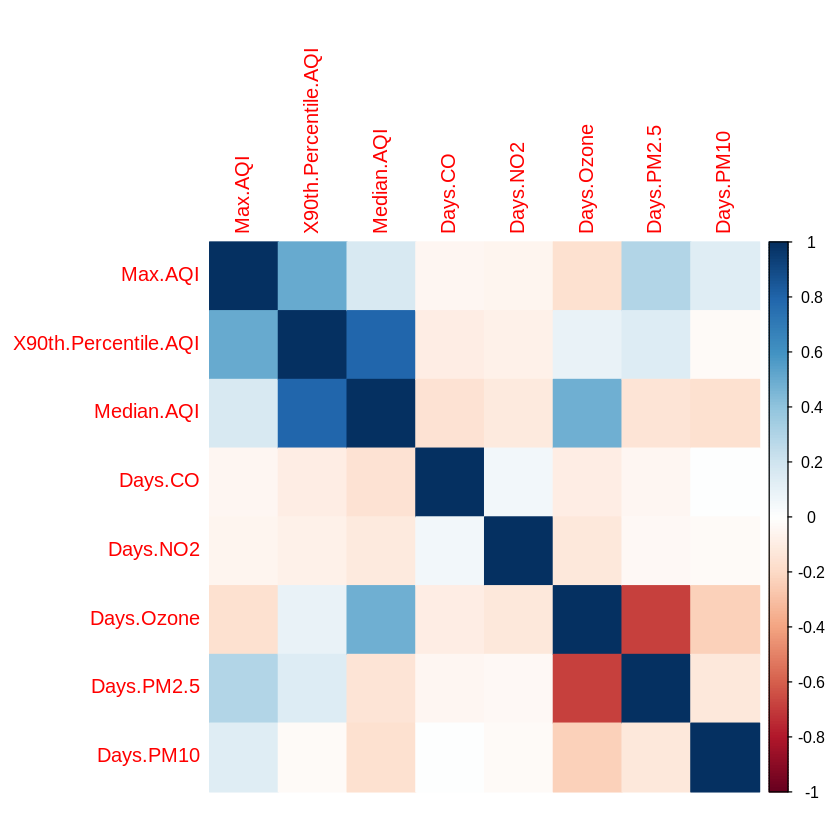

In [ ]:
#Select column of interest -> related to air pollution
columns_of_interest <- c("Max.AQI", "X90th.Percentile.AQI", "Median.AQI", "Days.CO", "Days.NO2", "Days.Ozone", "Days.PM2.5", "Days.PM10")

# Extract the relevant columns
correlation_matrix <- cor(df[, columns_of_interest])

# Create the correlation plot
corrplot(correlation_matrix, method = "color")

In [ ]:
# Select columns of interest related to air pollution
columns_of_interest <- c("Max.AQI", "X90th.Percentile.AQI", "Median.AQI", "Days.CO", "Days.NO2", "Days.Ozone", "Days.PM2.5", "Days.PM10")

# Calculate correlation matrix for selected columns
correlation_matrix <- cor(df[, columns_of_interest])

# Extract correlations with respect to PM2.5
correlation_with_pm25 <- correlation_matrix["Days.PM2.5", ]

# Convert the correlation values to a named vector
correlation_list <- as.list(correlation_with_pm25)

# Print the correlation values without '$' and '[1]'
for (attr_name in names(correlation_list)) {
  cat(attr_name, ": ", correlation_list[[attr_name]], "\n", sep = "")
}

Max.AQI: 0.2910137
X90th.Percentile.AQI: 0.1430484
Median.AQI: -0.1446719
Days.CO: -0.04869911
Days.NO2: -0.03412626
Days.Ozone: -0.6835165
Days.PM2.5: 1
Days.PM10: -0.12412


Based on the above correlation map and values, the top 5 attributes with highest correlation to Days.PM2.5 are

**Max.AQI, X90th.Percentile.AQI, Median.AQI, Days.Ozone
and Days.PM10.**

# Air Pollution vs States


In [ ]:
# Calculate the highest AQI, median AQI, and 90th percentile AQI for each state
aqi_stats_by_state <- aggregate(. ~ State, data = df[, c("State", "Max.AQI", "Median.AQI", "X90th.Percentile.AQI")], FUN = max)

# Sort the result by highest to lowest 90th percentile
aqi_stats_by_state <- aqi_stats_by_state[order(-aqi_stats_by_state$X90th.Percentile.AQI), ]

# Print the highest AQI, median AQI, and 90th percentile AQI for each state
print(aqi_stats_by_state)

                  State Max.AQI Median.AQI X90th.Percentile.AQI
3               Arizona    1124        112                  215
5            California    1928         93                  199
8     Country Of Mexico     176        115                  156
39               Oregon     679         41                  124
2                Alaska     170         33                  106
30               Nevada     331         61                   93
6              Colorado     238         50                   90
46                Texas     192         55                   89
33           New Mexico     400         54                   88
47                 Utah     194         50                   87
15             Illinois     185         53                   84
28              Montana     327         47                   83
7           Connecticut     174         44                   80
14                Idaho     384         40                   77
51           Washington     908         

In [ ]:
# Calculate the sum of days with Ozone for each state
sum_days_by_state <- aggregate(Days.Ozone ~ State, data = df, FUN = sum)

# Sort the result by the total sum of Days.Ozone in descending order
sorted_sum_days <- sum_days_by_state[order(-sum_days_by_state$Days.Ozone), ]

# Print the result sorted by the total sum
print(sorted_sum_days)

                  State Days.Ozone
5            California      10917
40         Pennsylvania       9255
46                Texas       8996
11              Florida       8336
16              Indiana       7641
37                 Ohio       7479
34             New York       6992
35       North Carolina       6972
19             Kentucky       5962
24             Michigan       5778
6              Colorado       5703
50             Virginia       5636
53            Wisconsin       5234
20            Louisiana       4692
15             Illinois       4420
54              Wyoming       4303
47                 Utah       4043
27             Missouri       3820
38             Oklahoma       3816
22             Maryland       3698
12              Georgia       3601
45            Tennessee       3520
32           New Jersey       3321
23        Massachusetts       3258
25            Minnesota       3028
33           New Mexico       2907
3               Arizona       2895
36         North Dak

In [ ]:
# Calculate the sum of days with PM2.5, and PM10 for each state
sum_days_by_pollutant <- aggregate(. ~ State, data = df[, c("State","Days.PM2.5", "Days.PM10")], FUN = sum)

# Calculate the total sum for each state
total_sum <- rowSums(sum_days_by_pollutant[, c("Days.PM2.5", "Days.PM10")])

# Sort the result by the total sum in descending order
sum_days_by_pollutant <- sum_days_by_pollutant[order(-total_sum), ]

# Print the result sorted by the total sum
print(sum_days_by_pollutant)

                  State Days.PM2.5 Days.PM10
51           Washington       9049       365
5            California       7506       689
39               Oregon       7001       109
46                Texas       5944        41
14                Idaho       5734       198
11              Florida       4950       438
40         Pennsylvania       4860        57
12              Georgia       4780        15
37                 Ohio       3883       345
45            Tennessee       4227         0
35       North Carolina       3882       241
25            Minnesota       3707       154
28              Montana       3325       333
16              Indiana       3587        26
15             Illinois       3102        39
17                 Iowa       2681       246
53            Wisconsin       2814         6
34             New York       2545         0
20            Louisiana       2353        23
27             Missouri       1873       395
6              Colorado       1136      1082
38        

In [ ]:
# Calculate the sum of hazardous days for each state
hazardous_days <- aggregate(Hazardous.Days ~ State, data = df, FUN = sum)

# Filter states with hazardous days
hazardous_states <- hazardous_days[hazardous_days$Hazardous.Days > 0, ]

# Sort by the number of hazardous days in descending order
hazardous_states <- hazardous_states[order(-hazardous_states$Hazardous.Days), ]

# Print the result
print(hazardous_states)

         State Hazardous.Days
39      Oregon             83
5   California             53
51  Washington             43
14       Idaho              5
3      Arizona              3
33  New Mexico              3
41 Puerto Rico              2
28     Montana              1
30      Nevada              1
54     Wyoming              1


In [ ]:
# Calculate the sum of Very.Unhealthy.Days for each state
very_unhealthy_days <- aggregate(Very.Unhealthy.Days ~ State, data = df, FUN = sum)

# Filter states with Very.Unhealthy.Days
very_unhealthy_states <- very_unhealthy_days[very_unhealthy_days$Very.Unhealthy.Days > 0, ]

# Sort by the number of Very.Unhealthy.Days in descending order
very_unhealthy_states <- very_unhealthy_states[order(-very_unhealthy_states$Very.Unhealthy.Days), ]

# Print the result
print(very_unhealthy_states)

         State Very.Unhealthy.Days
5   California                 109
3      Arizona                  75
51  Washington                  69
39      Oregon                  40
14       Idaho                  13
28     Montana                   4
30      Nevada                   4
33  New Mexico                   2
6     Colorado                   1
41 Puerto Rico                   1
54     Wyoming                   1


In [ ]:
# Calculate the sum of Unhealthy.Days for each state
unhealthy_days <- aggregate(Unhealthy.Days ~ State, data = df, FUN = sum)

# Filter states with Unhealthy.Days
unhealthy_states <- unhealthy_days[unhealthy_days$Unhealthy.Days > 0, ]

# Sort by the number of Unhealthy.Days in descending order
unhealthy_states <- unhealthy_states[order(-unhealthy_states$Unhealthy.Days), ]

# Print the result
print(unhealthy_states)

                  State Unhealthy.Days
5            California            753
51           Washington            110
39               Oregon             91
3               Arizona             76
14                Idaho             68
28              Montana             43
30               Nevada             37
46                Texas             23
2                Alaska             20
8     Country Of Mexico             20
6              Colorado             17
54              Wyoming             15
15             Illinois              8
41          Puerto Rico              8
47                 Utah              8
24             Michigan              7
11              Florida              6
53            Wisconsin              6
16              Indiana              5
7           Connecticut              4
33           New Mexico              4
17                 Iowa              3
37                 Ohio              3
18               Kansas              2
25            Minnesota  

In [ ]:
# Calculate the sum of Unhealthy.for.Sensitive.Groups.Days for each state
unhealthy_sensitive_days <- aggregate(Unhealthy.for.Sensitive.Groups.Days ~ State, data = df, FUN = sum)

# Filter states with Unhealthy.for.Sensitive.Groups.Days
unhealthy_sensitive_states <- unhealthy_sensitive_days[unhealthy_sensitive_days$Unhealthy.for.Sensitive.Groups.Days > 0, ]

# Sort by the number of Unhealthy.for.Sensitive.Groups.Days in descending order
unhealthy_sensitive_states <- unhealthy_sensitive_states[order(-unhealthy_sensitive_states$Unhealthy.for.Sensitive.Groups.Days), ]

# Print the result
print(unhealthy_sensitive_states)

               State Unhealthy.for.Sensitive.Groups.Days
5         California                                1152
3            Arizona                                 170
6           Colorado                                 162
46             Texas                                 120
24          Michigan                                  94
14             Idaho                                  73
39            Oregon                                  69
47              Utah                                  67
53         Wisconsin                                  64
30            Nevada                                  63
15          Illinois                                  62
37              Ohio                                  60
28           Montana                                  52
54           Wyoming                                  52
33        New Mexico                                  46
51        Washington                                  44
40      Pennsylvania           

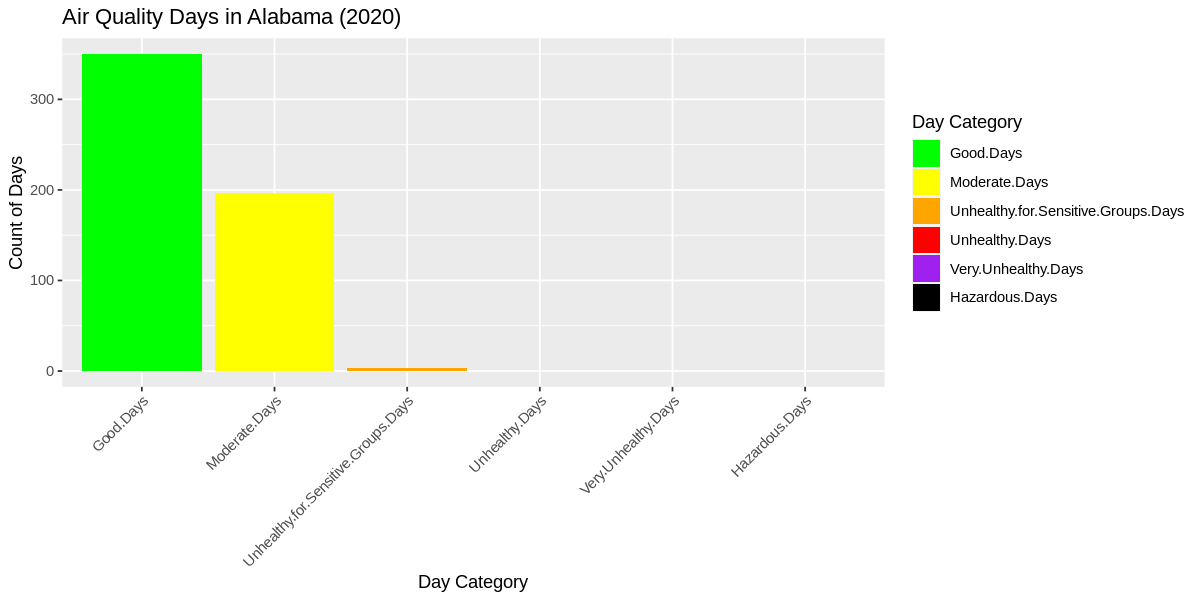

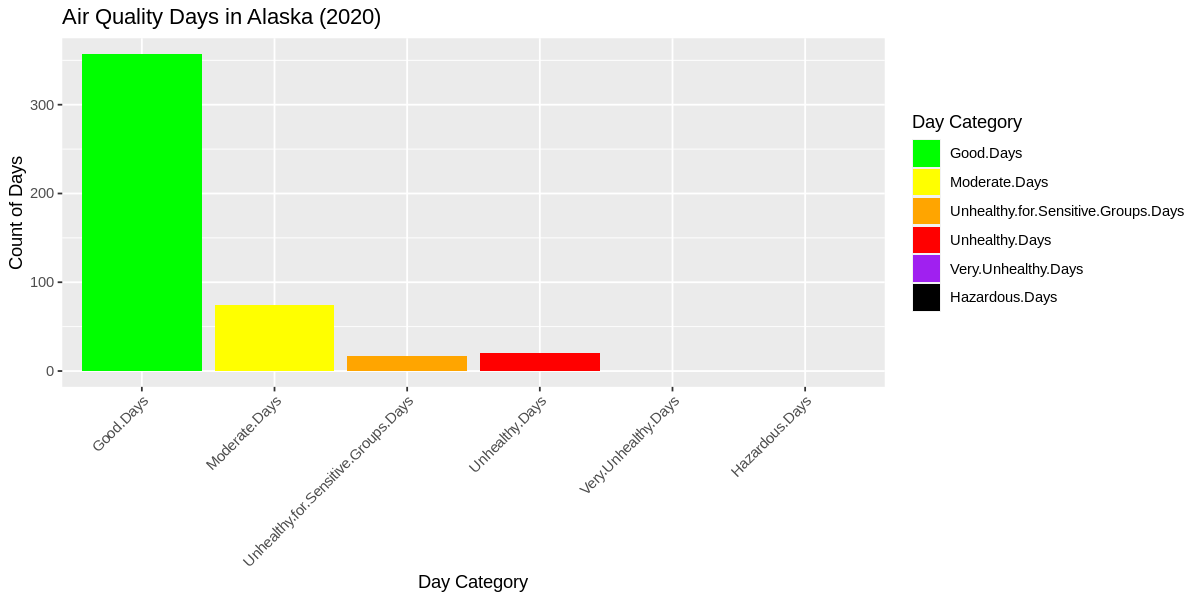

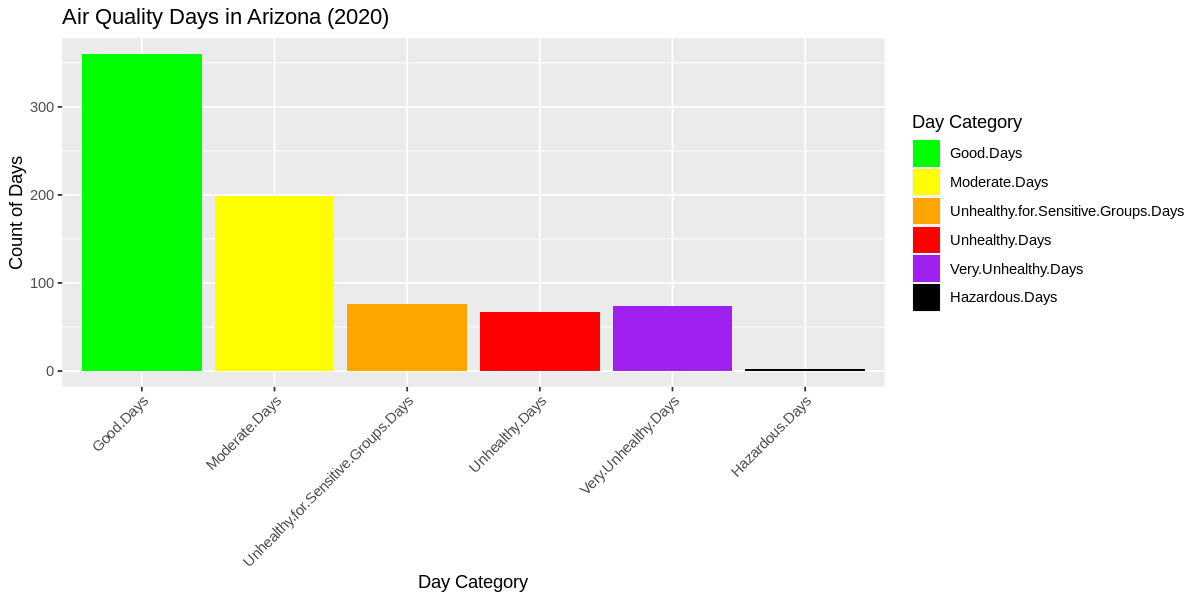

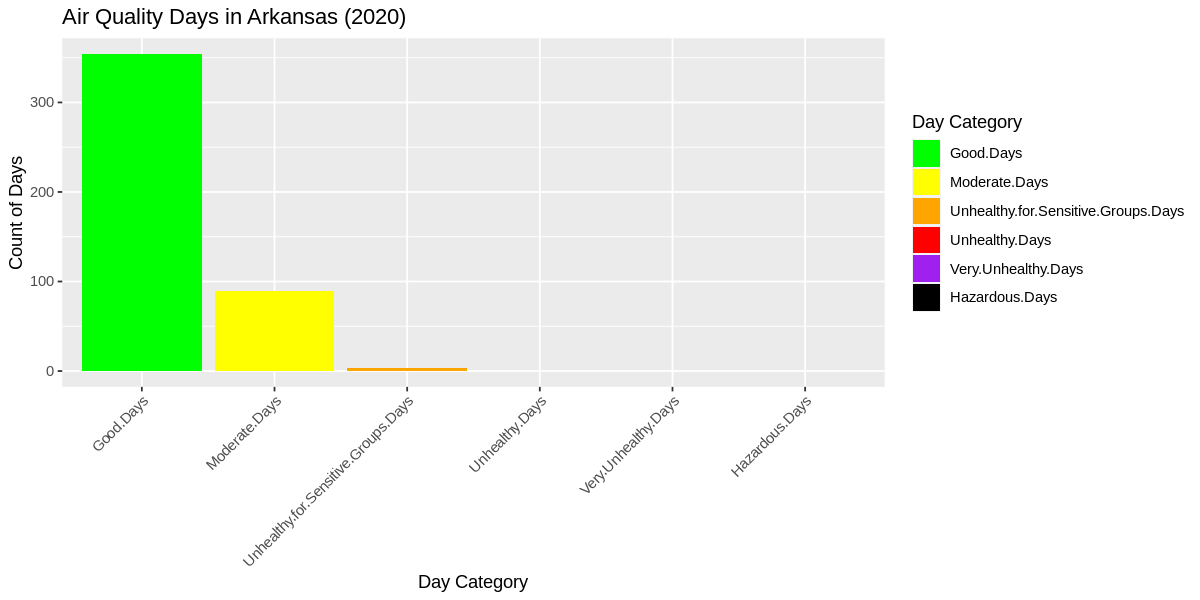

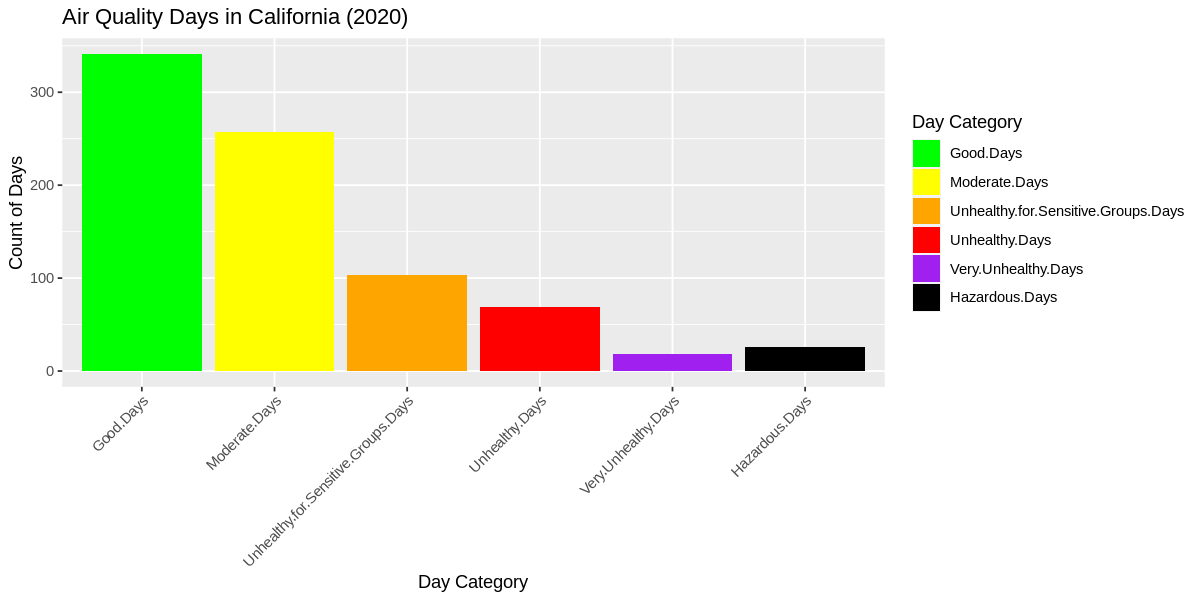

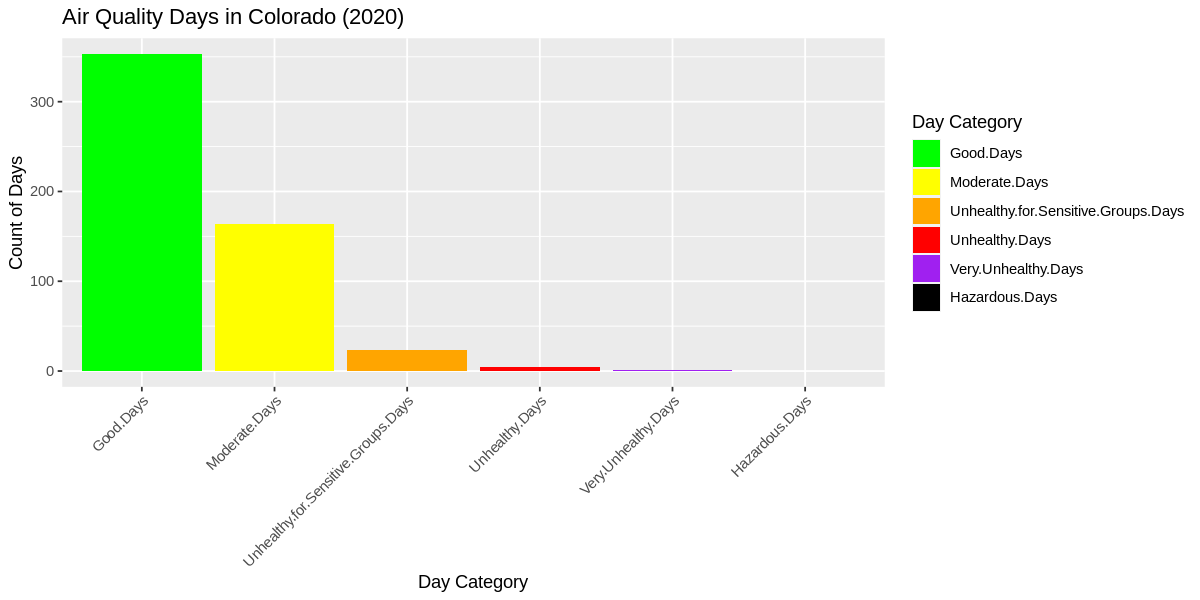

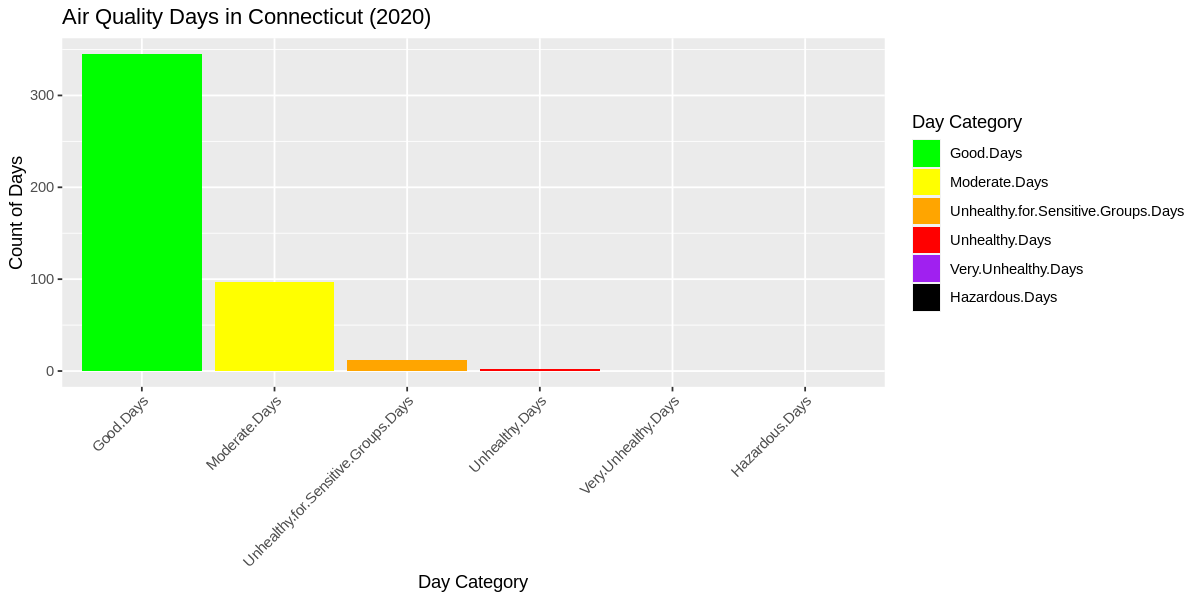

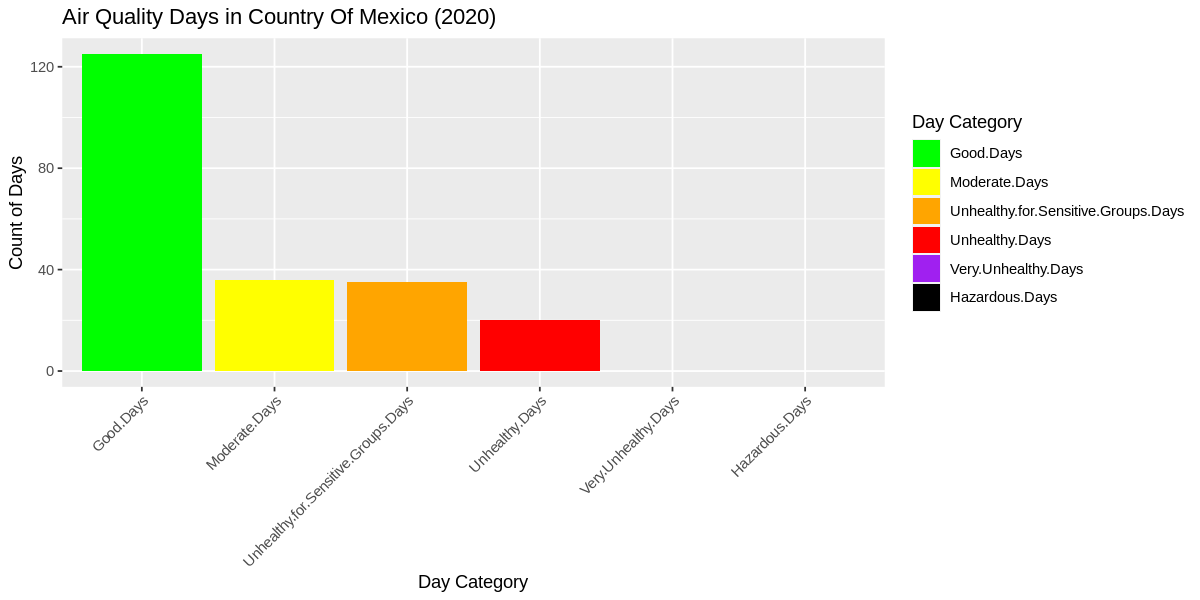

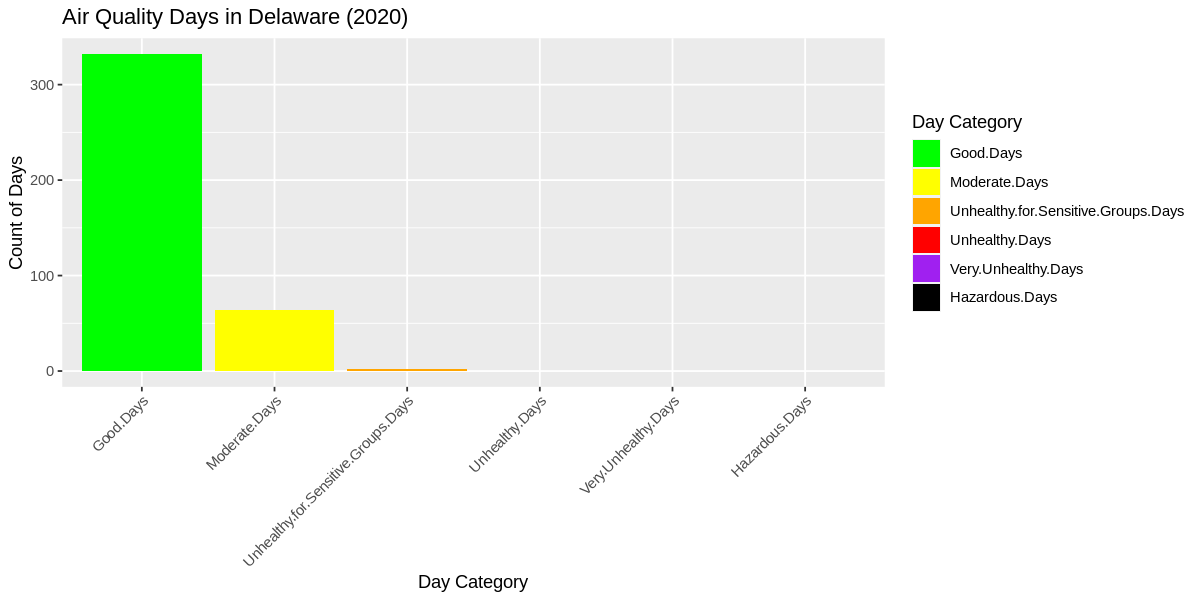

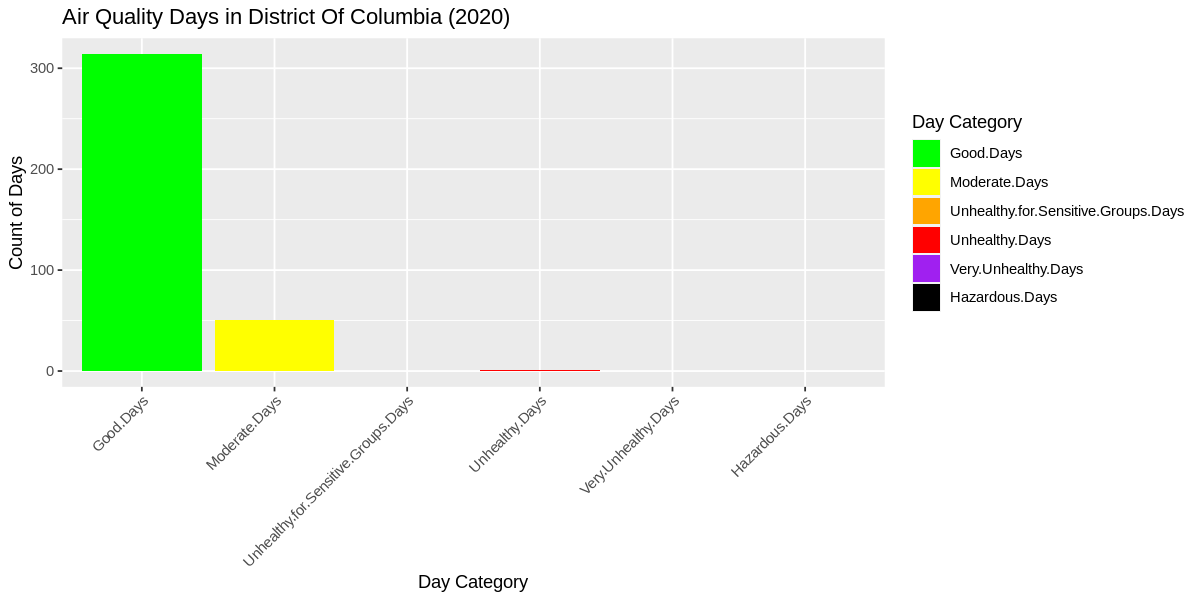

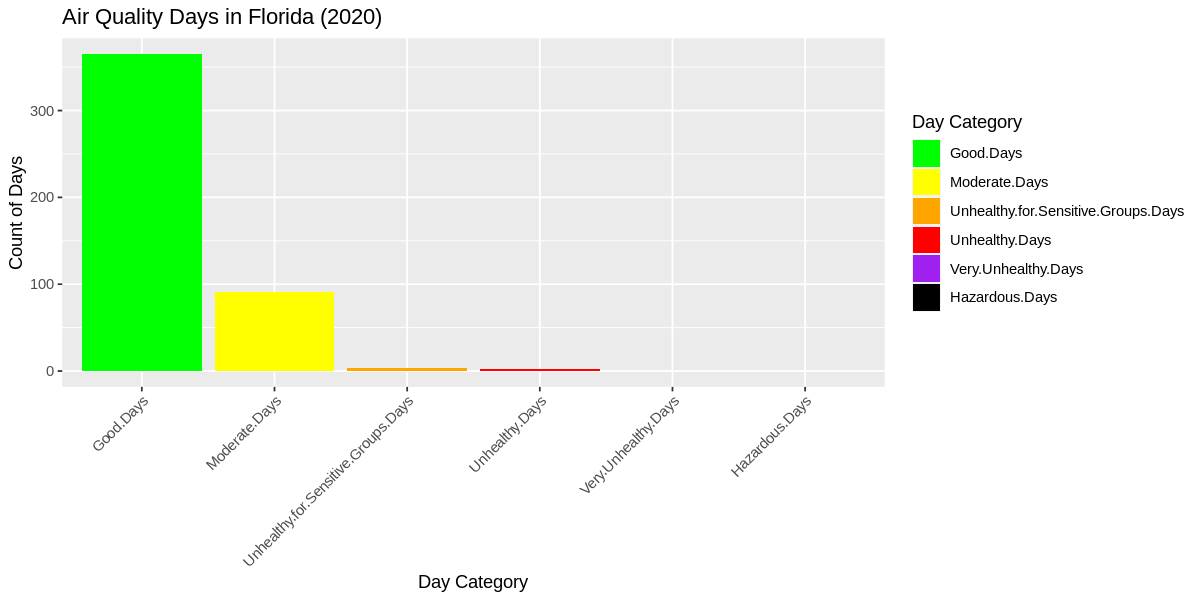

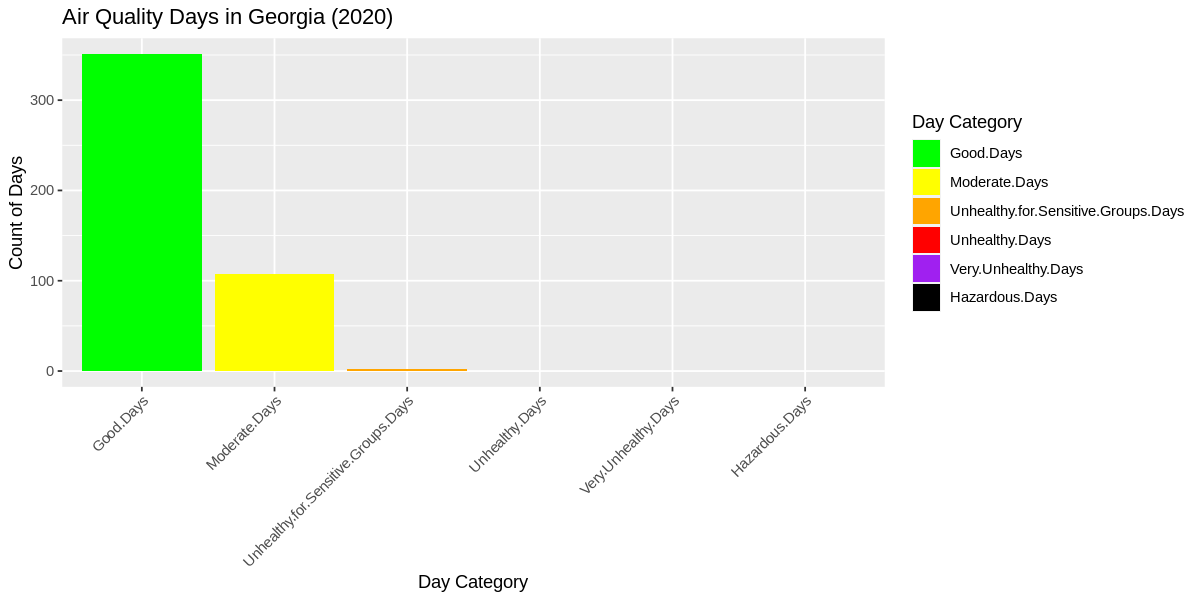

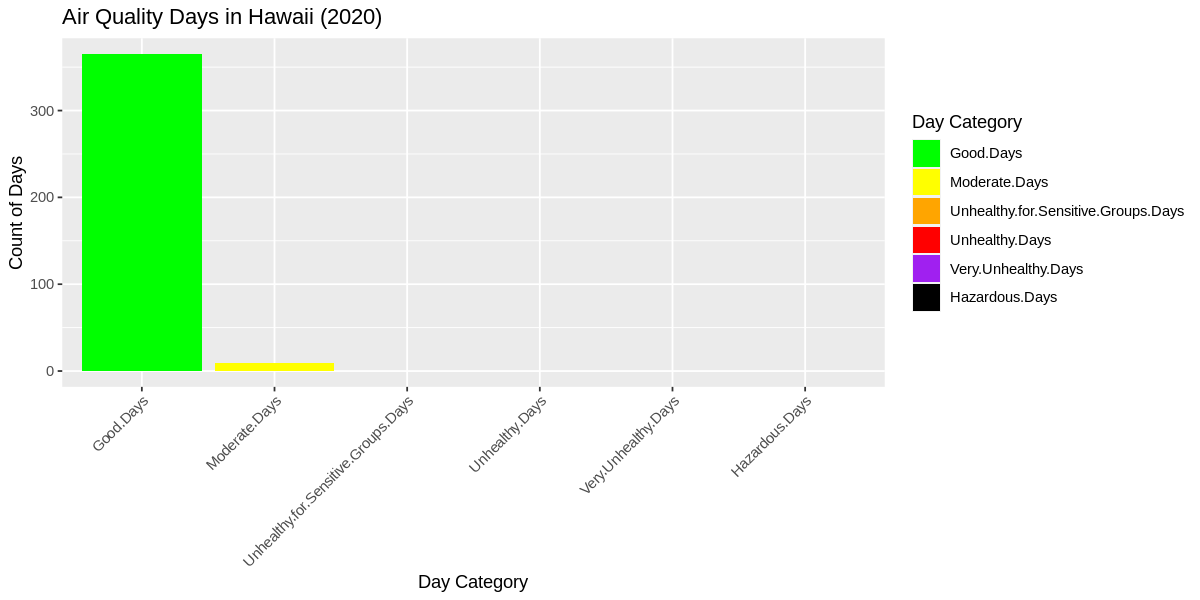

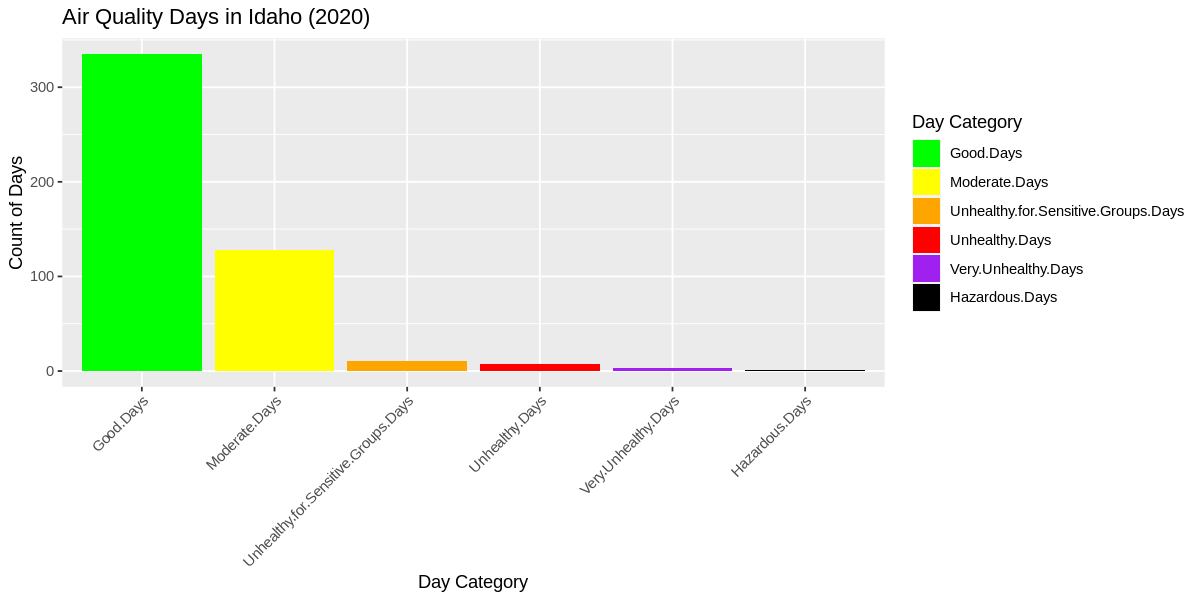

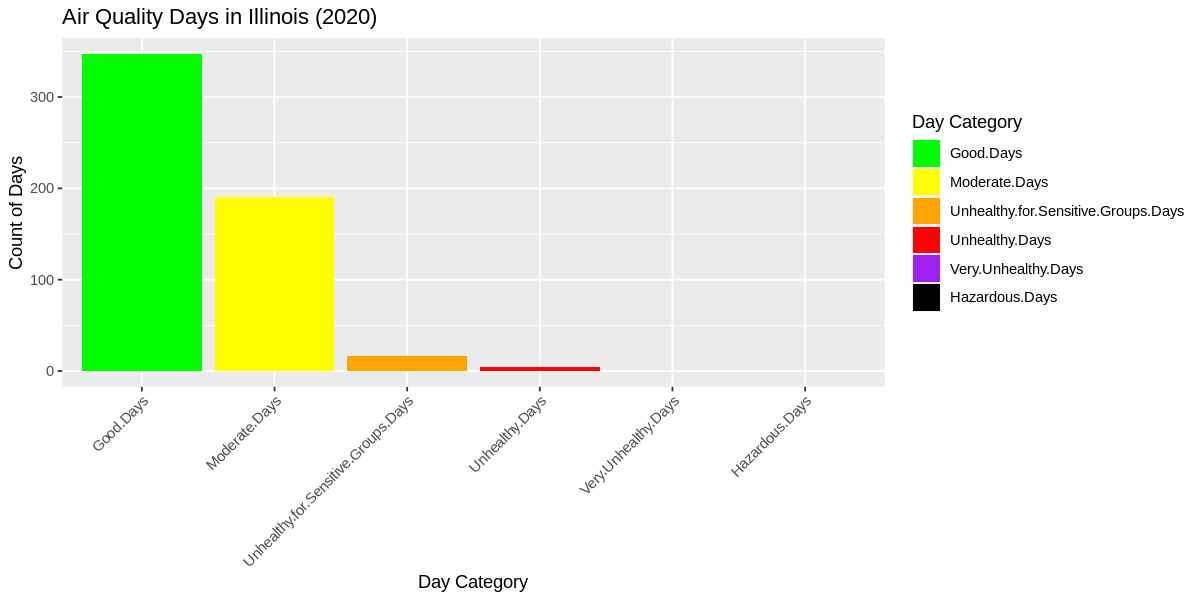

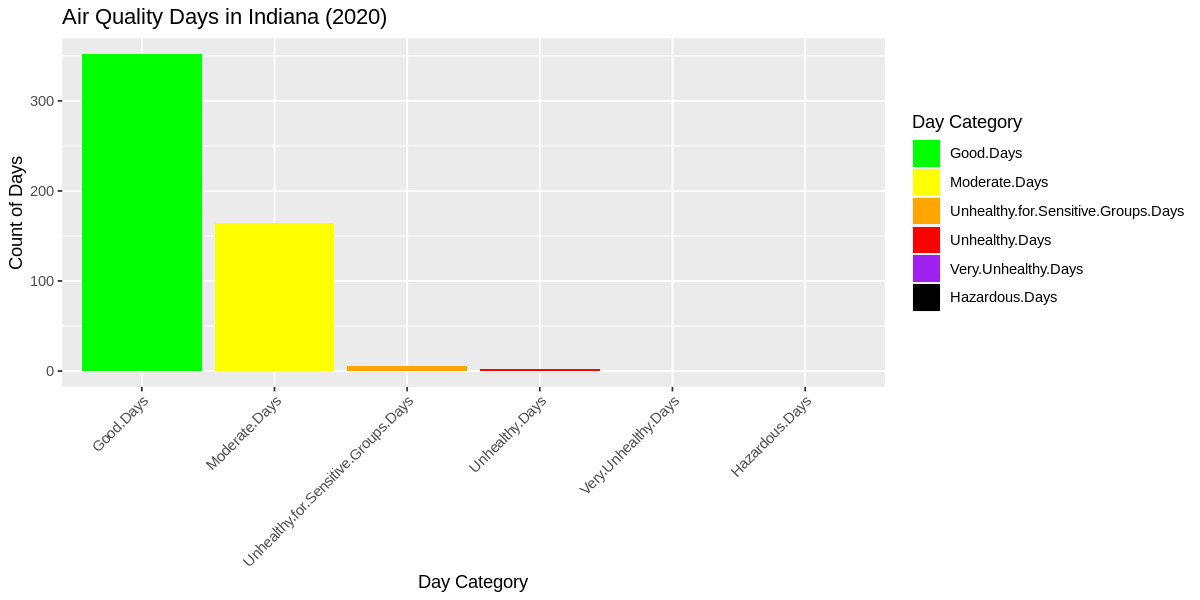

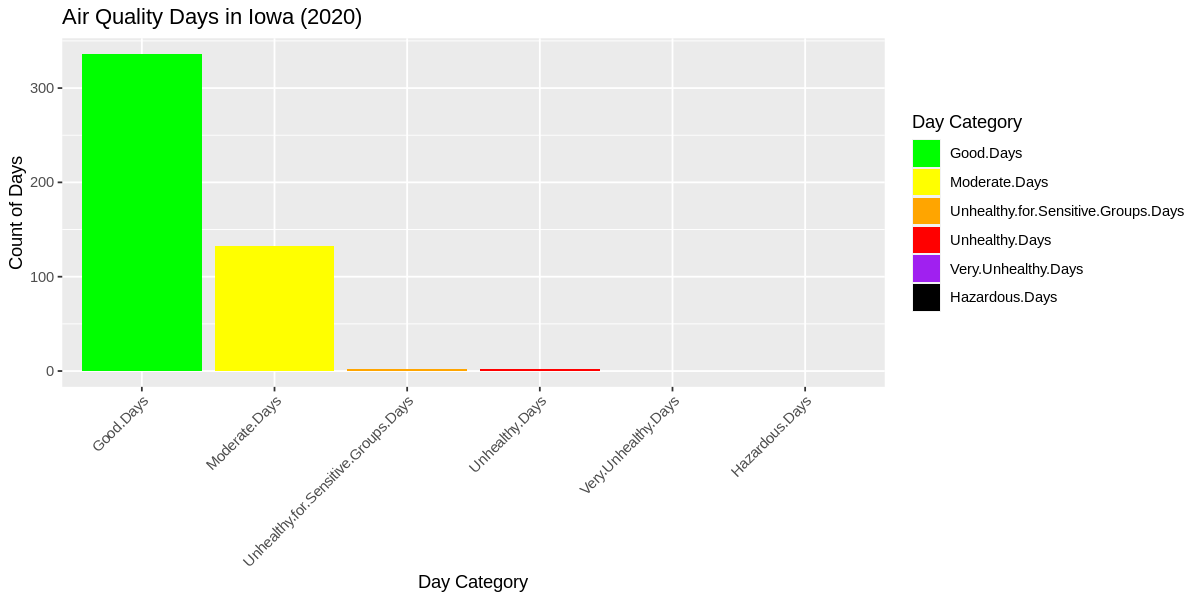

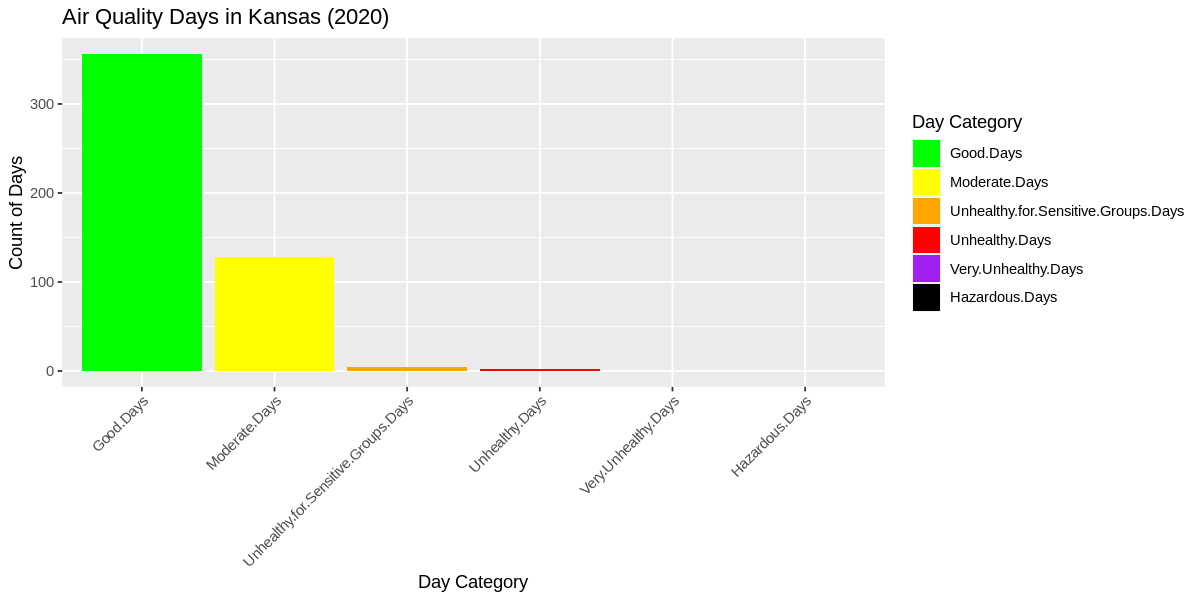

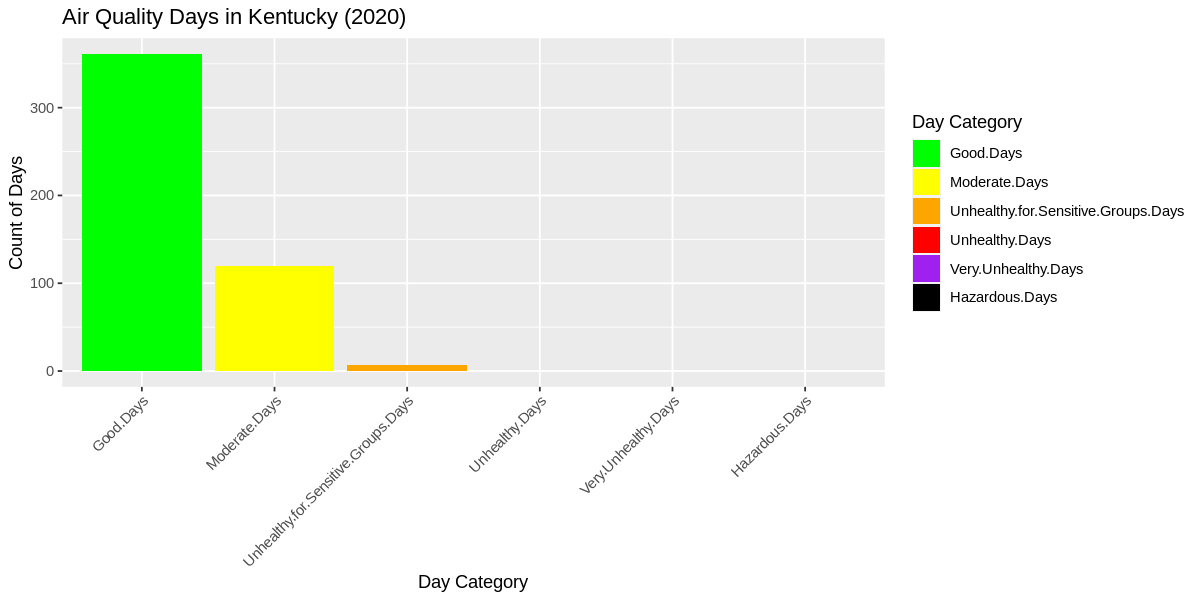

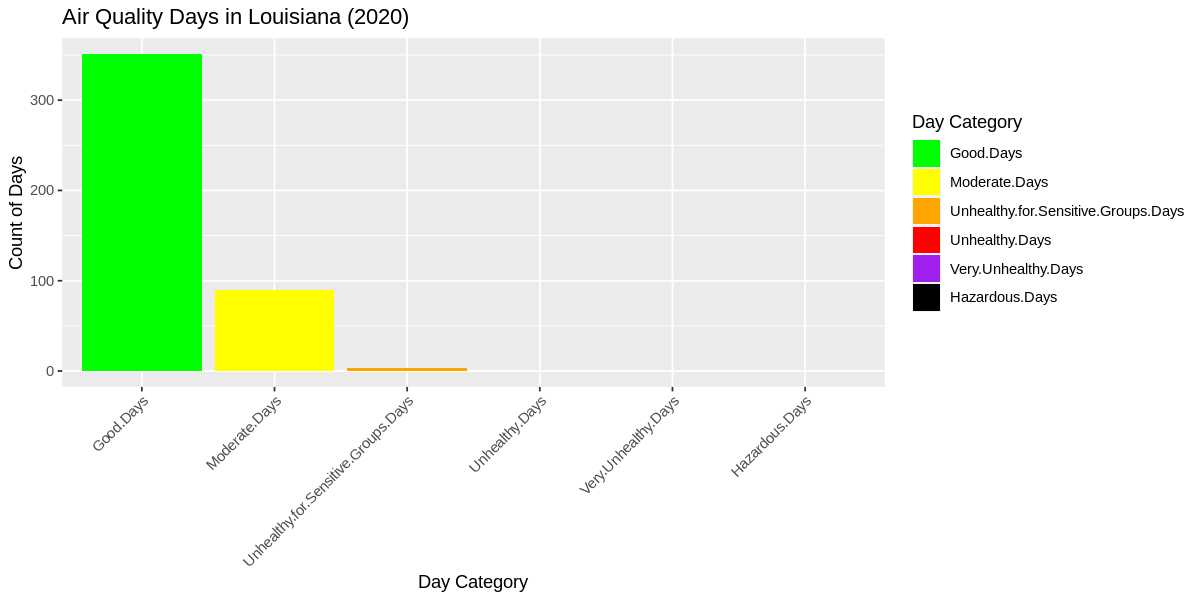

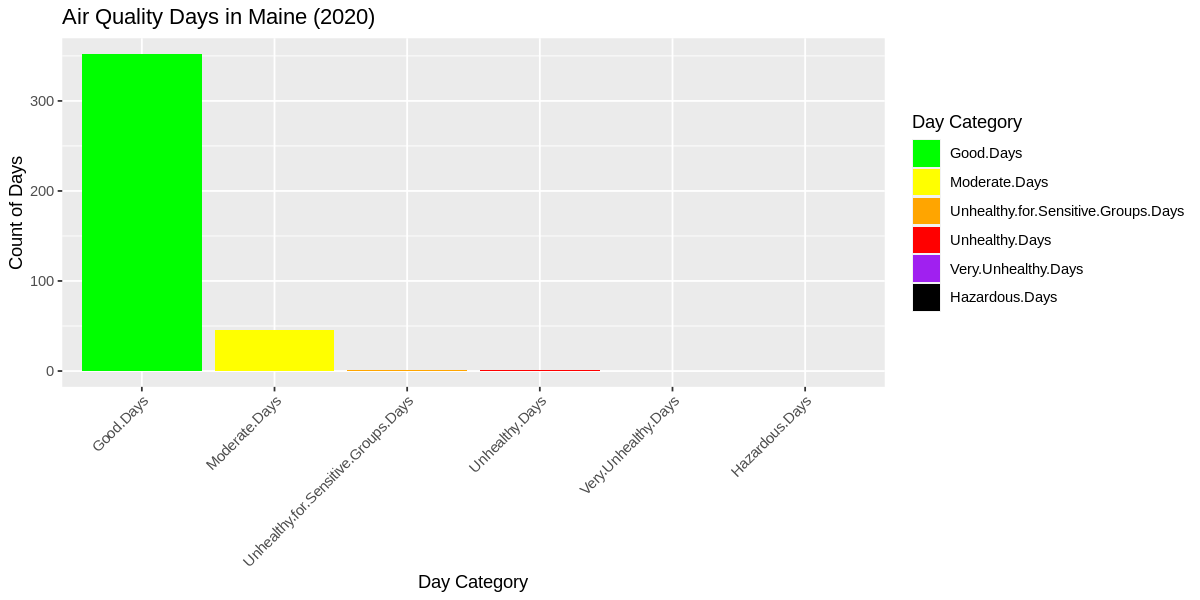

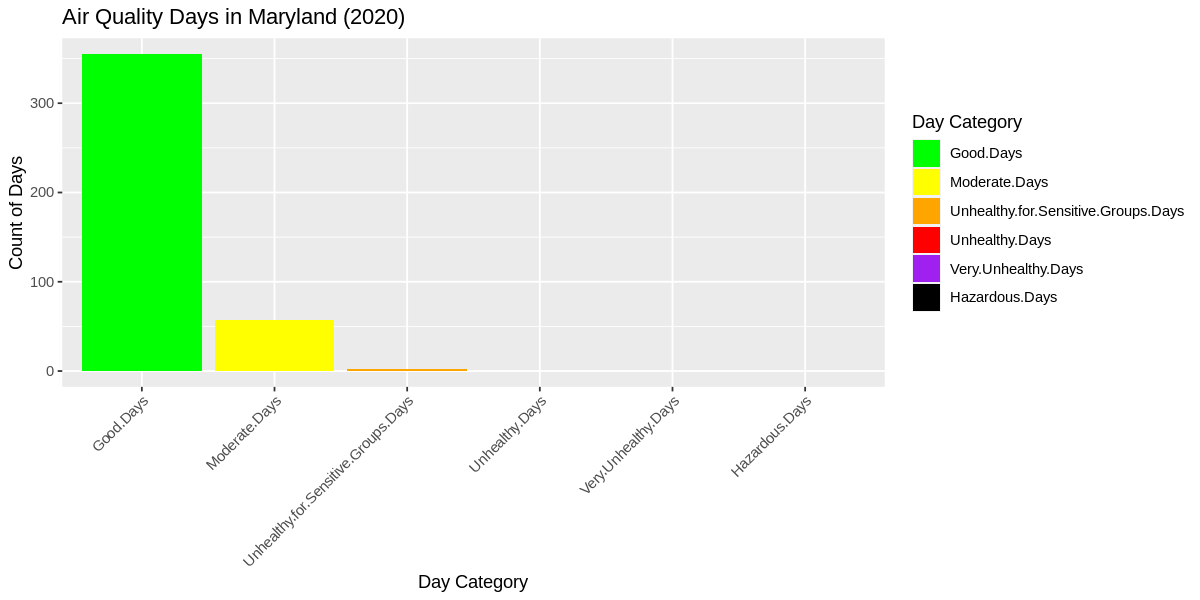

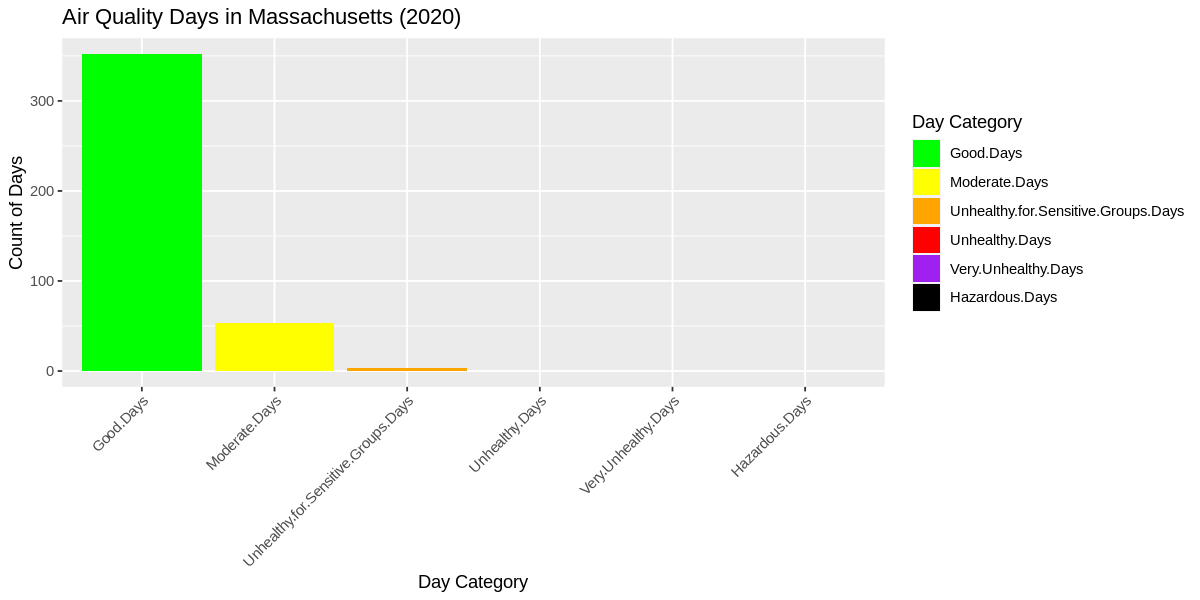

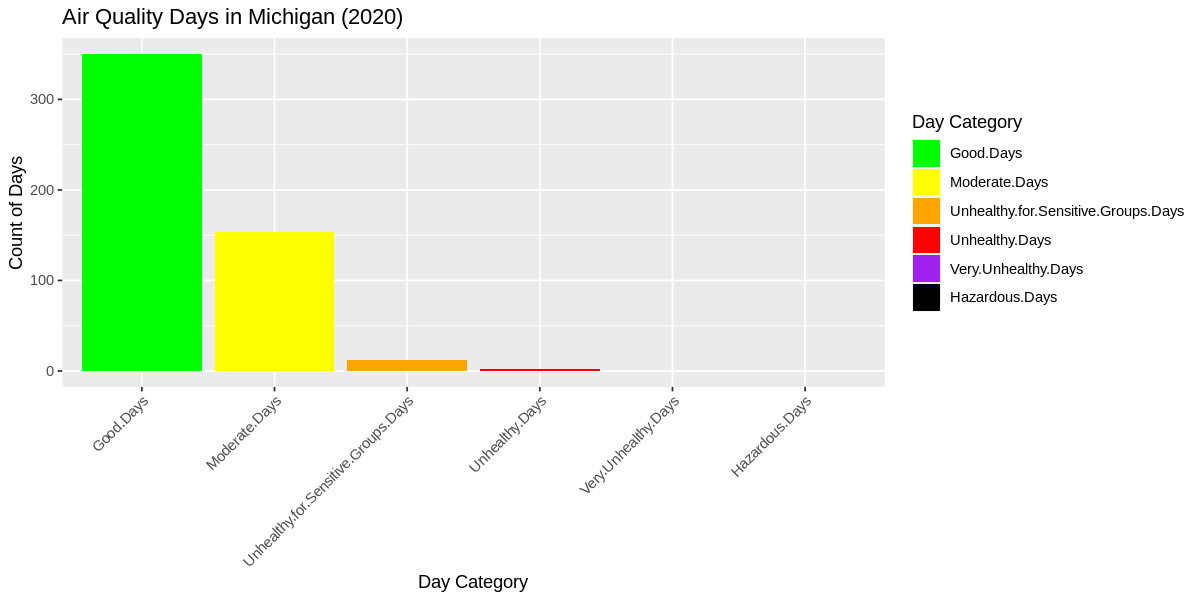

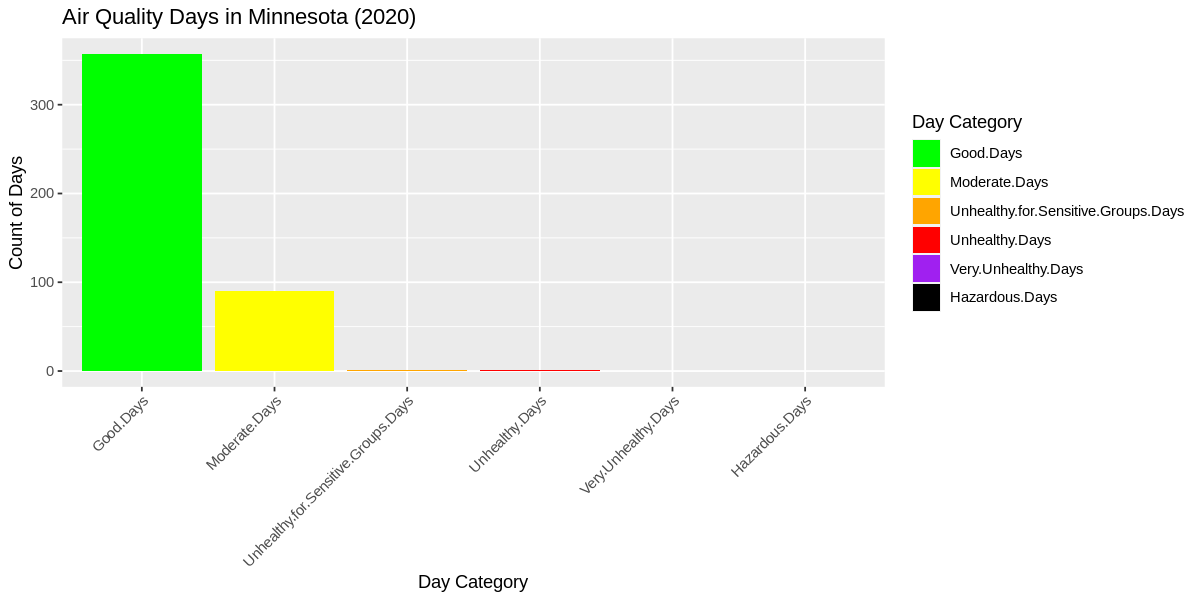

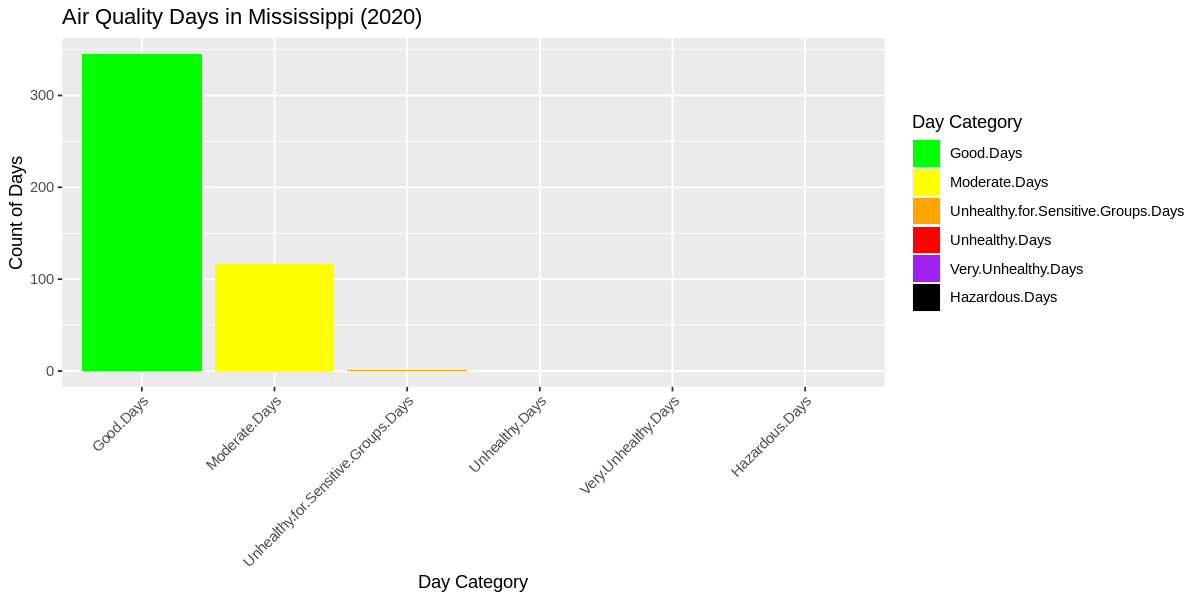

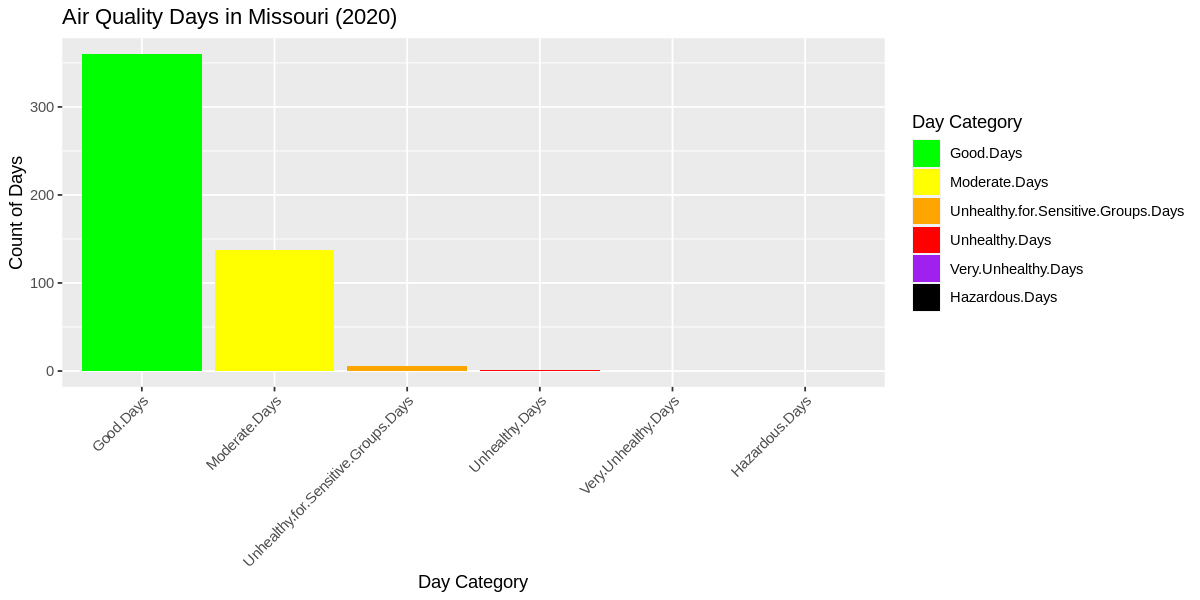

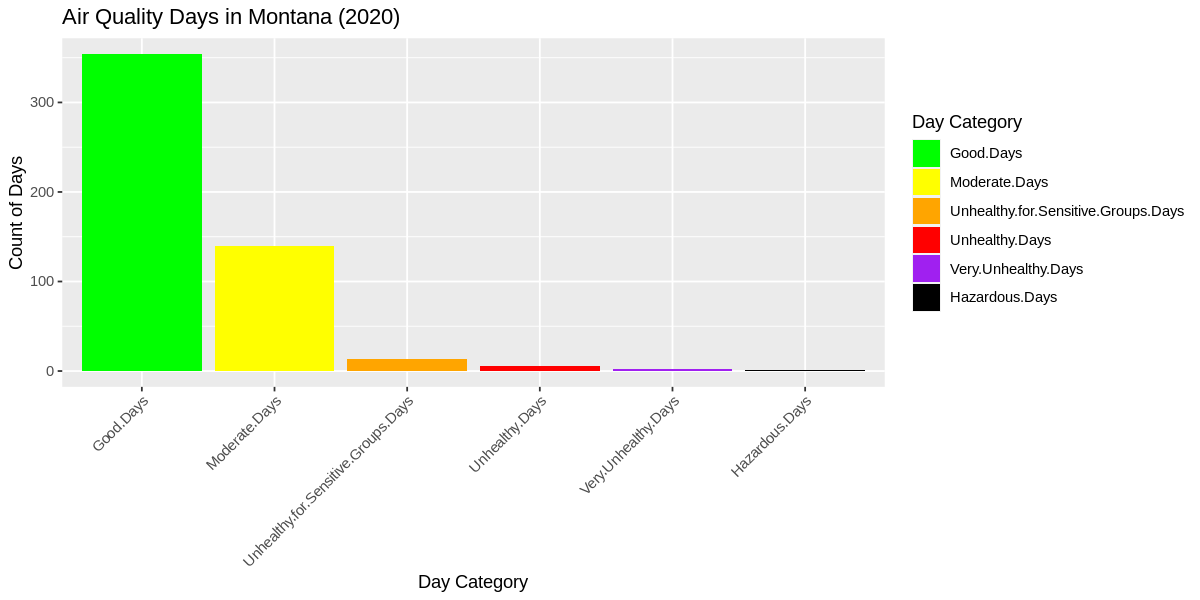

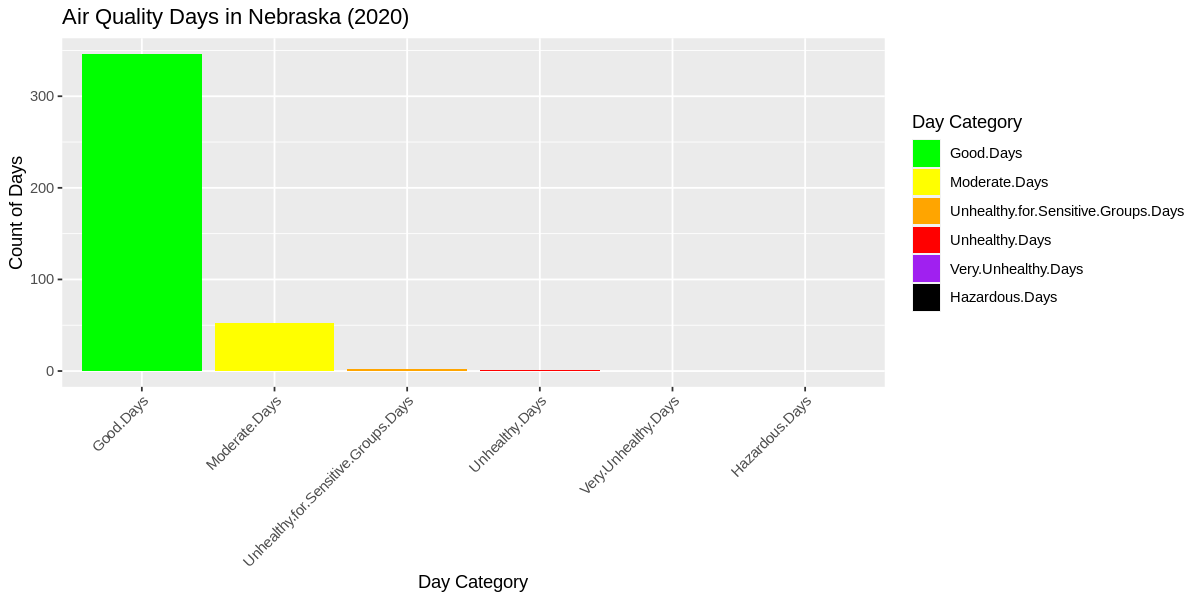

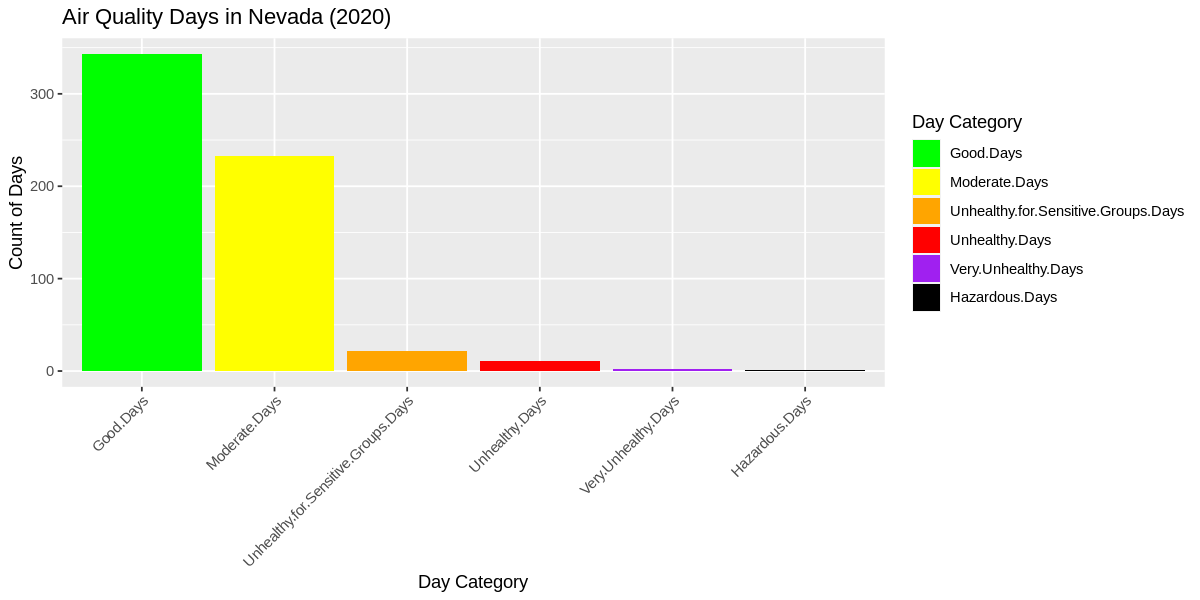

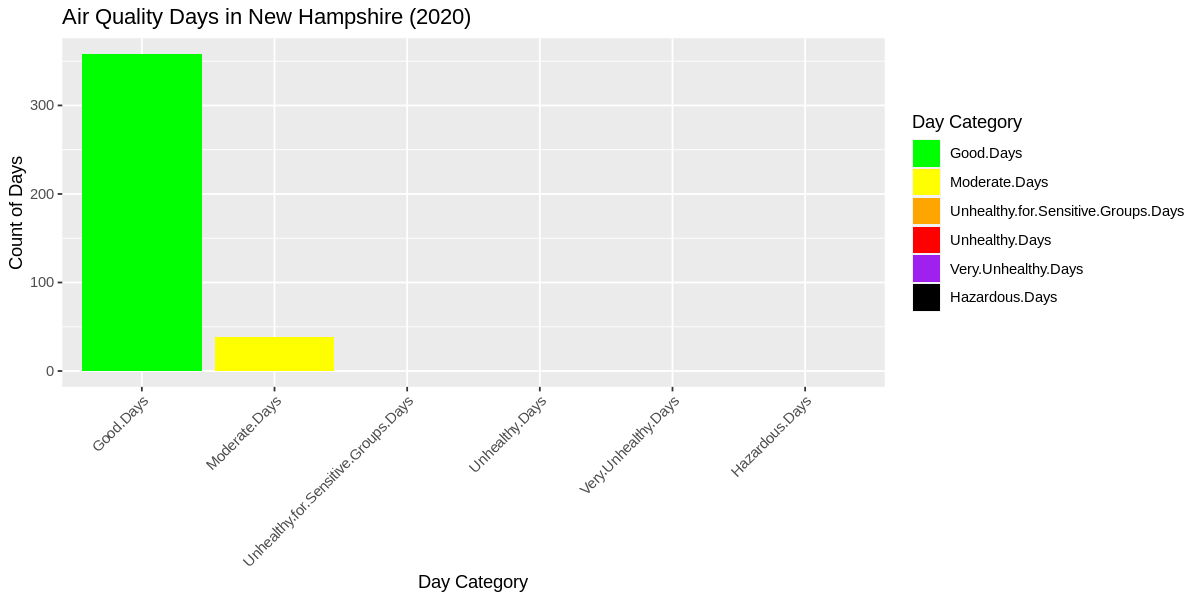

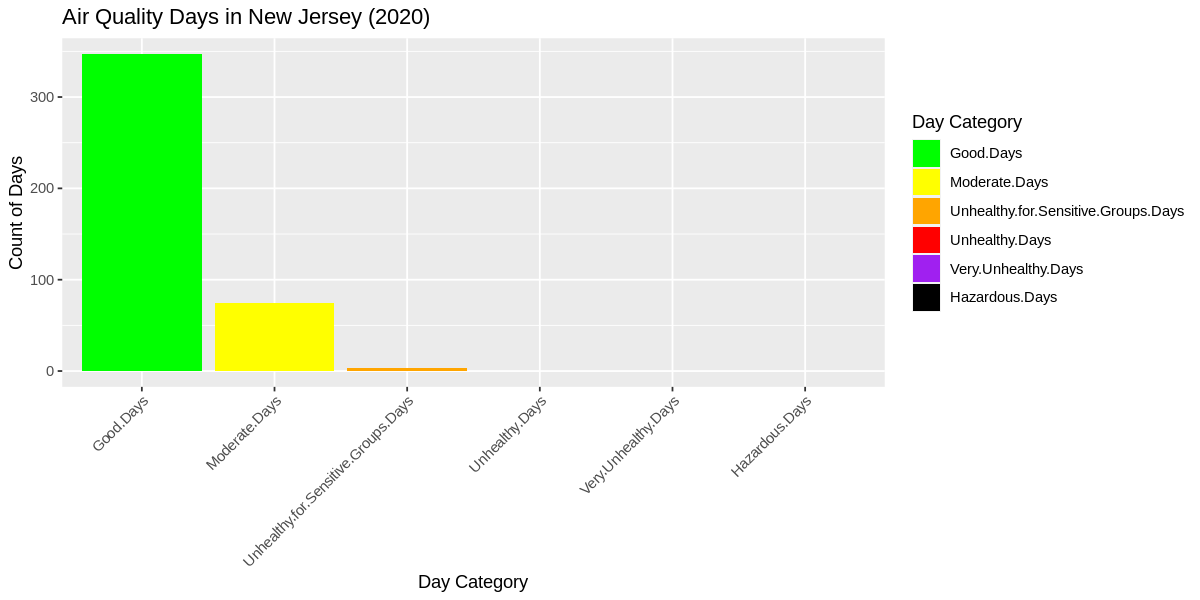

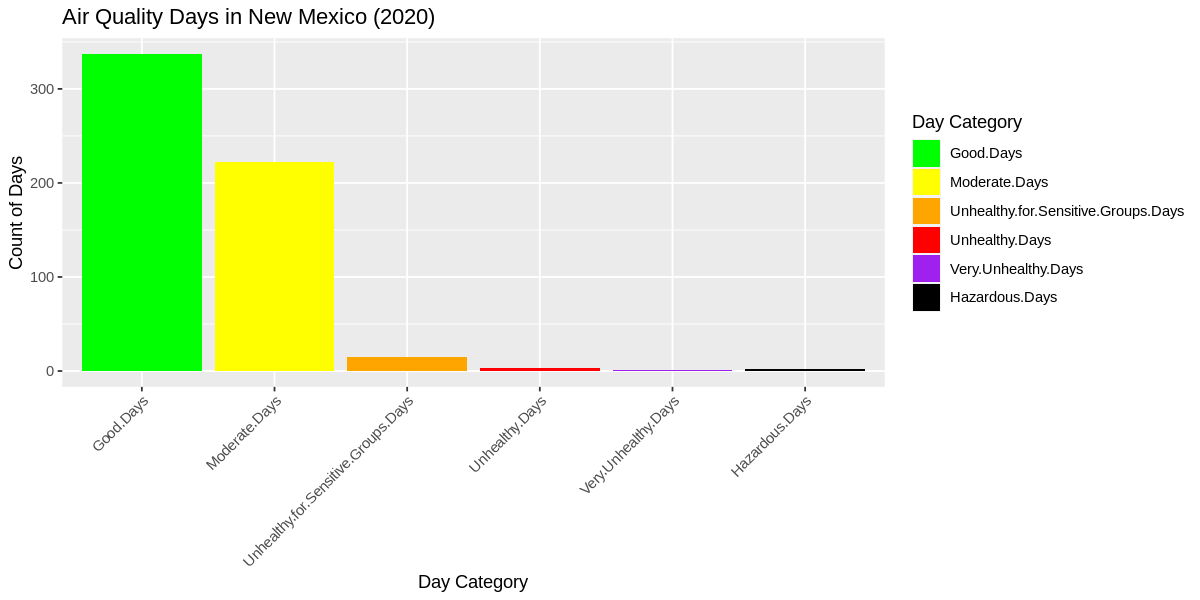

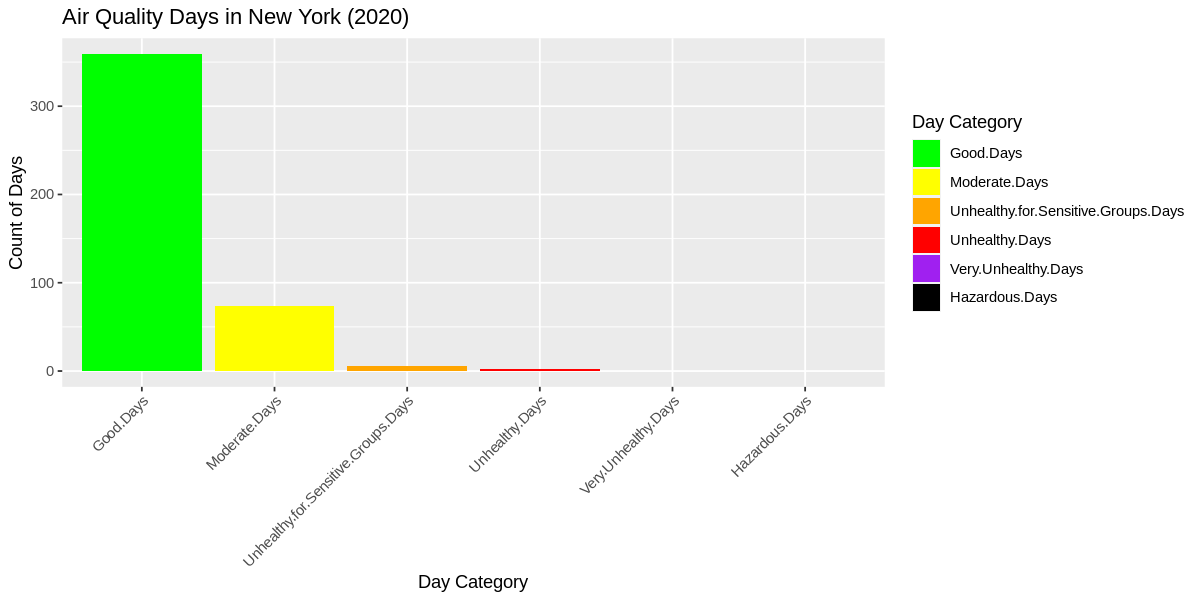

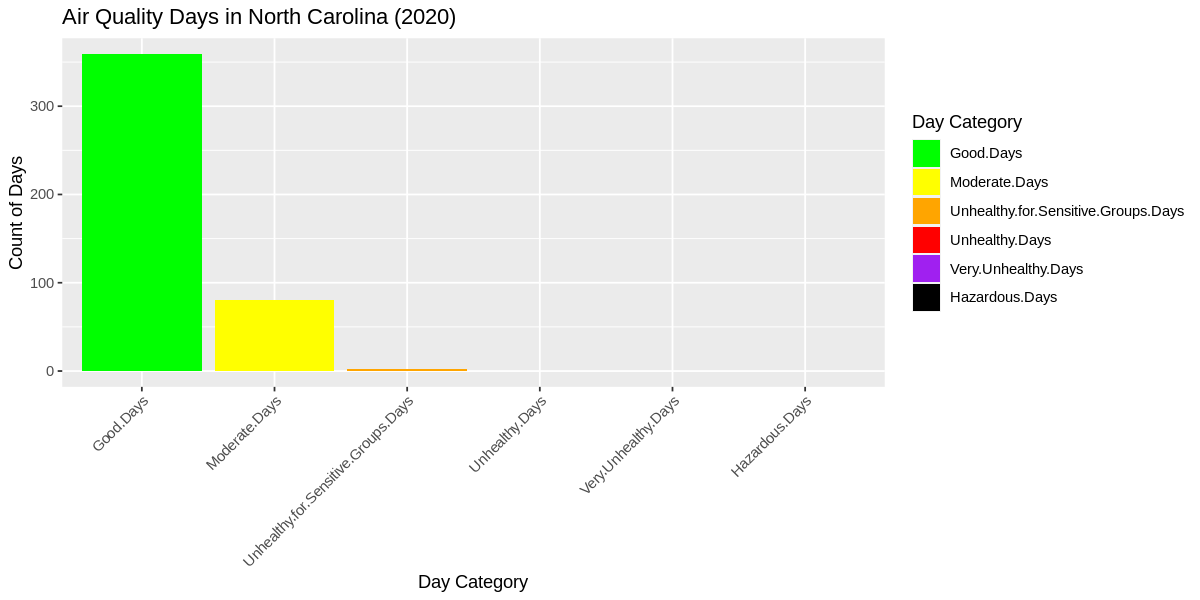

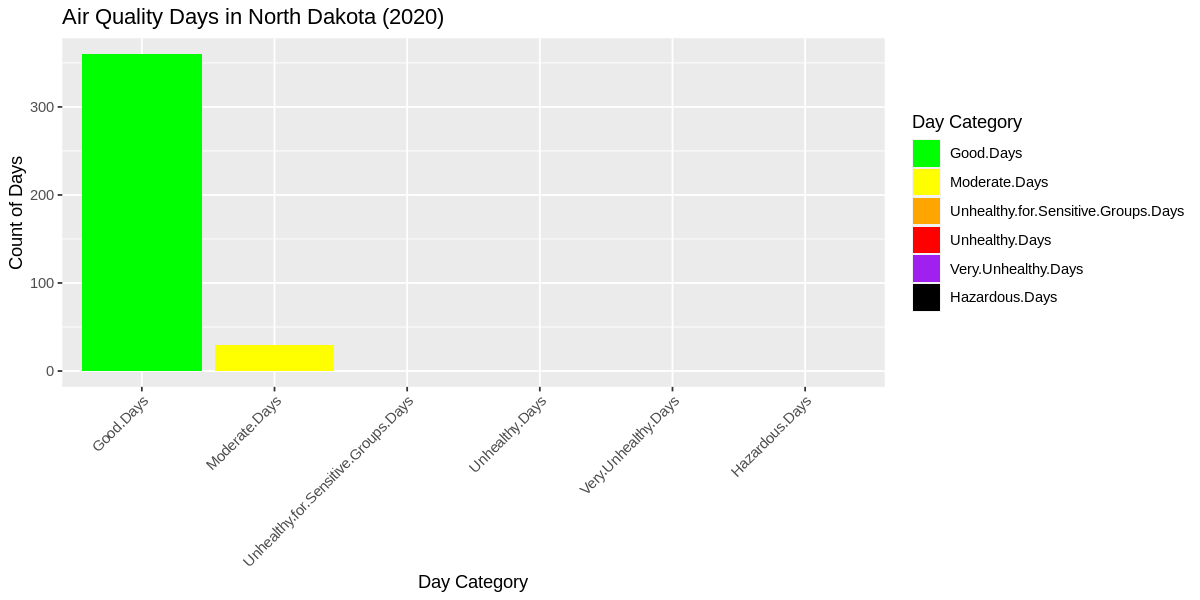

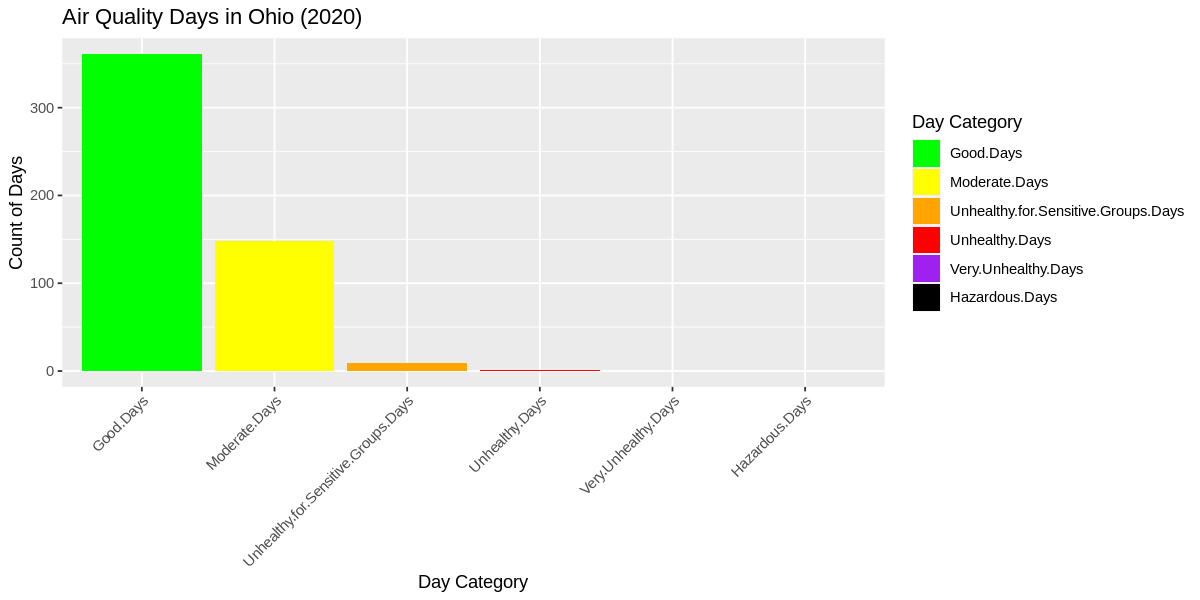

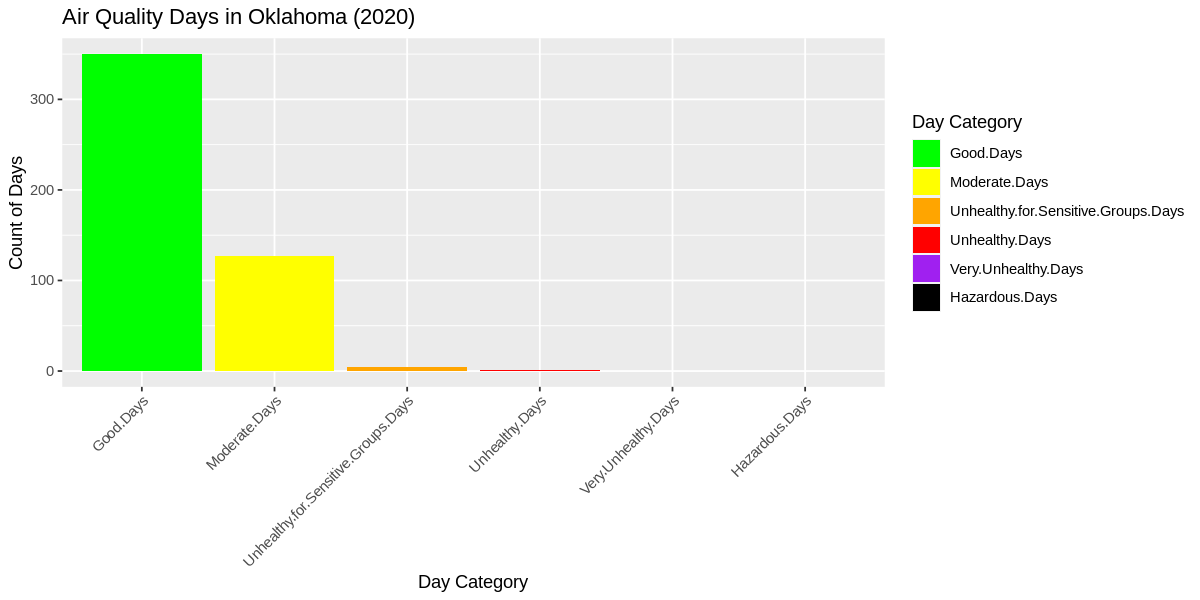

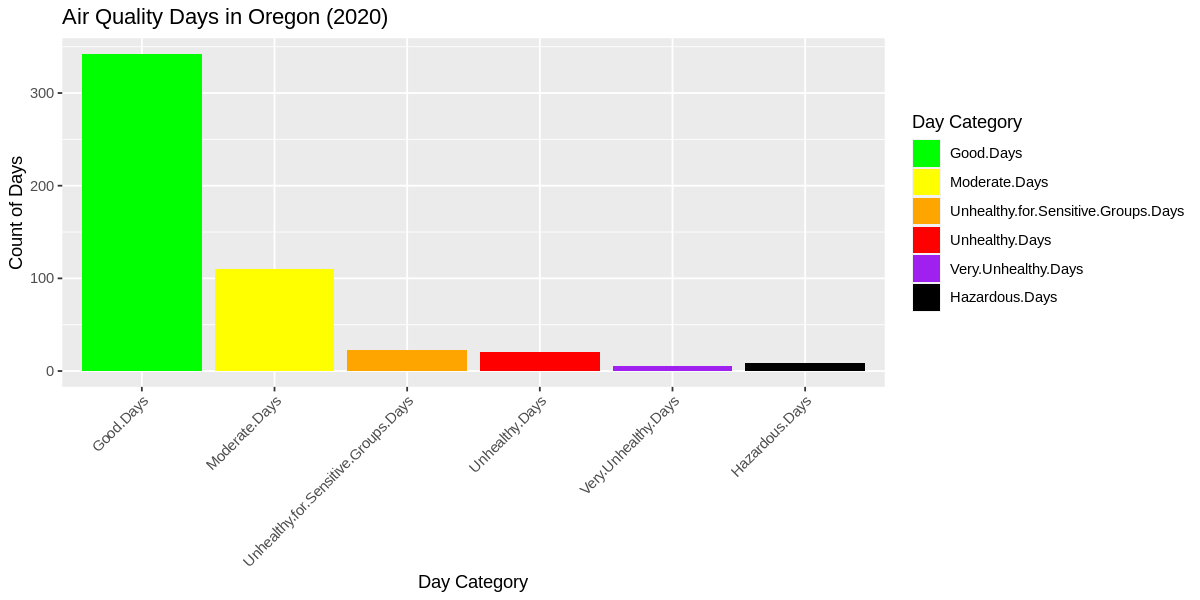

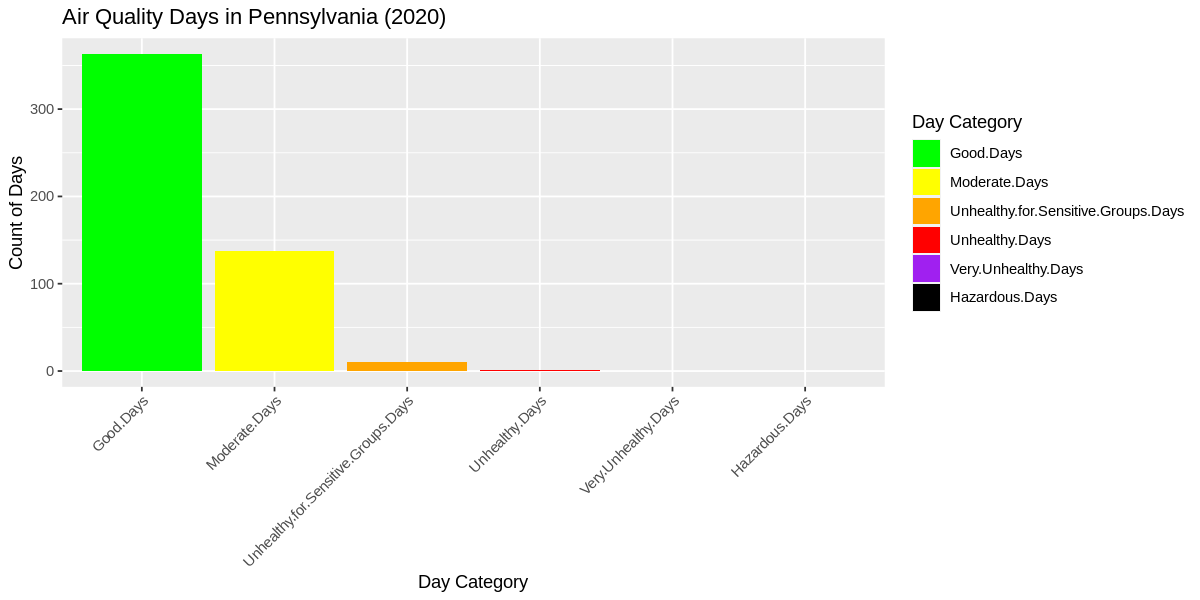

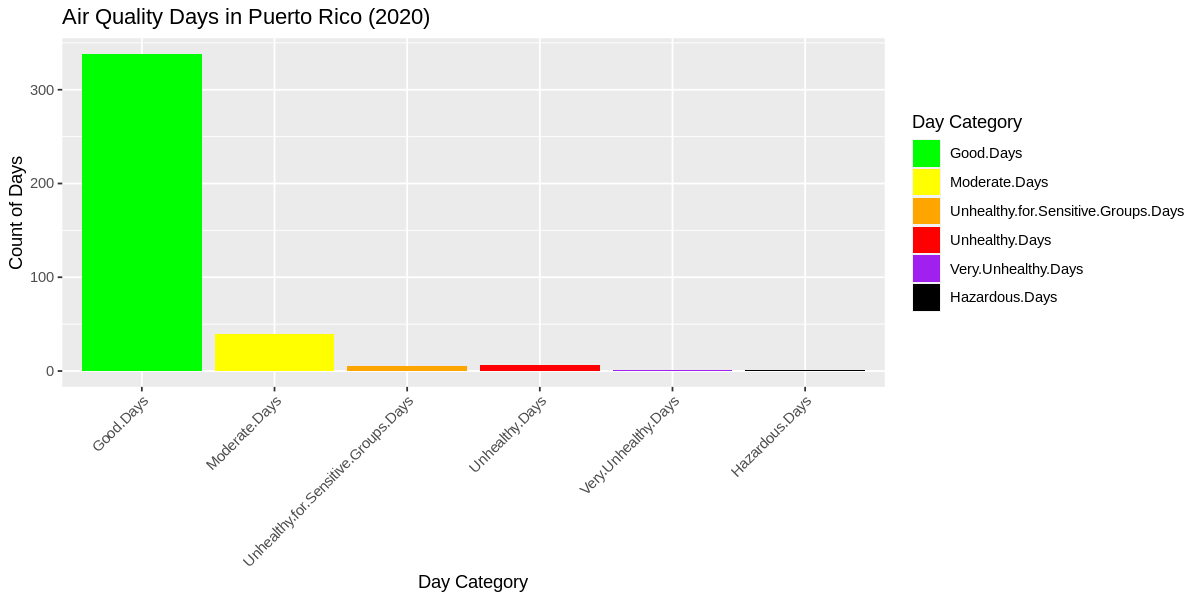

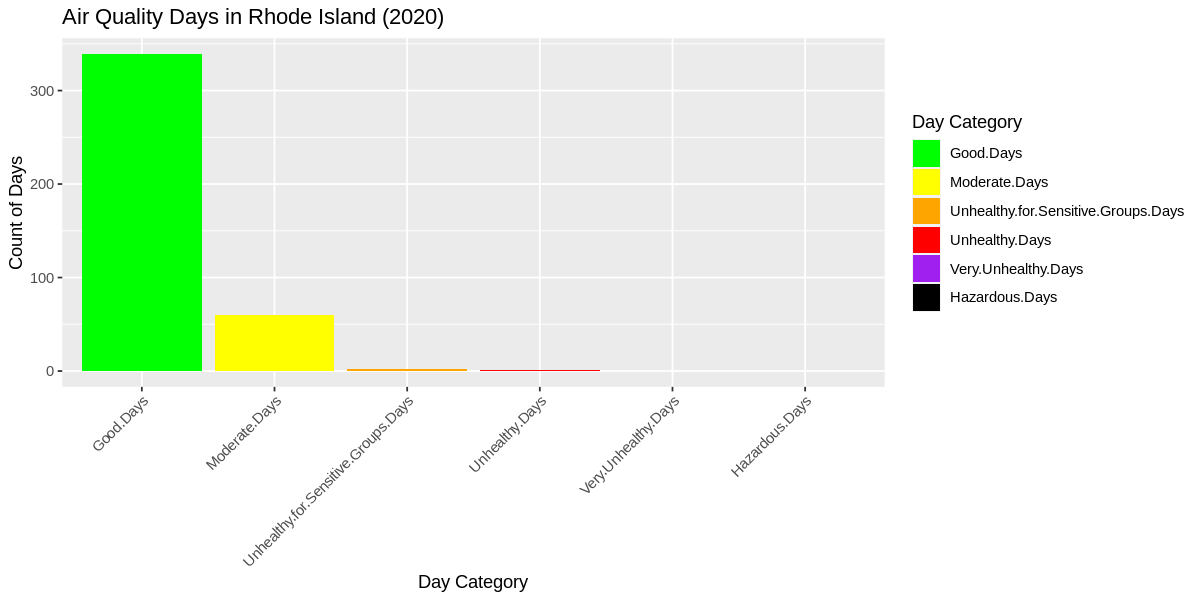

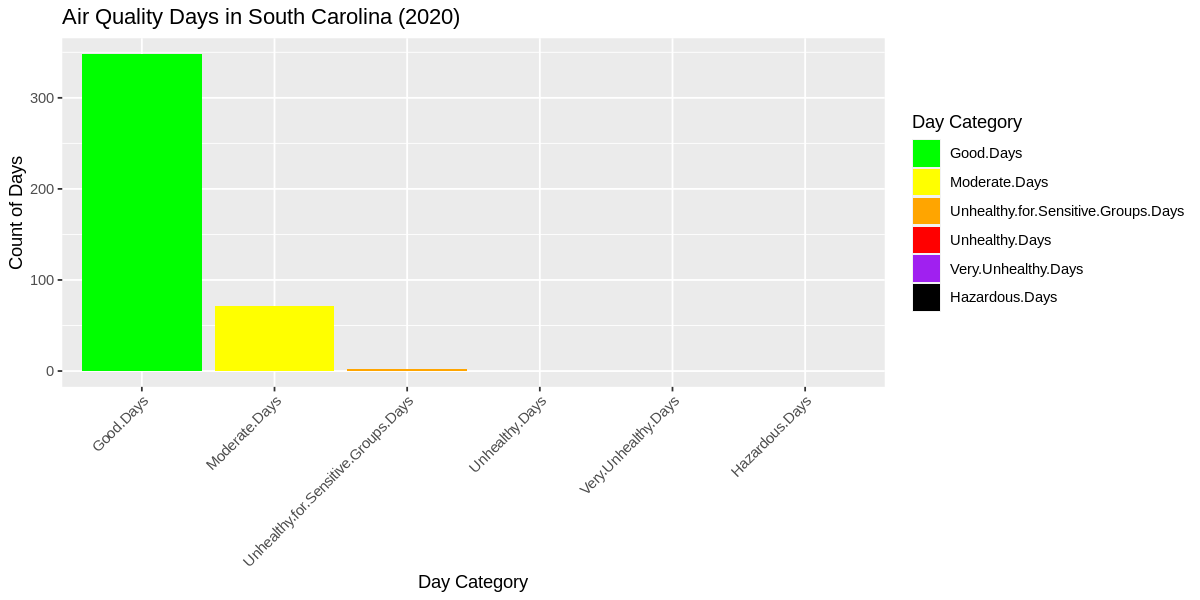

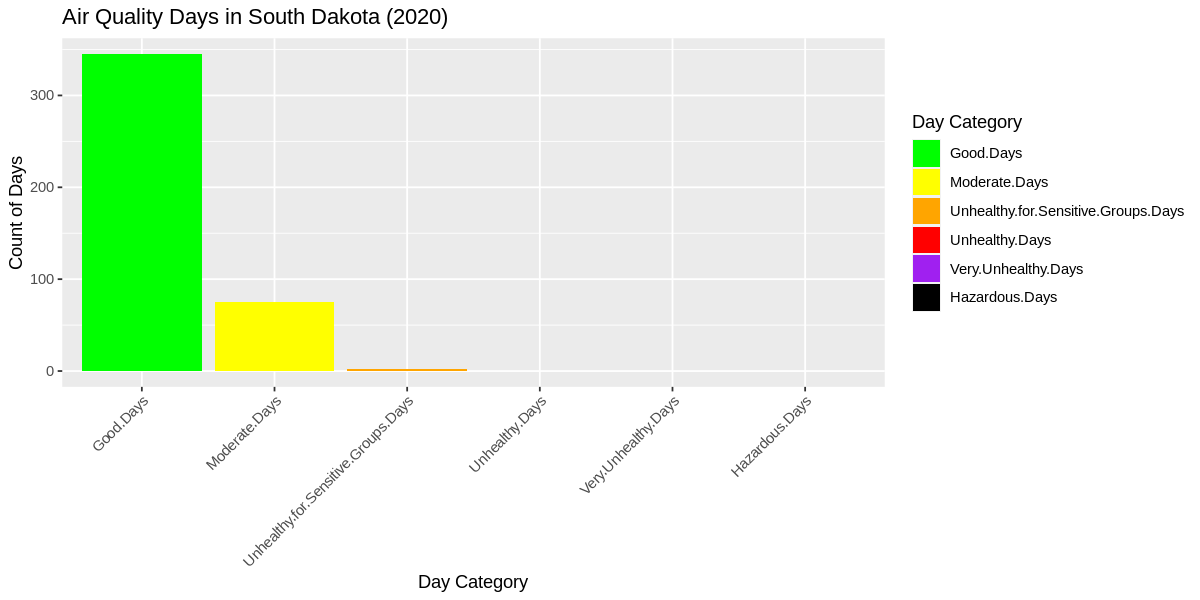

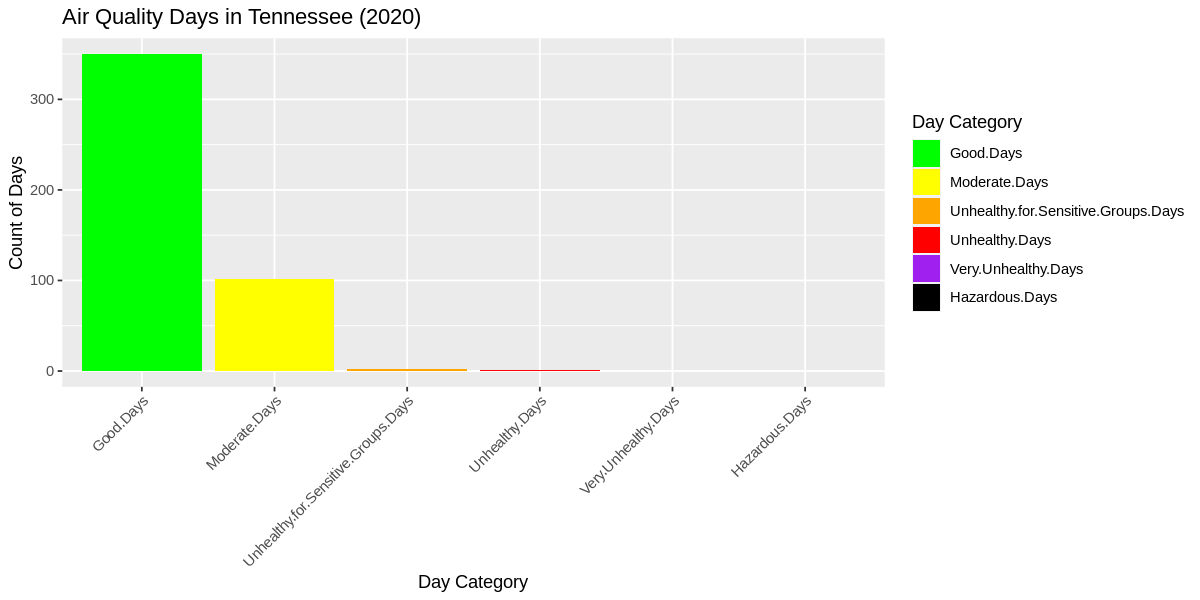

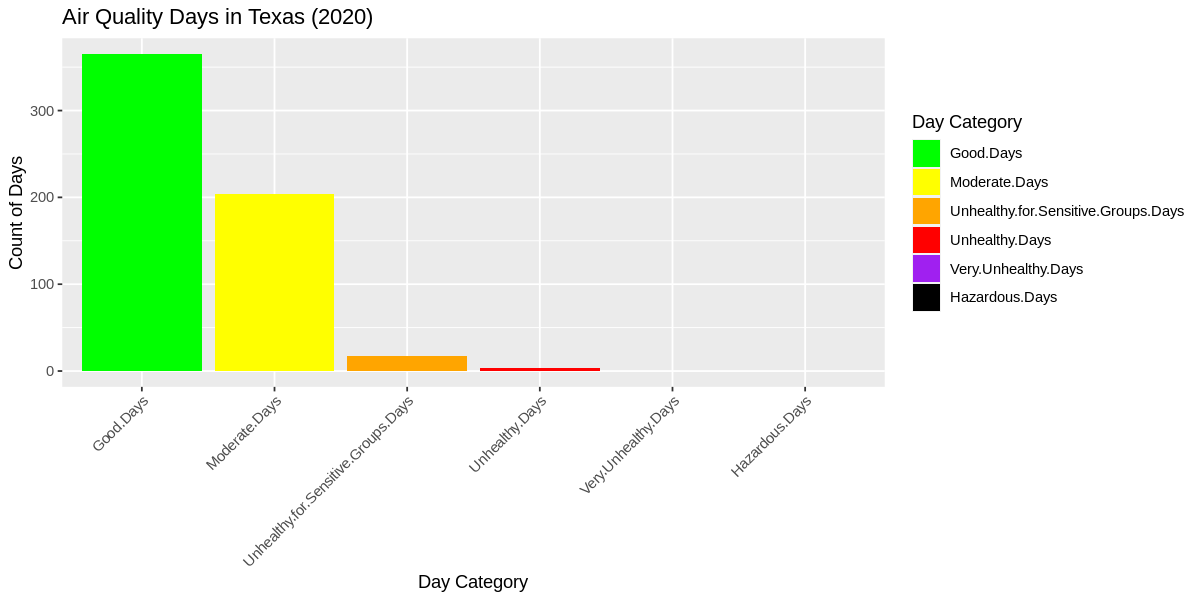

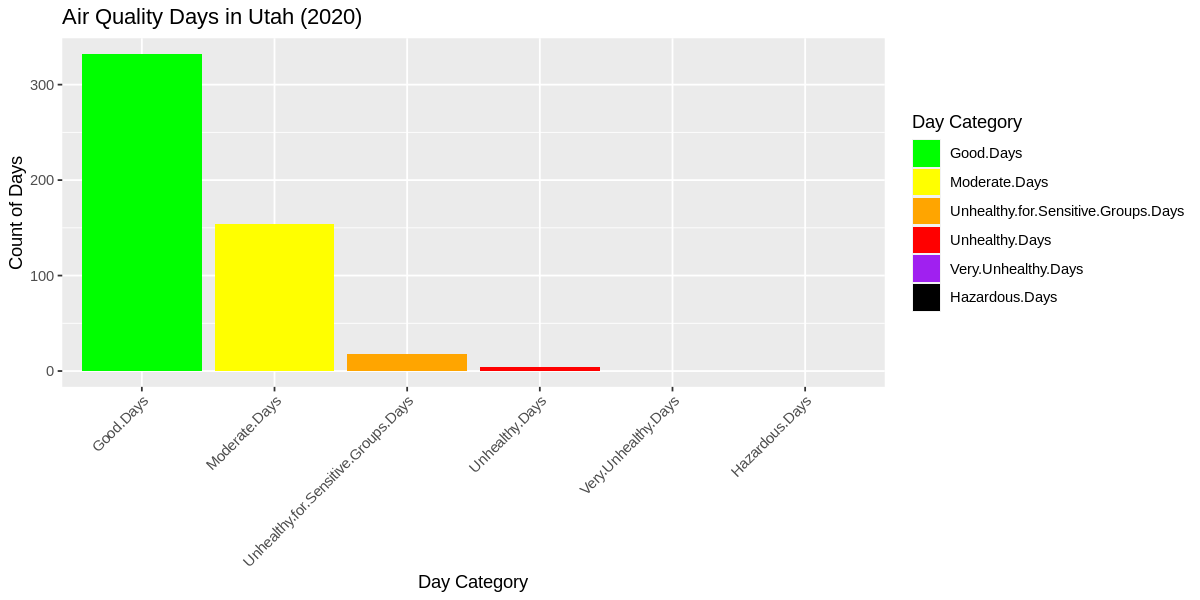

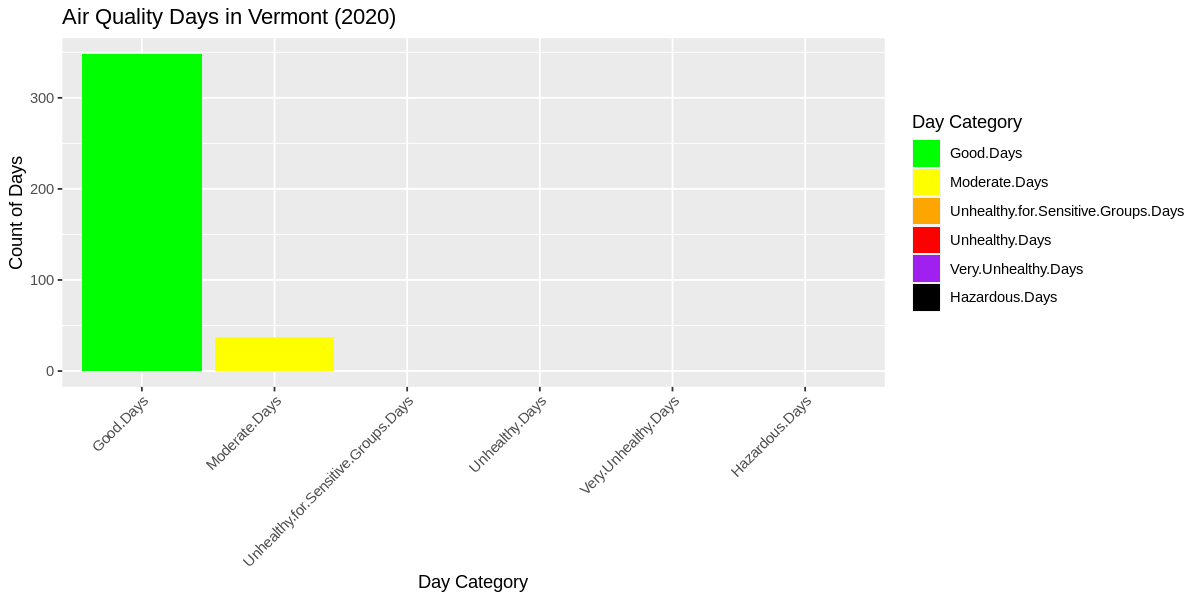

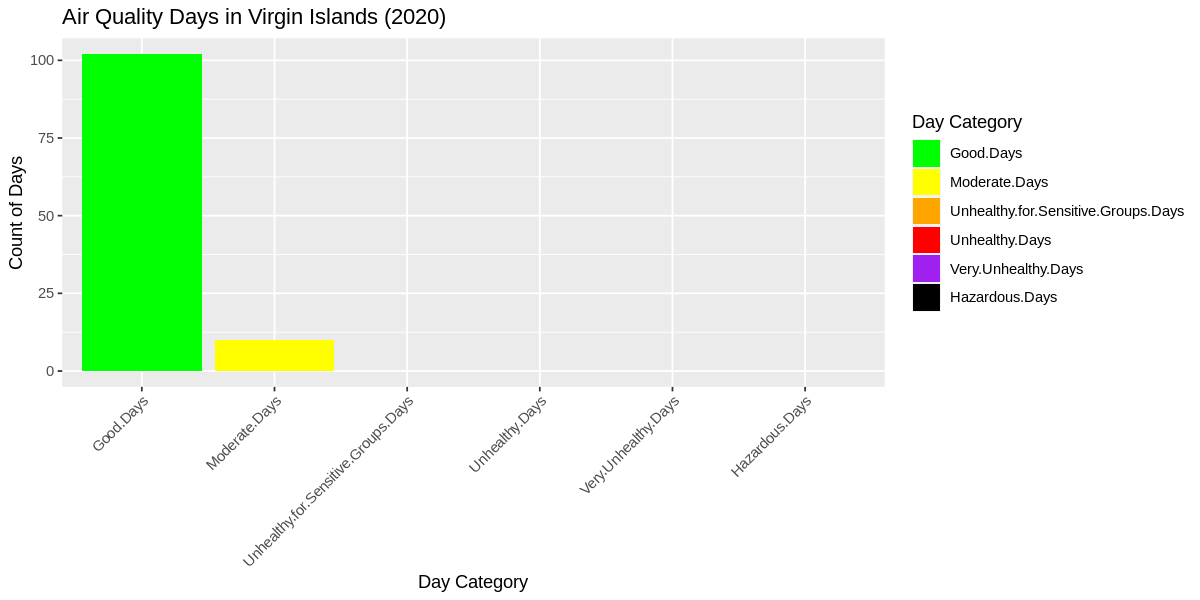

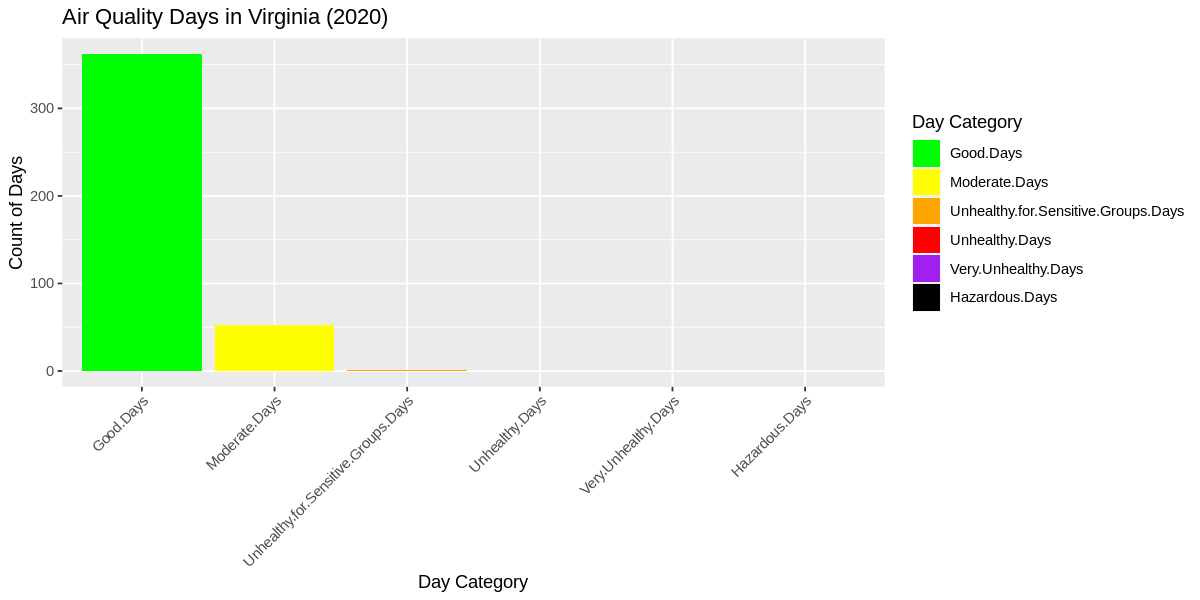

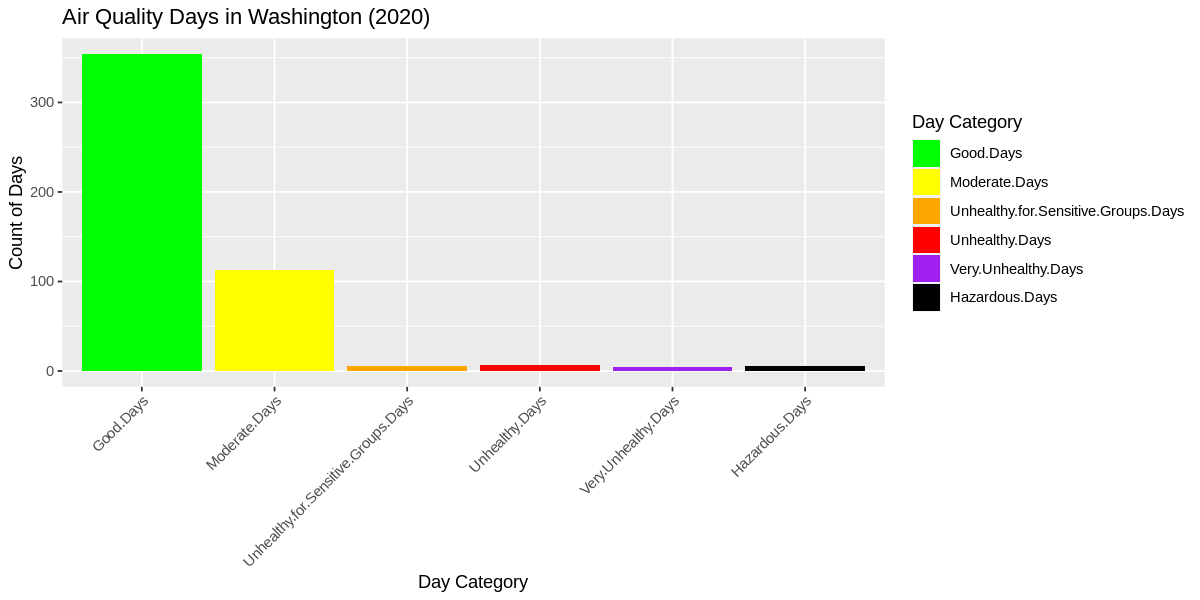

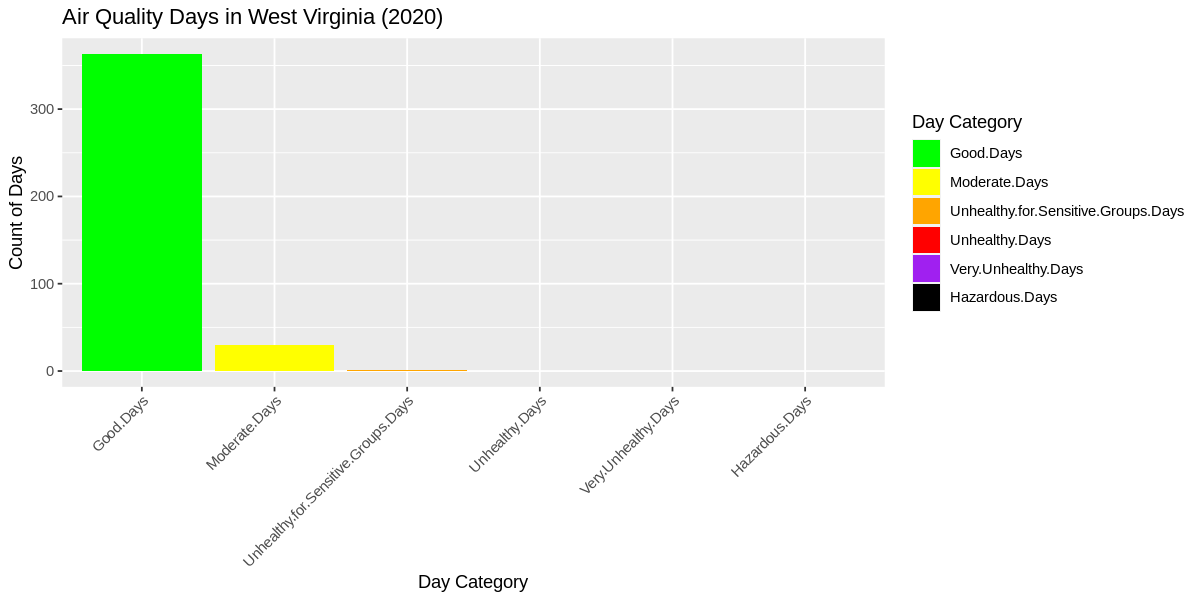

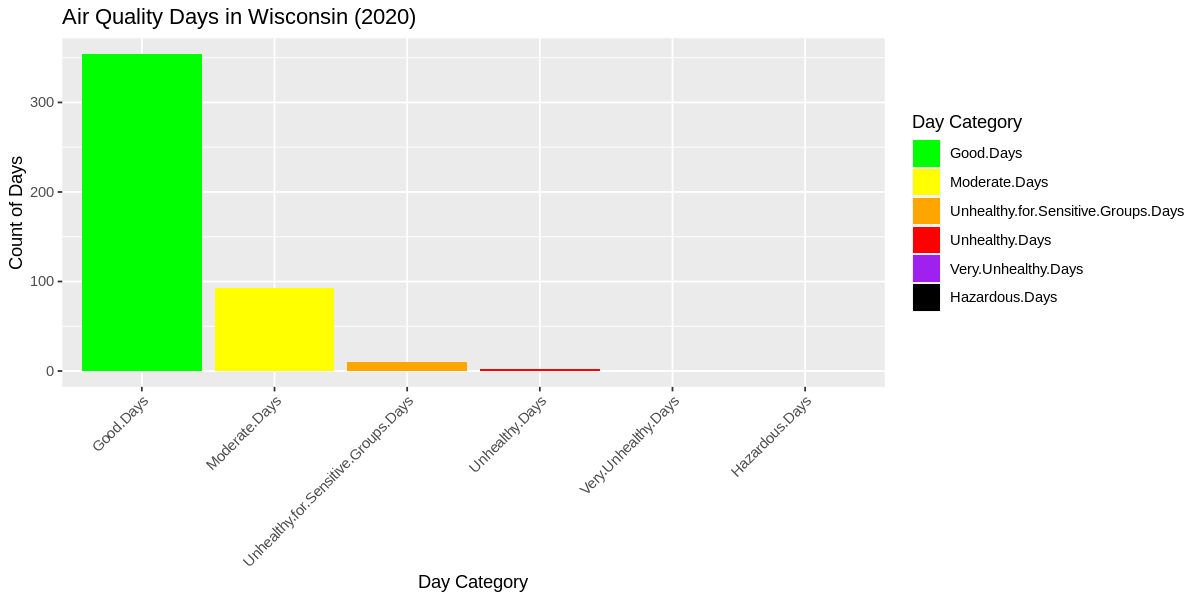

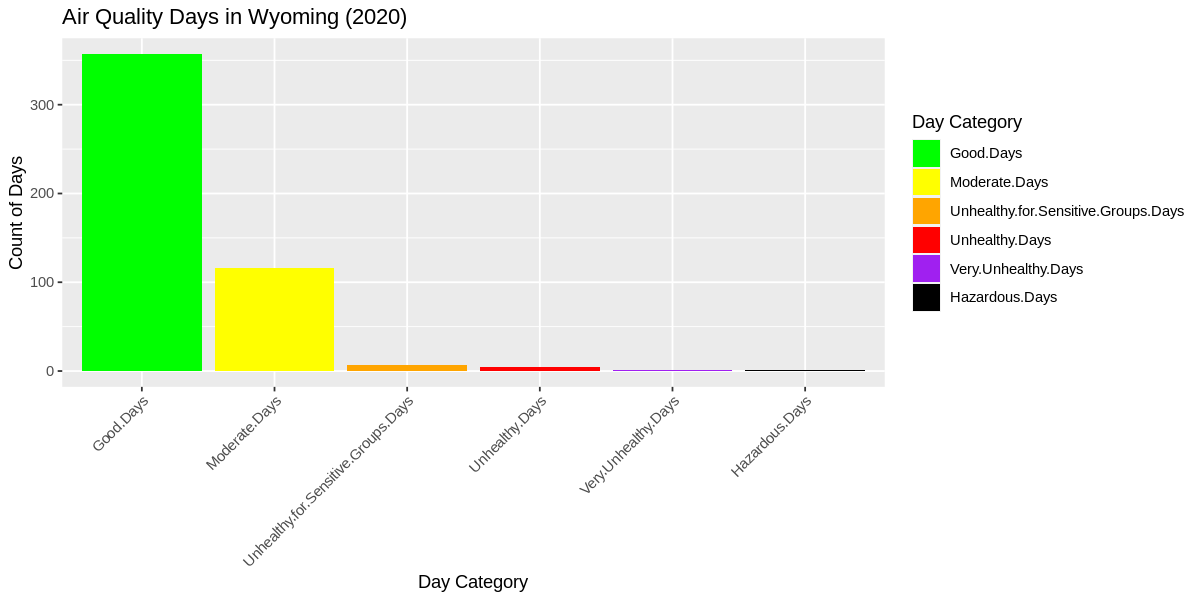

In [ ]:
# Melt the data for plotting
melted_data <- melt(df, id.vars = "State", measure.vars = c("Good.Days", "Moderate.Days", "Unhealthy.for.Sensitive.Groups.Days", "Unhealthy.Days", "Very.Unhealthy.Days", "Hazardous.Days"), variable.name = "Day_Category")

# Set plot window size
options(repr.plot.width = 10, repr.plot.height = 5)

# Create plots for each state and print them
for (state in unique(melted_data$State)) {
  state_data <- melted_data[melted_data$State == state, ]

  p <- ggplot(state_data, aes(x = Day_Category, y = value, fill = Day_Category)) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(title = paste("Air Quality Days in", state, "(2020)"),
         x = "Day Category",
         y = "Count of Days",
         fill = "Day Category") +
    scale_fill_manual(values = c("Good.Days" = "green",
                                  "Moderate.Days" = "yellow",
                                  "Unhealthy.for.Sensitive.Groups.Days" = "orange",
                                  "Unhealthy.Days" = "red",
                                  "Very.Unhealthy.Days" = "purple",
                                  "Hazardous.Days" = "black")) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
  p + theme(plot.margin = margin(1, 1, 1, 1, "cm"))

  # Print each plot
  print(p)
}

# SOM

In [ ]:
# Assuming you have a dataframe named 'df' containing numeric columns
# Select numeric columns from the dataframe
numeric_df <- df[, sapply(df, is.numeric)]

# Create a SOM model using the numeric matrix
som_model <- som(as.matrix(numeric_df), grid = somgrid(8, 8, "hexagonal"))

# Set the width and height of the plot window
options(repr.plot.width = 8, repr.plot.height = 8)

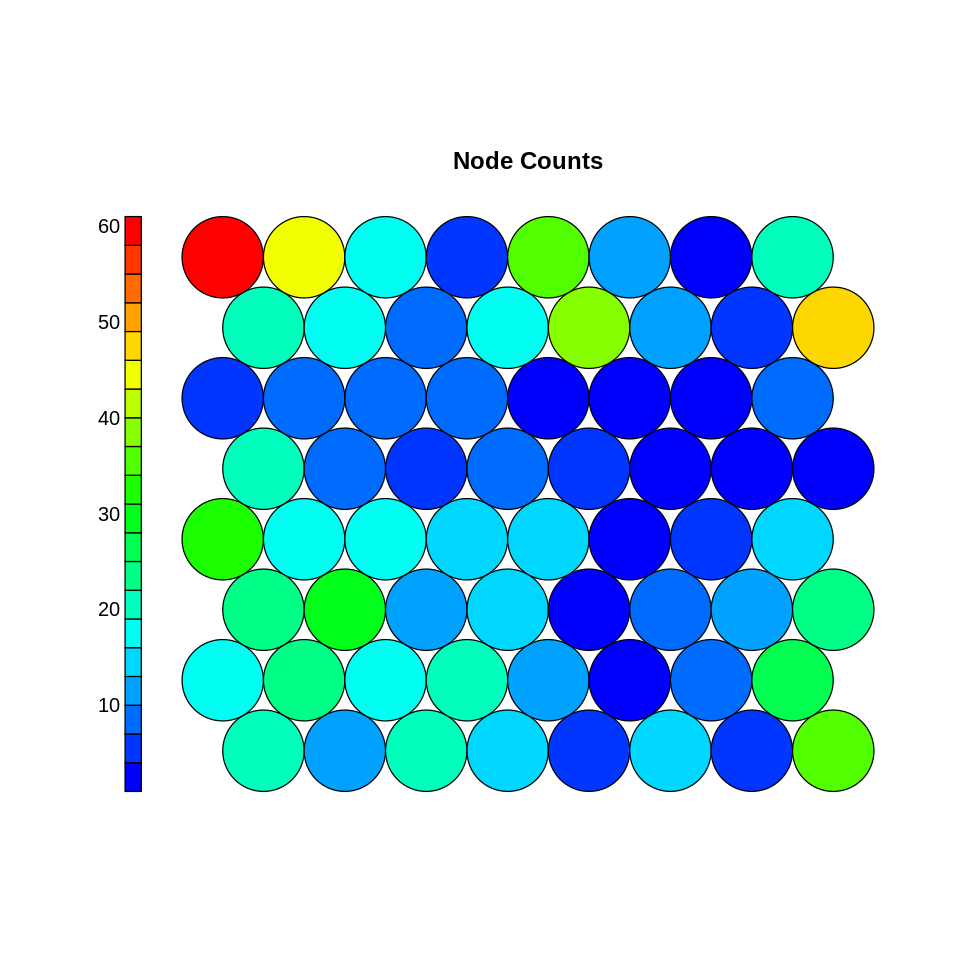

In [ ]:
counts within nodes
plot(som_model, type = "counts", main="Node Counts", palette.name=coolBlueHotRed)

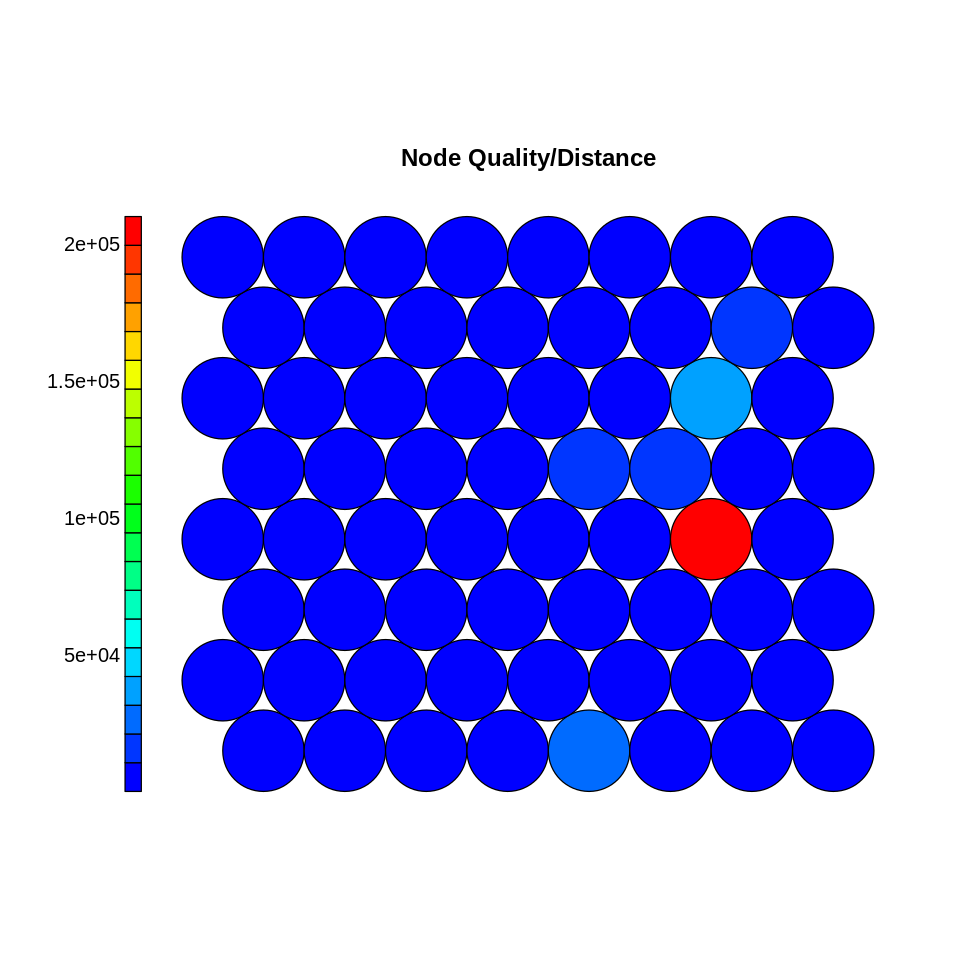

In [ ]:
#map quality
plot(som_model, type = "quality", main="Node Quality/Distance", palette.name=coolBlueHotRed)

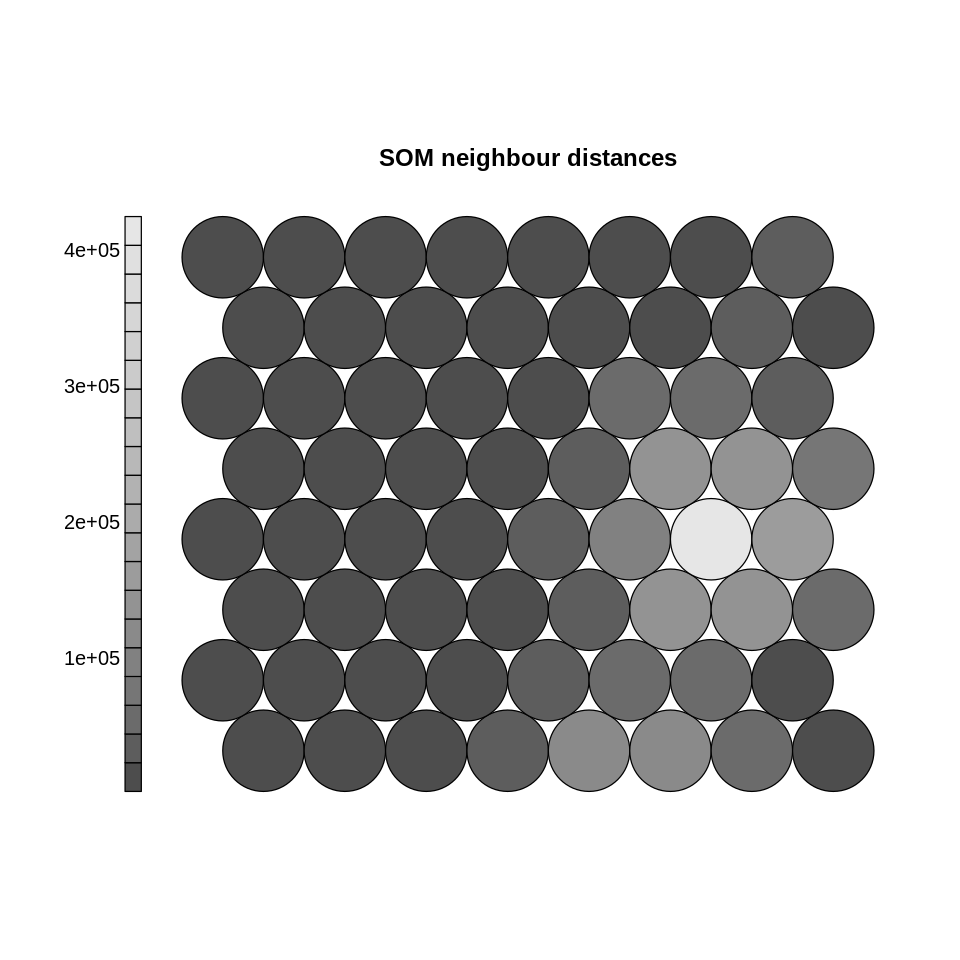

In [ ]:
#neighbour distances
plot(som_model, type="dist.neighbours", main = "SOM neighbour distances", palette.name=grey.colors)

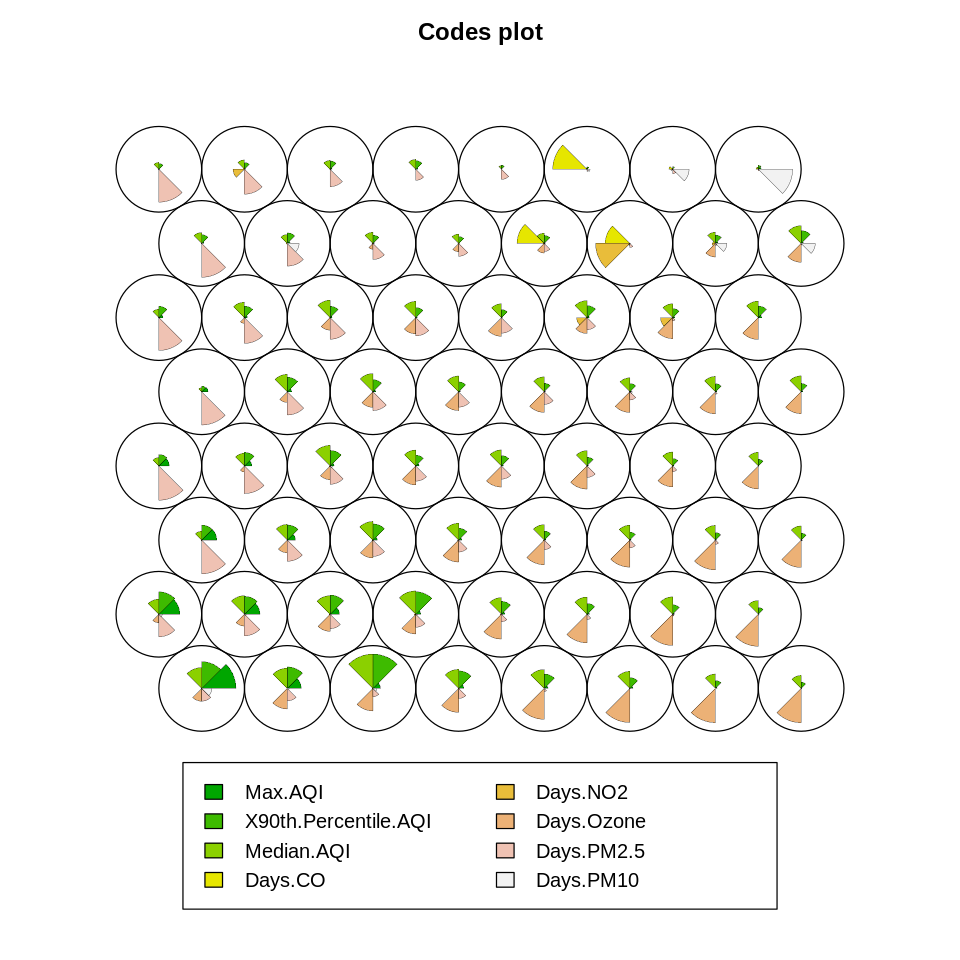

In [ ]:
# Select columns of interest related to air pollution
columns_of_interest <- c("Max.AQI", "X90th.Percentile.AQI", "Median.AQI",
                         "Days.CO", "Days.NO2", "Days.Ozone", "Days.PM2.5", "Days.PM10")

# Select numeric columns from the dataframe
numeric_df <- df[, columns_of_interest]

# Create a SOM model using the numeric matrix
som_model <- som(as.matrix(numeric_df), grid = somgrid(8, 8, "hexagonal"))

# Plot the SOM
plot(som_model, type = "codes")

Warning message in bgcolors[!is.na(showcolors)] <- bgcol[showcolors[!is.na(showcolors)]]:
“number of items to replace is not a multiple of replacement length”
Warning message in bgcolors[!is.na(showcolors)] <- bgcol[showcolors[!is.na(showcolors)]]:
“number of items to replace is not a multiple of replacement length”


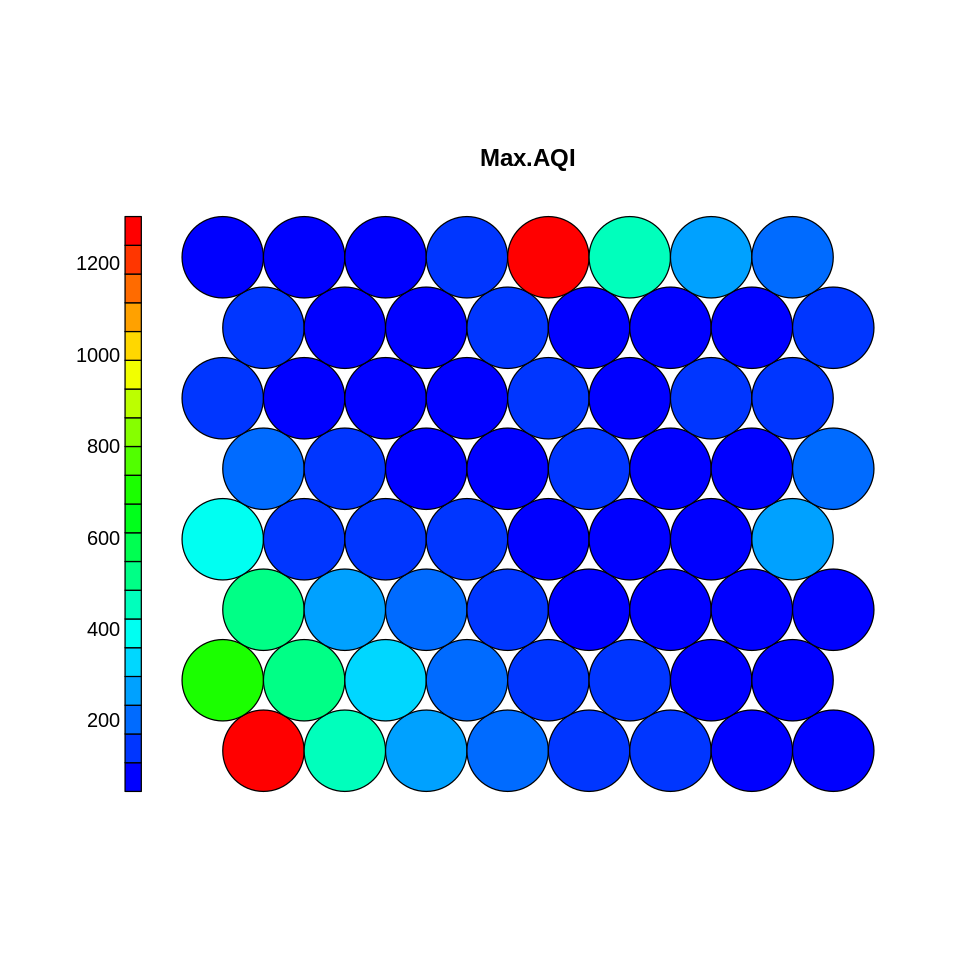

Warning message in bgcolors[!is.na(showcolors)] <- bgcol[showcolors[!is.na(showcolors)]]:
“number of items to replace is not a multiple of replacement length”


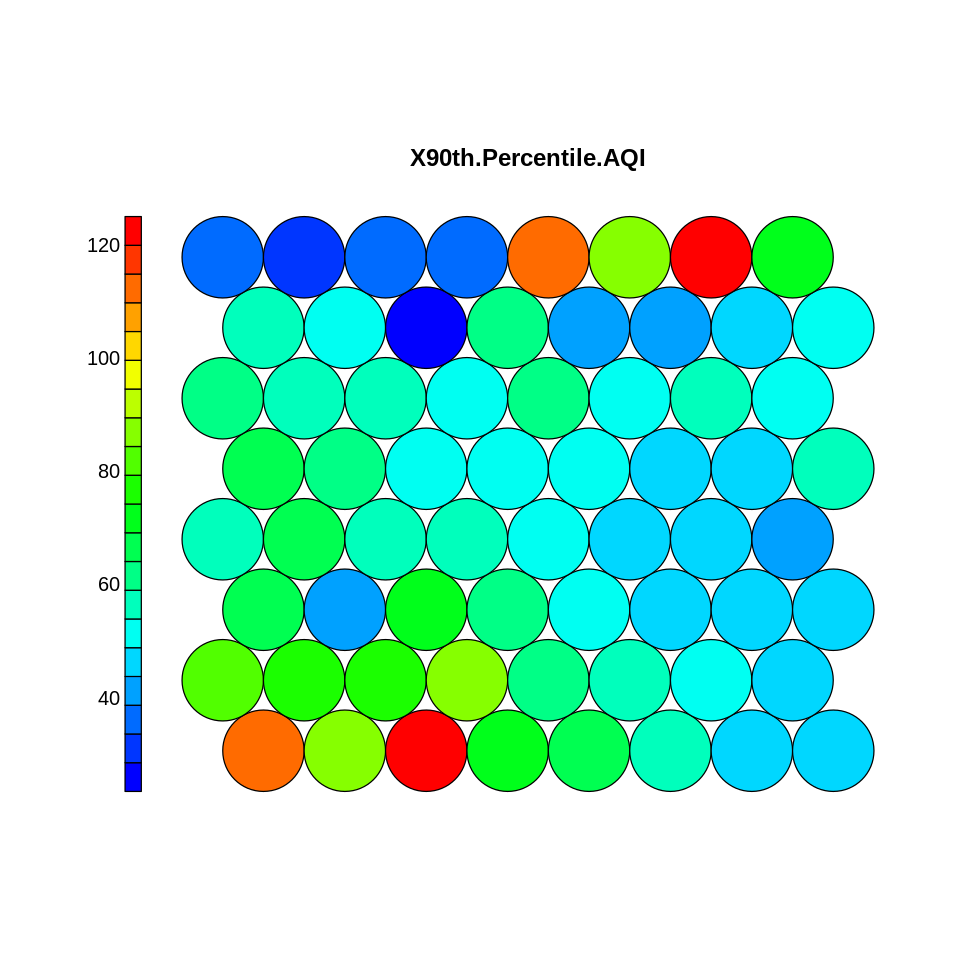

Warning message in bgcolors[!is.na(showcolors)] <- bgcol[showcolors[!is.na(showcolors)]]:
“number of items to replace is not a multiple of replacement length”


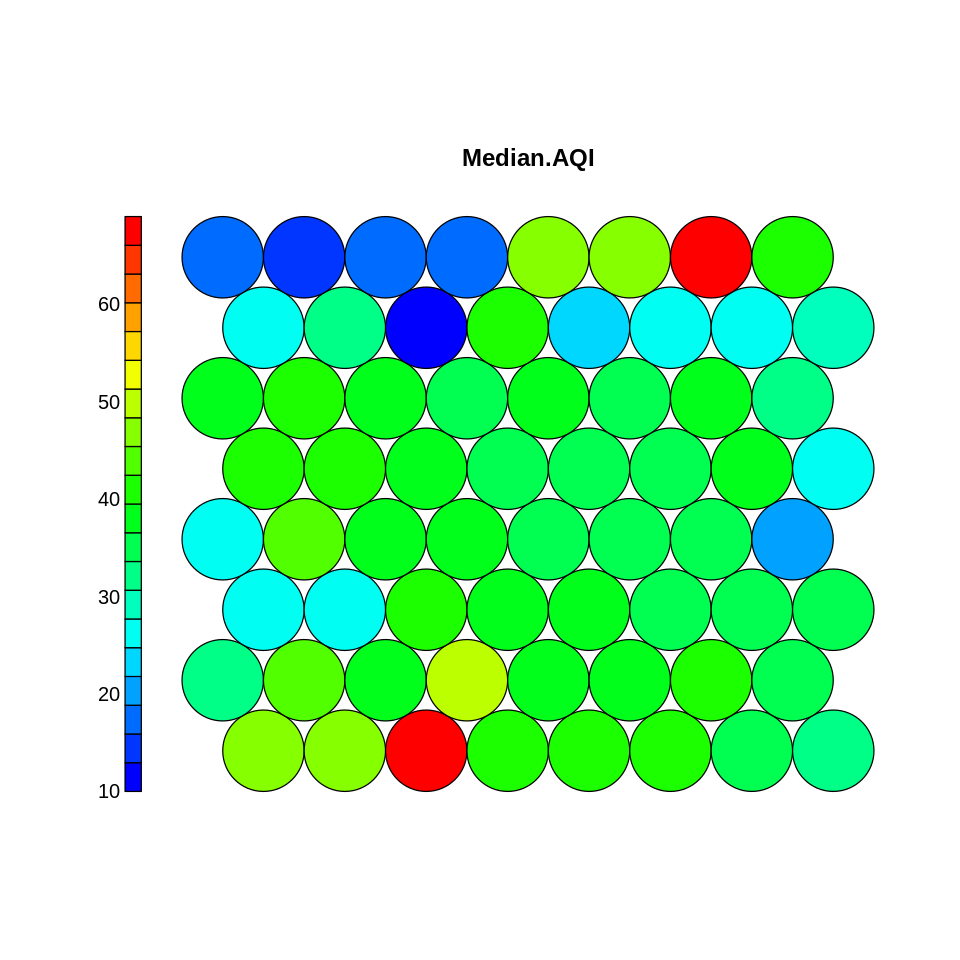

Warning message in bgcolors[!is.na(showcolors)] <- bgcol[showcolors[!is.na(showcolors)]]:
“number of items to replace is not a multiple of replacement length”


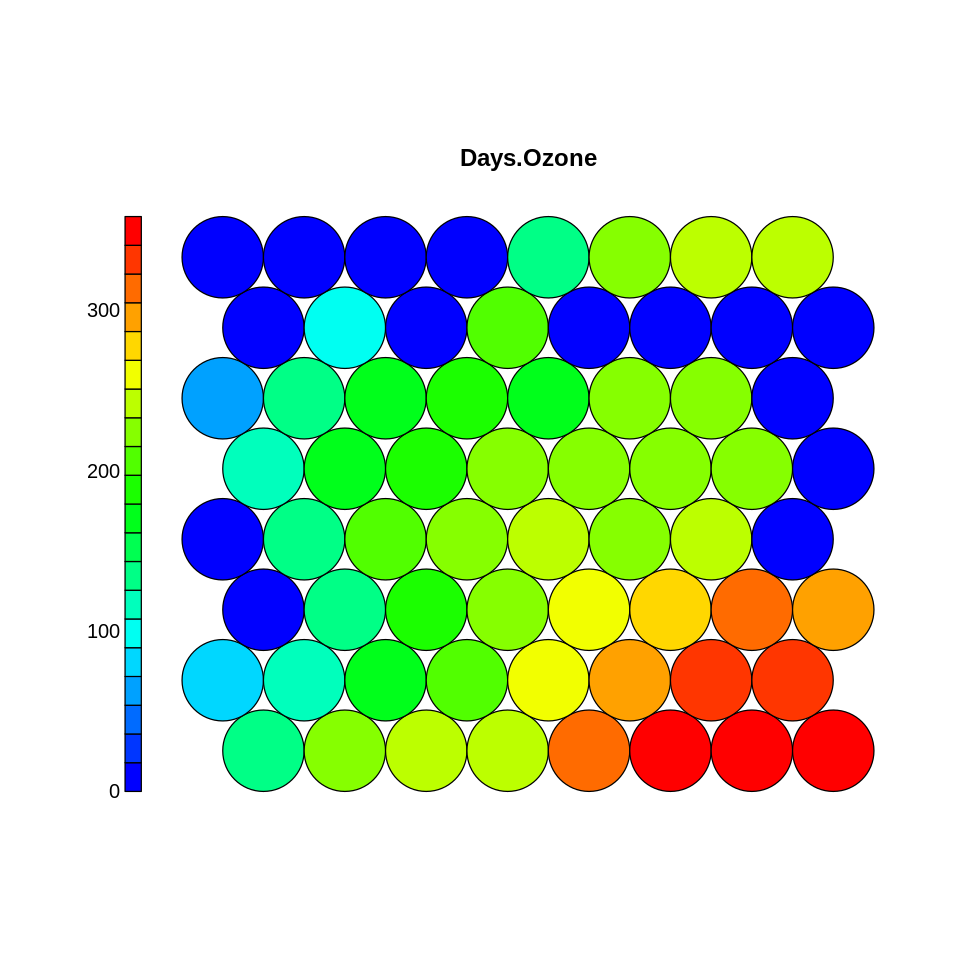

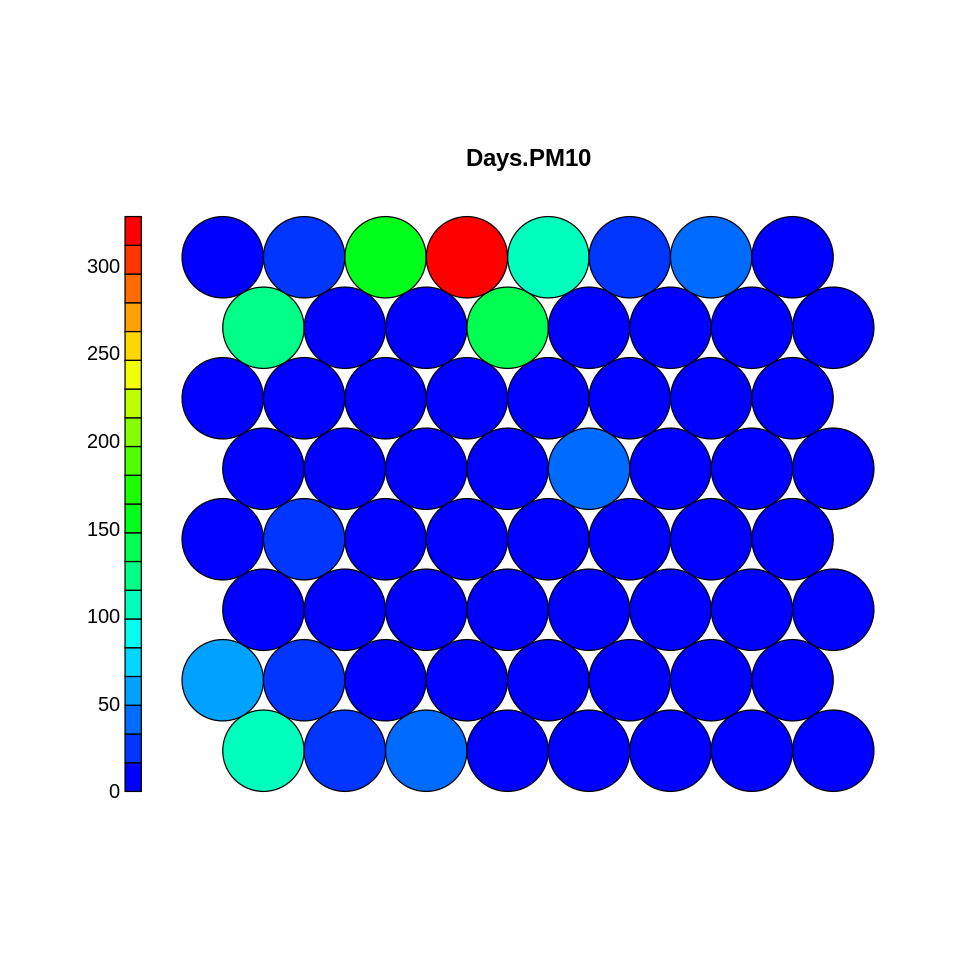

In [ ]:
# Plot heatmap for Max.AQI
var <- "Max.AQI"
var_unscaled <- aggregate(as.numeric(df[, var]),
                          by = list(som_model$unit.classif),
                          FUN = mean, simplify = TRUE)[, 2]
plot(som_model, type = "property", property = var_unscaled,
     main = var, palette.name = coolBlueHotRed)

# Plot heatmap for X90th.Percentile.AQI
var <- "X90th.Percentile.AQI"
var_unscaled <- aggregate(as.numeric(df[, var]),
                          by = list(som_model$unit.classif),
                          FUN = mean, simplify = TRUE)[, 2]
plot(som_model, type = "property", property = var_unscaled,
     main = var, palette.name = coolBlueHotRed)

# Plot heatmap for Median.AQI
var <- "Median.AQI"
var_unscaled <- aggregate(as.numeric(df[, var]),
                          by = list(som_model$unit.classif),
                          FUN = mean, simplify = TRUE)[, 2]
plot(som_model, type = "property", property = var_unscaled,
     main = var, palette.name = coolBlueHotRed)

# Plot heatmap for Days.Ozone
var <- "Days.Ozone"
var_unscaled <- aggregate(as.numeric(df[, var]),
                          by = list(som_model$unit.classif),
                          FUN = mean, simplify = TRUE)[, 2]
plot(som_model, type = "property", property = var_unscaled,
     main = var, palette.name = coolBlueHotRed)

# Plot heatmap for Days.PM10
var <- "Days.PM10"
var_unscaled <- aggregate(as.numeric(df[, var]),
                          by = list(som_model$unit.classif),
                          FUN = mean, simplify = TRUE)[, 2]
plot(som_model, type = "property", property = var_unscaled,
     main = var, palette.name = coolBlueHotRed)

# Clean up
rm(var, var_unscaled)

# Histogram

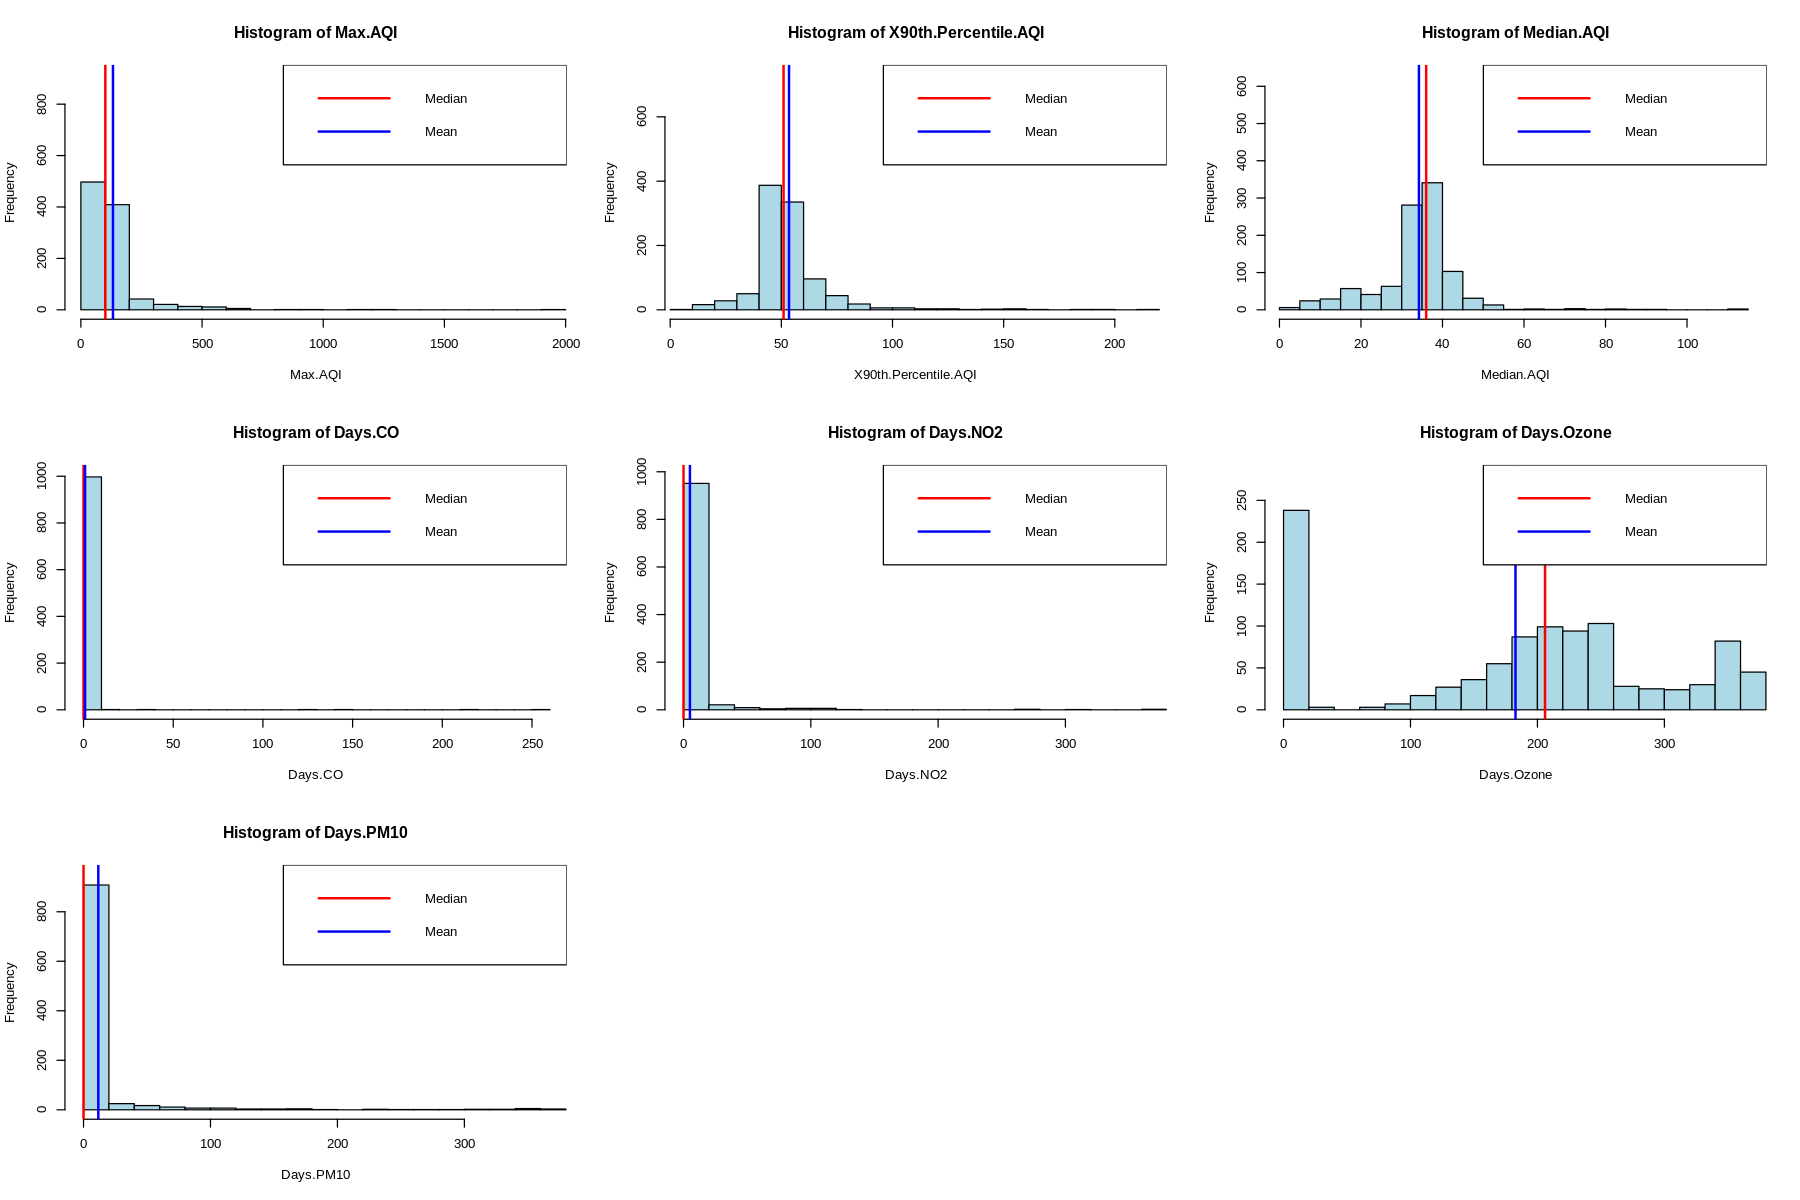

In [ ]:
# Define the attributes for which you want to plot histograms
attributes <- c("Max.AQI", "X90th.Percentile.AQI", "Median.AQI",
                "Days.CO", "Days.NO2", "Days.Ozone", "Days.PM10")

# Set up the layout for the plots
par(mfrow = c(3, 3))

# Set the width and height of the plot window
options(repr.plot.width = 15, repr.plot.height = 10)

# Loop through each attribute and plot histogram against Days.PM2.5
for (attr in attributes) {
  hist(df[[attr]], main = paste("Histogram of", attr), xlab = attr, col = "lightblue",
       breaks = 20, xlim = c(min(df[[attr]]), max(df[[attr]])),
       ylim = c(0, max(hist(df[[attr]], plot = FALSE)$counts) + 10))
  abline(v = median(df[[attr]]), col = "red", lwd = 2)  # Add a line for median
  abline(v = mean(df[[attr]]), col = "blue", lwd = 2)    # Add a line for mean
  legend("topright", legend = c("Median", "Mean"), col = c("red", "blue"), lwd = 2)
}

# Scatter plots

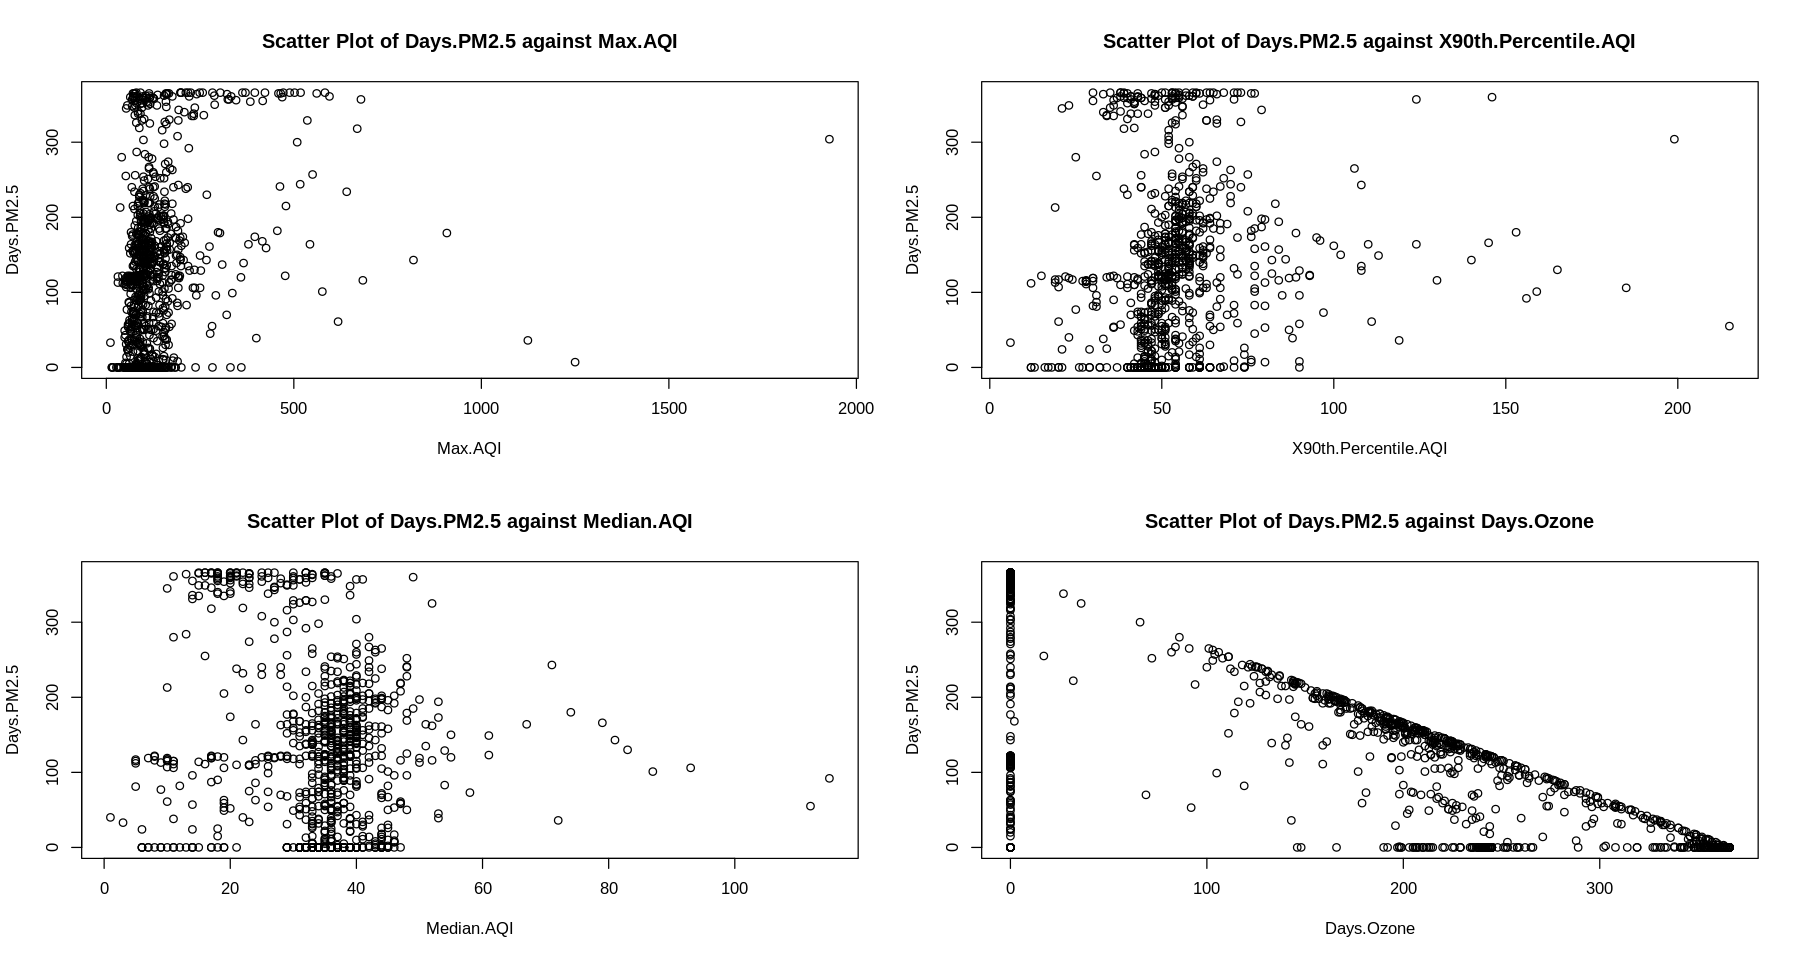

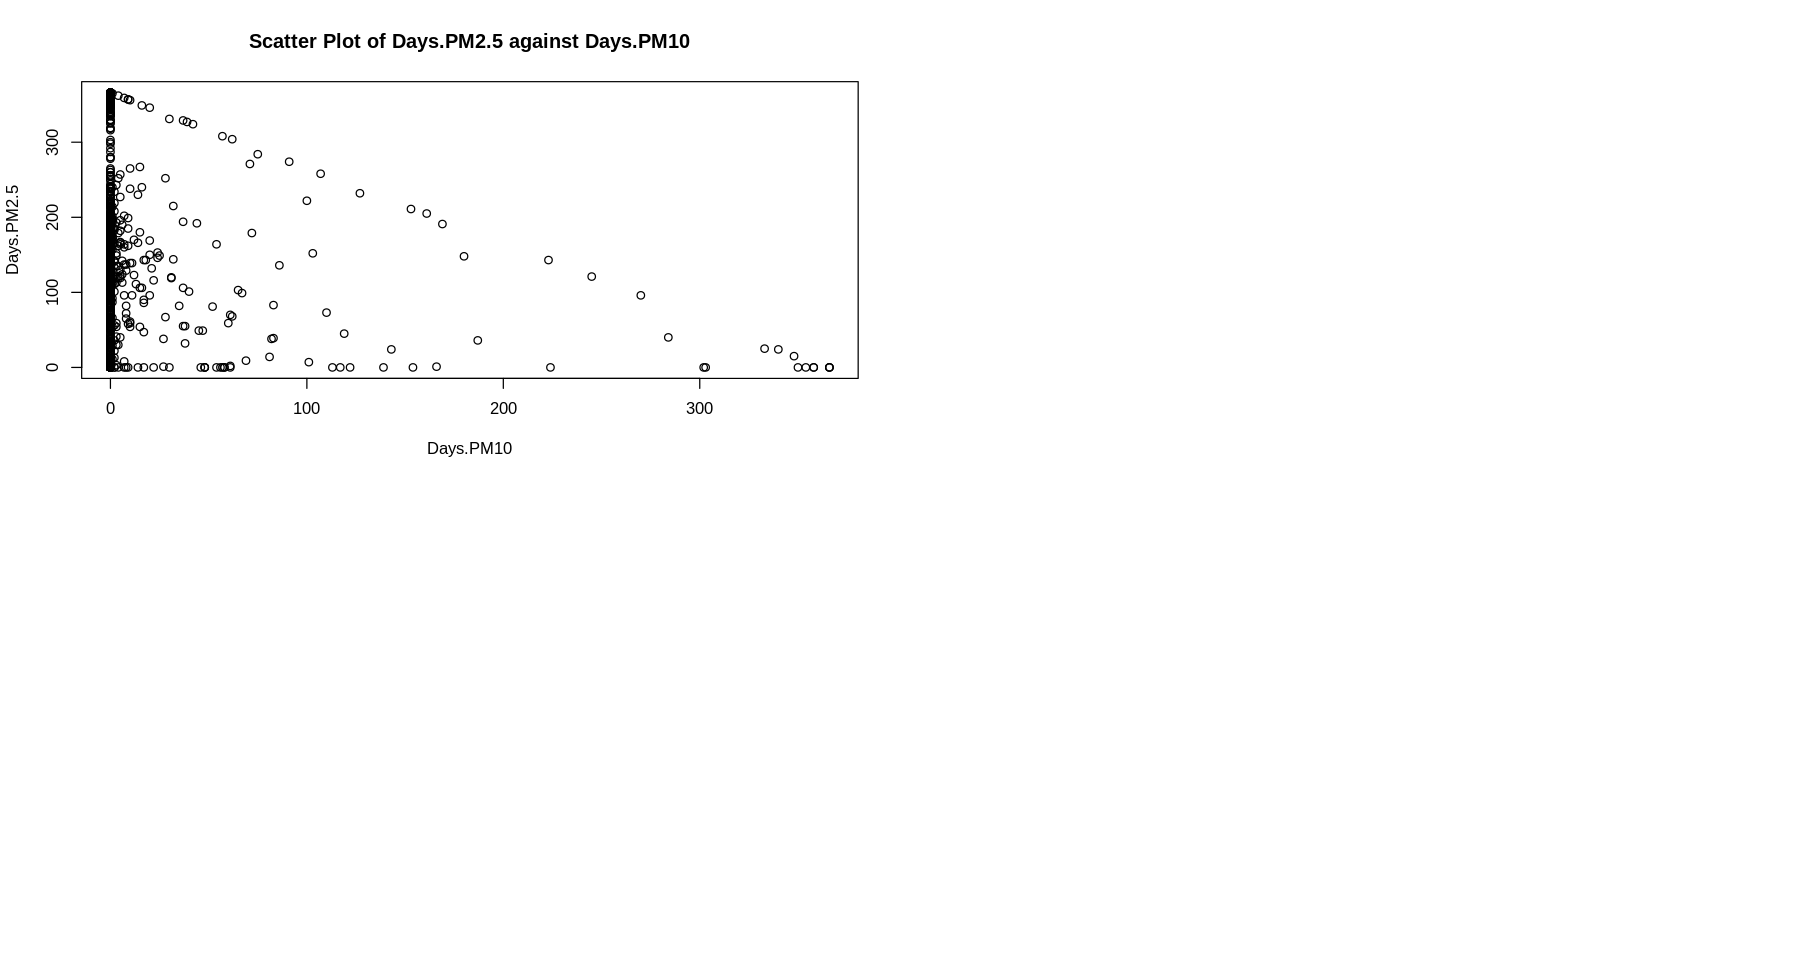

In [ ]:
# Define the attributes for scatter plots
attributes <- c("Max.AQI", "X90th.Percentile.AQI", "Median.AQI", "Days.Ozone", "Days.PM10")

# Set up the layout for the plots
par(mfrow = c(2, 2))

# Set the width and height of the plot window
options(repr.plot.width = 15, repr.plot.height = 8)

# Loop through each attribute and plot scatter plot against Days.PM2.5
for (attr in attributes) {
  plot(df[[attr]], df$Days.PM2.5,
       xlab = attr, ylab = "Days.PM2.5",
       main = paste("Scatter Plot of Days.PM2.5 against", attr))
}


# Splitting Dataset into Training and Testing

In [ ]:
column_names <- names(df)
print(column_names)

 [1] "State"                               "County"                             
 [3] "Year"                                "Days.with.AQI"                      
 [5] "Good.Days"                           "Moderate.Days"                      
 [7] "Unhealthy.for.Sensitive.Groups.Days" "Unhealthy.Days"                     
 [9] "Very.Unhealthy.Days"                 "Hazardous.Days"                     
[11] "Max.AQI"                             "X90th.Percentile.AQI"               
[13] "Median.AQI"                          "Days.CO"                            
[15] "Days.NO2"                            "Days.Ozone"                         
[17] "Days.PM2.5"                          "Days.PM10"                          


In [ ]:
columns_of_interest <- c("Max.AQI", "X90th.Percentile.AQI", "Median.AQI", "Days.CO", "Days.NO2", "Days.Ozone", "Days.PM10", "Days.PM2.5")

#Keep only the columns of interest
df_new <- df[, columns_of_interest]

column_names_new <- names(df_new)
print(column_names_new)

[1] "Max.AQI"              "X90th.Percentile.AQI" "Median.AQI"          
[4] "Days.CO"              "Days.NO2"             "Days.Ozone"          
[7] "Days.PM10"            "Days.PM2.5"          


In [ ]:
set.seed(123)

# Create a vector of indices for splitting (80% training, 20% test)
split_indices <- sample(1:nrow(df_new), 0.8 * nrow(df_new))

# Split the data into training and test sets
train_data <- df_new[split_indices, ]
test_data <- df_new[-split_indices, ]

In [ ]:
# Check dimensions of train and test data
cat("Train data dimensions:", dim(train_data), "\n")
cat("Test data dimensions:", dim(test_data), "\n")

# Check a few rows of train and test data
cat("Sample rows of train data:\n")
print(head(train_data))

cat("Sample rows of test data:\n")
print(head(test_data))

Train data dimensions: 802 8 
Test data dimensions: 201 8 
Sample rows of train data:
    Max.AQI X90th.Percentile.AQI Median.AQI Days.CO Days.NO2 Days.Ozone
415     151                   51         34       0       10        277
463      54                   45         35       0        0        243
179      84                   49         36       0        0        242
526      66                   43         33       0        0        318
195      77                   44         32       0        0        245
938     479                   52         33       0        0        119
    Days.PM10 Days.PM2.5
415         0         79
463         0          0
179         3        120
526         0         48
195         0          0
938        32        215
Sample rows of test data:
   Max.AQI X90th.Percentile.AQI Median.AQI Days.CO Days.NO2 Days.Ozone
1       74                   49         36       0        0        198
3       90                   45         36       0        0        

#testing z score norminalisation for all

In [ ]:
# Creating a vector to indicate whether each column is numeric or not
numerical_columns <- sapply(test_data, is.numeric)

# Scale numerical columns only
test_data_scaled <- scale(test_data[, numerical_columns])
train_data_scaled <- scale(train_data[, numerical_columns])


# Convert the scaled matrix back to a data frame
test_data_scaled <- as.data.frame(test_data_scaled)
train_data_scaled <- as.data.frame(train_data_scaled)

# Training models

# 1. without fine tuning: test_data/train_data
# 2. with fine tuning: test_data_scaled/train_data_scaled
# 3. cv with fine tuning: same as 2.


In [ ]:
install.packages("glmnet")
install.packages("randomForest") #random forest
install.packages("class") #knn
install.packages("naivebayes") #naive bayes
install.packages("caret")
install.packages("kernlab") #support vector regression

library(caret)  #standard linear model evaluation
library(randomForest)
library(class)
library(naivebayes)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘Rcpp’, ‘RcppEigen’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2

Loading required package: lattice

randomForest 4.7-1.1

Type rfNews() to see new features/cha

In linear regression, model accuracy is typically measured using metrics like Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), or R-squared.

Mean Absolute Error (MAE): Measures the average magnitude of the errors in a set of predictions, without considering their direction. Lower values indicate better accuracy.

Root Mean Squared Error (RMSE): Represents the square root of the mean of the squared errors. It gives more weight to large errors and is useful when large errors are particularly undesirable.

R-squared (Coefficient of Determination): R-squared is a statistical measure that represents the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where 0 indicates that the model does not explain any variability in the dependent variable, and 1 indicates that the model explains all the variability. A higher R-squared value indicates a better fit of the model to the data.

However, R-squared does not indicate whether the coefficient estimates and predictions are biased, which is why it's often used in conjunction with other metrics like MAE and RMSE.

## Standard Linear Model

In [ ]:
#Standard Linear Model

# Create linear model using all variables except Days.PM2.5 as predictors
lm_model <- lm(Days.PM2.5 ~ ., data = train_data)

# Make predictions
predictions <- predict(lm_model, test_data)

# Create a results data frame
results <- data.frame(Actual = test_data$Days.PM2.5, Predicted = predictions)

# Evaluate the model
# Calculate Mean Absolute Error (MAE) & Root Mean Squared Error (RMSE)
mae <- mean(abs(results$Actual - results$Predicted))
rmse <- sqrt(mean((results$Actual - results$Predicted)^2))
rsq <- summary(lm_model)$r.squared


# Display the MSE & RMSE
print(paste("RMSE:", rmse, "R-Squared:", rsq, "MAE:", mae))


[1] "RMSE: 67.1600438477215 R-Squared: 0.635490816532567 MAE: 51.5601803078573"


#with scaling

In [ ]:
#Standard Linear Model

# Create linear model using all variables except Days.PM2.5 as predictors
lm_model <- lm(Days.PM2.5 ~ ., data = train_data_scaled)

# Make predictions
predictions <- predict(lm_model, test_data_scaled)

# Create a results data frame
results <- data.frame(Actual = test_data_scaled$Days.PM2.5, Predicted = predictions)

# Evaluate the model
# Calculate Mean Absolute Error (MAE) & Root Mean Squared Error (RMSE)
mae <- mean(abs(results$Actual - results$Predicted))
rmse <- sqrt(mean((results$Actual - results$Predicted)^2))
rsq <- summary(lm_model)$r.squared


# Display the MSE & RMSE
print(paste("RMSE:", rmse, "R-Squared:", rsq, "MAE:", mae))


[1] "RMSE: 0.592576796603483 R-Squared: 0.635490816532567 MAE: 0.435482227771749"


### Performance evaluation of Standard Linear Model

***Why 10-fold chosen for this dataset of about 1000 rows?***

**Sufficient Data in Each Fold:** With 1000 rows and 10 folds, each fold will have 100 samples. This is generally considered a reasonable amount of data for training a model and evaluating its performance.

**Reduced Variance:** By averaging the results of 10 different test sets (each representing 10% of the data), the variability in the estimate of the model's performance is reduced compared to using just one test set.

**Robustness:** 10-fold cross-validation provides a more robust estimate of model performance compared to simpler methods like holdout validation (where you split the data into a single train/test set) because it uses multiple test sets.

#cross-validation with scaling

In [ ]:
# @title Default title text
# Performance evaluation of Standard Linear Model with cross-validation

# Define the training control for 10-fold cross-validation
train_control <- trainControl(method="cv", number=10)

# Train the linear model using cross-validation
lm_model_cv <- train(Days.PM2.5 ~ ., data=train_data_scaled, method="lm", trControl=train_control)

# Print the model
print(lm_model_cv)

# Make predictions on the test data using the cross-validated model
lm_predictions_cv <- predict(lm_model_cv, newdata=test_data_scaled)


In [ ]:
# Display values after cross-validation
print(paste("RMSE:", lm_model_cv$results$RMSE , "R-Squared:",lm_model_cv$results$Rsquared, "MAE:",lm_model_cv$results$MAE))


[1] "RMSE: 0.614507872426023 R-Squared: 0.629059777905145 MAE: 0.468971809422633"


##Random Forest

In [ ]:
# packages needed for mae
install.packages("Metrics")
library(Metrics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘Metrics’


The following objects are masked from ‘package:caret’:

    precision, recall




In [ ]:
#Random Forest
rf_model <- randomForest(Days.PM2.5 ~ ., data = train_data)

observed <- test_data$Days.PM2.5

predictions <- predict(rf_model, test_data)

# Calculate R-squared
r_squared <- 1 - (sum((observed - predictions)^2) / sum((observed - mean(observed))^2))
cat("R-squared:", r_squared, "\n")

# Calculate Mean Absolute Error (MAE)
mae_value <- mae(observed, predictions)
cat("Mean Absolute Error (MAE):", mae_value, "\n")

# Calculate Root Mean Squared Error (RMSE)
rmse_value <- sqrt(mean((observed - predictions)^2))
cat("Root Mean Squared Error (RMSE):", rmse_value, "\n")
print(paste("RMSE:", rmse_value, "R-Squared:", r_squared, "MAE:", mae_value))

R-squared: 0.703268 
Mean Absolute Error (MAE): 37.34754 
Root Mean Squared Error (RMSE): 61.22431 
[1] "RMSE: 61.2243062731118 R-Squared: 0.703268034714235 MAE: 37.3475373251766"


Fine tuning below uses feature scaling, Z-score normalisation

In [ ]:
#Fine tuning (Random forest)

# Creating a vector to indicate whether each column is numeric or not
numerical_columns <- sapply(test_data, is.numeric)

# Scale numerical columns only
test_data_scaled <- scale(test_data[, numerical_columns])
train_data_scaled <- scale(train_data[, numerical_columns])

# Convert the scaled matrix back to a data frame
test_data_scaled <- as.data.frame(test_data_scaled)
train_data_scaled <- as.data.frame(train_data_scaled)

# Train the Random Forest model
rf_model <- randomForest(Days.PM2.5 ~ ., data = train_data_scaled)

# Make predictions on the scaled test data
predictions <- predict(rf_model, test_data_scaled)

# Calculate R-squared, MAE, RMSE
r_squared <- 1 - (sum((test_data_scaled$Days.PM2.5 - predictions)^2) /
  sum((test_data_scaled$Days.PM2.5 - mean(test_data_scaled$Days.PM2.5))^2))
mae_value <- mean(abs(test_data_scaled$Days.PM2.5 - predictions))
rmse_value <- sqrt(mean((test_data_scaled$Days.PM2.5 - predictions)^2))

print(paste("RMSE:", rmse_value, "R-Squared:", r_squared, "MAE:", mae_value))

R-squared: 0.7028989 
Mean Absolute Error (MAE): 0.361047 
Root Mean Squared Error (RMSE): 0.5437122 
[1] "RMSE: 0.543712193176581 R-Squared: 0.702898936246068 MAE: 0.361046965418065"


Performance Evaluation of Random Forest using Cross Validation

In [ ]:
# Set up control parameters for cross-validation
ctrl <- trainControl(method = "cv", number = 10)

# Define the training formula
formula <- Days.PM2.5 ~ .

# Train the Random Forest model with cross-validation
rf_model <- train(formula, data = train_data_scaled, method = "rf", trControl = ctrl)

# Make predictions on the scaled test data
predictions <- predict(rf_model, newdata = test_data_scaled)

# Calculate R-squared
r_squared <- 1 - (sum((test_data_scaled$Days.PM2.5 - predictions)^2) / sum((test_data_scaled$Days.PM2.5 - mean(test_data_scaled$Days.PM2.5))^2))
cat("R-squared:", r_squared, "\n")

# Calculate Mean Absolute Error (MAE)
mae_value <- mean(abs(test_data_scaled$Days.PM2.5 - predictions))
cat("Mean Absolute Error (MAE):", mae_value, "\n")

# Calculate Root Mean Squared Error (RMSE)
rmse_value <- sqrt(mean((test_data_scaled$Days.PM2.5 - predictions)^2))
cat("Root Mean Squared Error (RMSE):", rmse_value, "\n")

print(paste("RMSE:", rmse_value, "R-Squared:", r_squared, "MAE:", mae_value))

R-squared: 0.7266426 
Mean Absolute Error (MAE): 0.3291648 
Root Mean Squared Error (RMSE): 0.5215337 
[1] "RMSE: 0.521533726922444 R-Squared: 0.726642584540798 MAE: 0.329164816600544"


Performance of Random Forest using OOB

OOB Error provides an estimate of how well your random forest model is likely to perform on new, unseen data, without the need for a separate validation set. A lower RMSE indicates better model performance, meaning that, on average, the predictions are closer to the actual values for the observations that were not part of the training bootstrap samples.

In [ ]:
# Train the Random Forest model with OOB error
rf_model <- randomForest(Days.PM2.5 ~ ., data = train_data_scaled,
proximity = TRUE, importance = TRUE)

# OOB predictions
oob_predictions <- predict(rf_model, train_data_scaled, type = "response")

# OOB error calculation
oob_error <- sqrt(mean((train_data_scaled$Days.PM2.5 - oob_predictions)^2))
cat("Out-of-Bag Error (RMSE):", oob_error, "\n")

# Make predictions on the scaled test data
predictions <- predict(rf_model, test_data_scaled)

# Calculate R-squared
r_squared <- 1 - (sum((test_data_scaled$Days.PM2.5 - predictions)^2) / sum((test_data_scaled$Days.PM2.5 - mean(test_data_scaled$Days.PM2.5))^2))
cat("R-squared:", r_squared, "\n")

# Calculate Mean Absolute Error (MAE)
mae_value <- mean(abs(test_data_scaled$Days.PM2.5 - predictions))
cat("Mean Absolute Error (MAE):", mae_value, "\n")

# Calculate Root Mean Squared Error (RMSE)
rmse_value <- sqrt(mean((test_data_scaled$Days.PM2.5 - predictions)^2))
cat("Root Mean Squared Error (RMSE):", rmse_value, "\n")

print(paste("RMSE:", rmse_value, "R-Squared:", r_squared, "MAE:", mae_value))

Out-of-Bag Error (RMSE): 0.2577916 
R-squared: 0.7030193 
Mean Absolute Error (MAE): 0.3581369 
Root Mean Squared Error (RMSE): 0.5436021 
[1] "RMSE: 0.543602051227174 R-Squared: 0.703019293951117 MAE: 0.358136907156244"


Testing

In [ ]:
library(randomForest)
library(Metrics)
library(caret)

# Define control parameters for cross-validation
ctrl <- trainControl(method = "cv", number = 5)

# Specify preprocessing steps (scaling)
preprocess <- c("center", "scale")

# Create a grid of hyperparameter values
param_grid <- expand.grid(
  mtry = c(2, 3, 4, 6)
)

# Train Random Forest model with cross-validation and hyperparameter tuning
rf_model <- train(
  Days.PM2.5 ~ .,
  data = train_data,
  method = "rf",
  trControl = ctrl,
  tuneGrid = param_grid,  # Hyperparameter grid
  preProcess = preprocess,  # Apply scaling
  ntree = 500
)

# Extract observed values from the test set
observed <- test_data$Days.PM2.5

# Make predictions using the Random Forest model
predictions <- predict(rf_model, newdata = test_data)

# Calculate R-squared
r_squared <- 1 - sum((observed - predictions)^2) / sum((observed - mean(observed))^2)
cat("R-squared:", r_squared, "\n")

# Calculate Mean Absolute Error (MAE)
mae_value <- mae(observed, predictions)
cat("Mean Absolute Error (MAE):", mae_value, "\n")

# Calculate Root Mean Squared Error (RMSE)
rmse_value <- sqrt(mean((observed - predictions)^2))
cat("Root Mean Squared Error (RMSE):", rmse_value, "\n")

print(paste("RMSE:", rmse_value, "R-Squared:", r_squared, "MAE:", mae_value))

# Display best hyperparameters and corresponding performance
cat("Best Hyperparameters:\n")
print(rf_model$bestTune)

# Display cross-validation results
cat("Cross-Validated MAE:", min(rf_model$results$MAE), "\n")
cat("Cross-Validated RMSE:", min(rf_model$results$RMSE), "\n")


R-squared: 0.7110738 
Mean Absolute Error (MAE): 34.94844 
Root Mean Squared Error (RMSE): 60.41366 
[1] "RMSE: 60.4136635470045 R-Squared: 0.711073795545602 MAE: 34.9484439029982"
Best Hyperparameters:
  mtry
2    3
Cross-Validated MAE: 30.26918 
Cross-Validated RMSE: 48.90265 


In [ ]:
# After z norminalisation n fine tuning
library(randomForest)
library(Metrics)
library(caret)

# Define control parameters without cross-validation
ctrl <- trainControl(method = "none")

# Specify preprocessing steps (scaling)
preprocess <- c("center")

# Create a grid of hyperparameter values
param_grid <- expand.grid(
  mtry = c(2, 3, 4, 6)
)

# Train Random Forest model without cross-validation
rf_model <- train(
  Days.PM2.5 ~ .,
  data = train_data_scaled,
  method = "rf",
  tuneGrid = param_grid,  # Hyperparameter grid
  ntree = 500
)

# Extract observed values from the test set
observed <- test_data_scaled$Days.PM2.5

# Make predictions using the Random Forest model
predictions <- predict(rf_model, newdata = test_data_scaled)

# Calculate R-squared
r_squared <- 1 - sum((observed - predictions)^2) / sum((observed - mean(observed))^2)
cat("R-squared:", r_squared, "\n")

# Calculate Mean Absolute Error (MAE)
mae_value <- mae(observed, predictions)
cat("Mean Absolute Error (MAE):", mae_value, "\n")

# Calculate Root Mean Squared Error (RMSE)
rmse_value <- sqrt(mean((observed - predictions)^2))
cat("Root Mean Squared Error (RMSE):", rmse_value, "\n")

print(paste("RMSE:", rmse_value, "R-Squared:", r_squared, "MAE:", mae_value))

# Display best hyperparameters and corresponding performance
cat("Best Hyperparameters:\n")
print(rf_model$bestTune)


R-squared: 0.7164608 
Mean Absolute Error (MAE): 0.3385497 
Root Mean Squared Error (RMSE): 0.5311578 
[1] "RMSE: 0.531157791558167 R-Squared: 0.716460757469386 MAE: 0.338549708365587"
Best Hyperparameters:
  mtry
2    3


In [ ]:
# After Z norminalisaton with cross validation

library(randomForest)
library(Metrics)
library(caret)

# Define control parameters for cross-validation
ctrl <- trainControl(method = "cv", number = 5)

# Specify preprocessing steps
preprocess <- c("center")

# Create a grid of hyperparameter values
param_grid <- expand.grid(
  mtry = c(2, 3, 4, 6)
)

# Train Random Forest model with cross-validation
rf_model <- train(
  Days.PM2.5 ~ .,
  data = train_data_scaled,
  method = "rf",
  trControl = ctrl,
  tuneGrid = param_grid,  # Hyperparameter grid
  preProcess = preprocess,  # Apply scaling
  ntree = 500
)

# Extract observed values from the test set
observed <- test_data_scaled$Days.PM2.5

# Make predictions using the Random Forest model
predictions <- predict(rf_model, newdata = test_data_scaled)

# Calculate R-squared
r_squared <- 1 - sum((observed - predictions)^2) / sum((observed - mean(observed))^2)
cat("R-squared:", r_squared, "\n")

# Calculate Mean Absolute Error (MAE)
mae_value <- mae(observed, predictions)
cat("Mean Absolute Error (MAE):", mae_value, "\n")

# Calculate Root Mean Squared Error (RMSE)
rmse_value <- sqrt(mean((observed - predictions)^2))
cat("Root Mean Squared Error (RMSE):", rmse_value, "\n")

print(paste("RMSE:", rmse_value, "R-Squared:", r_squared, "MAE:", mae_value))

# Display best hyperparameters and corresponding performance
cat("Best Hyperparameters:\n")
print(rf_model$bestTune)

# Display cross-validation results
cat("Cross-Validated MAE:", min(rf_model$results$MAE), "\n")
cat("Cross-Validated RMSE:", min(rf_model$results$RMSE), "\n")


R-squared: 0.7291447 
Mean Absolute Error (MAE): 0.3285833 
Root Mean Squared Error (RMSE): 0.5191414 
[1] "RMSE: 0.519141379633262 R-Squared: 0.729144689092236 MAE: 0.328583255116762"
Best Hyperparameters:
  mtry
3    4
Cross-Validated MAE: 0.2747163 
Cross-Validated RMSE: 0.4440818 


In [ ]:
# After z norminalisation n fine tuning
library(randomForest)
library(Metrics)
library(caret)

# Define control parameters without cross-validation
ctrl <- trainControl(method = "none")

# Specify preprocessing steps (scaling)
preprocess <- c("center")

# Create a grid of hyperparameter values
param_grid <- expand.grid(
  mtry = c(2, 3, 4, 6)
)

# Train Random Forest model without cross-validation
rf_model <- train(
  Days.PM2.5 ~ .,
  data = train_data_scaled,
  method = "rf",
  tuneGrid = param_grid,  # Hyperparameter grid
  ntree = 500
)

# OOB predictions
oob_predictions <- predict(rf_model, train_data_scaled, type = "response")

# OOB error calculation
oob_error <- sqrt(mean((train_data_scaled$Days.PM2.5 - oob_predictions)^2))
cat("Out-of-Bag Error (RMSE):", oob_error, "\n")

# Extract observed values from the test set
observed <- test_data_scaled$Days.PM2.5

# Make predictions using the Random Forest model
predictions <- predict(rf_model, newdata = test_data_scaled)

# Calculate R-squared
r_squared <- 1 - sum((observed - predictions)^2) / sum((observed - mean(observed))^2)
cat("R-squared:", r_squared, "\n")

# Calculate Mean Absolute Error (MAE)
mae_value <- mae(observed, predictions)
cat("Mean Absolute Error (MAE):", mae_value, "\n")

# Calculate Root Mean Squared Error (RMSE)
rmse_value <- sqrt(mean((observed - predictions)^2))
cat("Root Mean Squared Error (RMSE):", rmse_value, "\n")

print(paste("RMSE:", rmse_value, "R-Squared:", r_squared, "MAE:", mae_value))

# Display best hyperparameters and corresponding performance
cat("Best Hyperparameters:\n")
print(rf_model$bestTune)


ERROR: Error in predict.train(rf_model, train_data_scaled, type = "response"): type must be either "raw" or "prob"


In [ ]:
library(randomForest)
library(Metrics)

# Specify preprocessing steps (scaling)
preprocess <- c("center")

# Create a grid of hyperparameter values
param_grid <- expand.grid(
  mtry = c(2, 3, 4, 6)
)

# Train Random Forest model
rf_model <- randomForest(
  Days.PM2.5 ~ .,
  data = train_data_scaled,
  tuneGrid = param_grid,  d
  ntree = 500
)

# OOB predictions
oob_predictions <- predict(rf_model, newdata = train_data_scaled)

# OOB error calculation
oob_error <- sqrt(mean((train_data_scaled$Days.PM2.5 - oob_predictions)^2))
cat("Out-of-Bag Error (RMSE):", oob_error, "\n")

# Extract observed values from the test set
observed <- test_data_scaled$Days.PM2.5

# Make predictions using the Random Forest model
predictions <- predict(rf_model, newdata = test_data_scaled)

# Calculate R-squared
r_squared <- 1 - sum((observed - predictions)^2) / sum((observed - mean(observed))^2)
cat("R-squared:", r_squared, "\n")

# Calculate Mean Absolute Error (MAE)
mae_value <- mae(observed, predictions)
cat("Mean Absolute Error (MAE):", mae_value, "\n")

# Calculate Root Mean Squared Error (RMSE)
rmse_value <- sqrt(mean((observed - predictions)^2))
cat("Root Mean Squared Error (RMSE):", rmse_value, "\n")

print(paste("RMSE:", rmse_value, "R-Squared:", r_squared, "MAE:", mae_value))

# Display best hyperparameters (not applicable for randomForest)
cat("Best Hyperparameters:\n")
print("Not applicable for randomForest")


Out-of-Bag Error (RMSE): 0.2567368 
R-squared: 0.7062801 
Mean Absolute Error (MAE): 0.3569166 
Root Mean Squared Error (RMSE): 0.5406094 
[1] "RMSE: 0.540609444661512 R-Squared: 0.706280135484486 MAE: 0.356916631496958"
Best Hyperparameters:
[1] "Not applicable for randomForest"


## KNN

In [ ]:
#KNN

column_names <- colnames(train_data_scaled)
print(column_names)

knn_model <- knn(train = train_data[, -8], test = test_data[, -8], cl = train_data$Days.PM2.5, k = 3)

# Convert factor variables to numeric
knn_model_numeric <- as.numeric(as.character(knn_model))
actual_values_numeric <- as.numeric(as.character(test_data$Days.PM2.5))

# Check if there are any missing values
if (any(is.na(knn_model_numeric)) || any(is.na(actual_values_numeric))) {
  stop("Missing values detected. Please handle missing values before calculating MAE and RMSE.")
}

# R-square
r_squared <- 1 - sum((actual_values_numeric - knn_model_numeric)^2) / sum((actual_values_numeric - mean(actual_values_numeric))^2)
cat("R-squared:", r_squared, "\n")

# Calculate MAE and RMSE
mae <- mean(abs(knn_model_numeric - actual_values_numeric), na.rm = TRUE)
rmse <- sqrt(mean((knn_model_numeric - actual_values_numeric)^2, na.rm = TRUE))

# Print MAE and RMSE
print(paste("Mean Absolute Error (MAE):", mae))
print(paste("Root Mean Squared Error (RMSE):", rmse))

print(paste("RMSE:", rmse, "R-Squared:", r_squared, "MAE:", mae))

[1] "Max.AQI"              "X90th.Percentile.AQI" "Median.AQI"          
[4] "Days.CO"              "Days.NO2"             "Days.Ozone"          
[7] "Days.PM10"            "Days.PM2.5"          
R-squared: 0.641414 
[1] "Mean Absolute Error (MAE): 34.2238805970149"
[1] "Root Mean Squared Error (RMSE): 67.3036114885597"
[1] "RMSE: 67.3036114885597 R-Squared: 0.641414003820286 MAE: 34.2238805970149"


KNN performance evaluation using cross validation

In [ ]:
# Define the control parameters for the cross-validation
ctrl <- trainControl(method = "cv", number = 10)  # 10-fold cross-validation

# Create a KNN model using the train function from the 'caret' package
knn_model <- train(
  x = train_data[, -8],  # Features
  y = train_data$Days.PM2.5,  # Target variable
  method = "knn",  # Specify the method
  trControl = ctrl,  # Use the defined control parameters
  preProcess = c("center", "scale")  # Standardize the features
)

# Make predictions on the test set
knn_predictions <- predict(knn_model, newdata = test_data[, -8])

# Calculate R-squared
r_squared <- 1 - sum((test_data$Days.PM2.5 - knn_predictions)^2) / sum((test_data$Days.PM2.5 - mean(test_data$Days.PM2.5))^2)
cat("R-squared:", r_squared, "\n")

# Calculate MAE and RMSE
mae <- mean(abs(test_data$Days.PM2.5 - knn_predictions))
rmse <- sqrt(mean((test_data$Days.PM2.5 - knn_predictions)^2))

# Print MAE and RMSE
print(paste("Mean Absolute Error (MAE):", mae))
print(paste("Root Mean Squared Error (RMSE):", rmse))

R-squared: 0.7083502 
[1] "Mean Absolute Error (MAE): 37.4281158311009"
[1] "Root Mean Squared Error (RMSE): 60.6977471099822"


###With z score scaling

In [ ]:
#KNN
knn_model <- knn(train = train_data_scaled[, -8], test = test_data_scaled[, -8],
cl = train_data_scaled$Days.PM2.5, k = 3)

# Convert factor variables to numeric
knn_model_numeric <- as.numeric(as.character(knn_model))
actual_values_numeric <- as.numeric(as.character(test_data_scaled$Days.PM2.5))

# Calculate R-square, MAE, and RMSE
r_squared <- 1 - sum((actual_values_numeric - knn_model_numeric)^2) /
  sum((actual_values_numeric - mean(actual_values_numeric))^2)
mae <- mean(abs(knn_model_numeric - actual_values_numeric), na.rm = TRUE)
rmse <- sqrt(mean((knn_model_numeric - actual_values_numeric)^2, na.rm = TRUE))

cat("R-squared:", r_squared, "\n")
print(paste("Mean Absolute Error (MAE):", mae))
print(paste("Root Mean Squared Error (RMSE):", rmse))

print(paste("RMSE:", rmse, "R-Squared:", r_squared, "MAE:", mae))

R-squared: 0.5642087 
[1] "Mean Absolute Error (MAE): 0.377439485138897"
[1] "Root Mean Squared Error (RMSE): 0.65850069317575"
[1] "RMSE: 0.65850069317575 R-Squared: 0.564208721272493 MAE: 0.377439485138897"


In [ ]:
# Define the control parameters for the cross-validation
ctrl <- trainControl(method = "cv", number = 10)  # 10-fold cross-validation

# Create a KNN model using the train function from the 'caret' package
knn_model <- train(
  x = train_data_scaled[, -8],  # Features
  y = train_data_scaled$Days.PM2.5,  # Target variable
  method = "knn",  # Specify the method
  trControl = ctrl,  # Use the defined control parameters
  preProcess = c("center")  # Standardize the features
)

# Make predictions on the test set
knn_predictions <- predict(knn_model, newdata = test_data_scaled[, -8])

# Calculate R-squared
r_squared <- 1 - sum((test_data_scaled$Days.PM2.5 - knn_predictions)^2) /
  sum((test_data_scaled$Days.PM2.5 - mean(test_data_scaled$Days.PM2.5))^2)
cat("R-squared:", r_squared, "\n")

# Calculate MAE and RMSE
mae <- mean(abs(test_data_scaled$Days.PM2.5 - knn_predictions))
rmse <- sqrt(mean((test_data_scaled$Days.PM2.5 - knn_predictions)^2))

# Print MAE and RMSE
print(paste("Mean Absolute Error (MAE):", mae))
print(paste("Root Mean Squared Error (RMSE):", rmse))

print(paste("RMSE:", rmse, "R-Squared:", r_squared, "MAE:", mae))

R-squared: 0.6766297 
[1] "Mean Absolute Error (MAE): 0.356395755167153"
[1] "Root Mean Squared Error (RMSE): 0.567240201377081"
[1] "RMSE: 0.567240201377081 R-Squared: 0.676629746711397 MAE: 0.356395755167153"


#testing

In [ ]:
library(caret)

# Define the control parameters for cross-validation
ctrl <- trainControl(method = "cv", number = 10)

# Create a grid of k values to search
k_values <- seq(1, 20, by = 1)

# Store results for each k value
results <- numeric(length(k_values))

# Loop through different k values
for (i in seq_along(k_values)) {
  knn_model <- knn(train = train_data_scaled[, -8],
                   test = test_data_scaled[, -8],
                   cl = train_data_scaled$Days.PM2.5,
                   k = k_values[i])

  # Calculate R-squared for each k value
  knn_predictions <- as.numeric(as.character(knn_model))
  r_squared <- 1 - sum((actual_values_numeric - knn_predictions)^2) /
    sum((actual_values_numeric - mean(actual_values_numeric))^2)

  results[i] <- r_squared
}

# Find the k value with the highest R-squared
best_k <- k_values[which.max(results)]

# Print the best k value and its corresponding R-squared
cat("Best k value:", best_k, "\n")

# Train the final KNN model with the best k value
final_knn_model <- knn(
  train = train_data[, -8],
  test = test_data_scaled[, -8],
  cl = train_data_scaled$Days.PM2.5,
  k = best_k
)

# Make predictions on the test set
knn_predictions <- as.numeric(as.character(final_knn_model))
actual_values_numeric <- as.numeric(as.character(test_data_scaled$Days.PM2.5))

# Calculate R-square, MAE, and RMSE
mae <- mean(abs(knn_predictions - actual_values_numeric), na.rm = TRUE)
rmse <- sqrt(mean((knn_predictions - actual_values_numeric)^2, na.rm = TRUE))

# Print performance metrics
cat("R-squared:", results[which.max(results)], "\n")
print(paste("Mean Absolute Error (MAE):", mae))
print(paste("Root Mean Squared Error (RMSE):", rmse))


Best k value: 5 
R-squared: 0.5930241 
[1] "Mean Absolute Error (MAE): 0.818649723132814"
[1] "Root Mean Squared Error (RMSE): 1.08795496422288"


## Support Vector Regression (SVR) Model

without scaling

In [ ]:
# Load the necessary library for SVR
library(e1071)

# Create SVR model using all variables except Days.PM2.5 as predictors
svr_model <- svm(Days.PM2.5 ~ ., data = train_data)

# Make predictions
predictions <- predict(svr_model, test_data)

# Create a results data frame
results <- data.frame(Actual = test_data$Days.PM2.5, Predicted = predictions)

# Evaluate the model
# Calculate Mean Absolute Error (MAE) & Root Mean Squared Error (RMSE)
mae <- mean(abs(results$Actual - results$Predicted))
rmse <- sqrt(mean((results$Actual - results$Predicted)^2))
rsq <- cor(results$Actual, results$Predicted)^2

# Display the RMSE & R-squared
print(paste("RMSE:", rmse, "R-Squared:", rsq, "MAE:", mae))


[1] "RMSE: 60.8615662600245 R-Squared: 0.716129963699752 MAE: 35.7475898108054"


with scaling

In [ ]:
# Create SVR model using all variables except Days.PM2.5 as predictors
svr_model <- svm(Days.PM2.5 ~ ., data = train_data_scaled)

# Make predictions
predictions <- predict(svr_model, test_data_scaled)

# Create a results data frame
results <- data.frame(Actual = test_data_scaled$Days.PM2.5, Predicted = predictions)

# Evaluate the model
# Calculate Mean Absolute Error (MAE) & Root Mean Squared Error (RMSE)
mae <- mean(abs(results$Actual - results$Predicted))
rmse <- sqrt(mean((results$Actual - results$Predicted)^2))
rsq <- cor(results$Actual, results$Predicted)^2

# Display the RMSE & R-squared
print(paste("RMSE:", rmse, "R-Squared:", rsq, "MAE:", mae))


[1] "RMSE: 0.563024750790573 R-Squared: 0.696616253678065 MAE: 0.330580111871658"


### Performance evaluation of Support Vector Regression (SVR) Model

In [ ]:
# Load the necessary libraries
library(kernlab)

# Define the control parameters for 10-fold cross-validation
ctrl <- trainControl(method = "cv", number = 10)

# Create SVR model using all variables except Days.PM2.5 as predictors
svr_model <- train(Days.PM2.5 ~ ., data = train_data_scaled, method = "svmLinear", trControl = ctrl)

# Make predictions
predictions <- predict(svr_model, test_data_scaled)

# Create a results data frame
results <- data.frame(Actual = test_data_scaled$Days.PM2.5, Predicted = predictions)

# Evaluate the model
# Calculate Mean Absolute Error (MAE) & Root Mean Squared Error (RMSE)
mae <- mean(abs(results$Actual - results$Predicted))
rmse <- sqrt(mean((results$Actual - results$Predicted)^2))
rsq <- cor(results$Actual, results$Predicted)^2

# Display the RMSE & R-squared
print(paste("RMSE:", rmse, "R-Squared:", rsq, "MAE:", mae))



Attaching package: ‘kernlab’


The following object is masked from ‘package:ggplot2’:

    alpha




[1] "RMSE: 0.699005704190062 R-Squared: 0.623523371206507 MAE: 0.359685362912596"
